In [669]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [670]:
df_2020  = pd.read_csv(r"data/2020_redevelopment.csv")
df_2024  = pd.read_csv(r"data/2024_redevelopment.csv")

# df_2020  = pd.read_csv(r"data/2020.csv")
# df_2024  = pd.read_csv(r"data/2024.csv")

# df_2020_clusters  = pd.read_csv(r"data/2020_clusters.csv")
# df_2024_clusters  = pd.read_csv(r"data/2024_clusters.csv")

# df_all = pd.read_csv(r"data/all.csv")

In [671]:
columns_to_drop= ['Аварийность', 'Тип объявления', 'Адрес', 'Метро 2', 'Метро 3', 'Метро 2 расстояние', 'Метро 3 расстояние', 'Источник данных', 'Локация', 'Метро 1', 'Кол-во подъездов', 'Лифт']
columns_to_drop = columns_to_drop + ['fid', 'Дата среза', 'Ссылка на объявление', 'Кол-во фотографий', 'ID объявления', 'Площадь комнат', 'Жилая площадь', 'Тест объявления', 'Продавец', 'Парковка']
columns_to_drop = columns_to_drop + ['Вид из окон', 'Высота потолков', 'Планировка', 'Метро 1 расстояние']


In [672]:
df_2020 = df_2020.drop(columns_to_drop, axis=1)

In [673]:
df_2024 = df_2024.drop(columns_to_drop, axis=1)

# data engineering

In [674]:
replacement = {'3-комн. кв.': 4,
               '1-комн. кв.': 1,
               '2-комн. кв.': 2, 
                '4-комн. кв.': 4,
               '1-комн. апарт.': 1,
               'комната': 0,
                'студия': 1,
                '5-комн. кв.': 5,
                'апартаменты-студия': 1,
                'многокомн. кв.': 6,
                'свободная планировка': 0,
                '4-комн. апарт.': 4,
                '2-комн. апарт.': 2,
                '3-комн. апарт.': 3,
                '5-комн. апарт.': 5,
                'многокомн. апарт.': 6}


df_2020['Комнатность'] = df_2020['Комнатность'].fillna('комната')
df_2020['Комнатность'] = df_2020['Комнатность'].apply(lambda x: replacement[x])

df_2020 = df_2020[df_2020['Комнатность'] != 0]
df_2024 = df_2024.dropna(subset=['Комнатность'])

In [675]:
replacement = {'Сталинский': 'Иные типы стен',
               'Старый фонд': 'Иные типы стен',
               'Монолитно кирпичный': 'Монолитно-кирпичный'}


df_2020['Тип дома'] = df_2020['Тип дома'].fillna(0)
df_2020['Тип дома'] = df_2020['Тип дома'].apply(lambda x: replacement[x] if x in replacement.keys() else x)

df_2020 = df_2020[df_2020['Тип дома'] != 0]
df_2024 = df_2024.dropna(subset=['Тип дома'])

In [676]:
replacement = {'Иные': 'Иные',
               'Не заполнено': 'Иные'} 


df_2020['Материал перекрытий'] = df_2020['Материал перекрытий'].fillna('Иные')
df_2024['Материал перекрытий'] = df_2024['Материал перекрытий'].fillna('Иные')
df_2024['Материал перекрытий'] = df_2024['Материал перекрытий'].apply(lambda x: replacement[x] if x in replacement.keys() else x)

In [677]:
replacement = {'Автономная котельная': 'Комбинированное',
               'Котел/Квартирное отопление': 'Комбинированное',
              'Индивидуальный тепловой пункт': 'Комбинированное',
              'Печь': 'Отсутствует'}


df_2020['Отопление'] = df_2020['Отопление'].fillna('Не заполнено')
df_2024['Отопление'] = df_2024['Отопление'].fillna('Не заполнено')

df_2020['Отопление'] = df_2020['Отопление'].apply(lambda x: replacement[x] if x in replacement.keys() else x)

# Отопление
# [nan 'Автономная котельная' 'Центральное' 'Котел/Квартирное отопление'
#  'Индивидуальный тепловой пункт' 'Нет' 'Печь']
# [nan 'Центральное' 'Комбинированное' 'Не заполнено' 'Отсутствует']

In [678]:
replacement = {'Вторичка': 'Квартиры',
               'Вторичка Апартаменты': 'Апартаменты',
              'Вторичка Пентхаус': 'Квартиры',
              'Кв/ап': 'Апартаменты'}


df_2020['Тип ОН'] = df_2020['Тип ОН'].fillna('Не заполнено')
df_2024['Тип ОН'] = df_2024['Тип ОН'].fillna('Не заполнено')

df_2020['Тип ОН'] = df_2020['Тип ОН'].apply(lambda x: replacement[x] if x in replacement.keys() else x)
df_2024['Тип ОН'] = df_2024['Тип ОН'].apply(lambda x: replacement[x] if x in replacement.keys() else x)

# Тип ОН
# ['Вторичка' 'Вторичка Апартаменты' nan 'Вторичка Пентхаус']
# ['Квартиры' nan 'Кв/ап' 'Апартаменты']

In [679]:
replacement = {'no': 'Без ремонта',
               'euro': 'Евроремонт',
              'design': 'Дизайнерский',
              'cosmetic': 'Косметический'}


df_2020['Отделка'] = df_2020['Отделка'].fillna('Не заполнено')
df_2024['Отделка'] = df_2024['Отделка'].fillna('Не заполнено')

df_2024['Отделка'] = df_2024['Отделка'].apply(lambda x: replacement[x] if x in replacement.keys() else x)

# Отделка
# ['Косметический' 'Евроремонт' 'Без ремонта' nan 'Дизайнерский']
# ['no' 'euro' 'design' 'cosmetic' nan]

In [680]:
df_2020['Балкон'] = df_2020['Балкон'].apply(lambda x: int(x.split()[0]) if (type(x) == type('string')) else x)

In [681]:
df_2020['Балкон'] = df_2020['Балкон'].fillna(0)

In [682]:
df_2020['Балкон'].unique()

array([1., 0., 2., 4., 3.])

In [683]:
def remake_ploshad_k(data):
    if str(data) == 'nan':
        return data
    
    data = data.split(' ')[0]
    data = data.replace(',', '.')
    return float(data)

def remake_rasstoyaniye(data):
    
    if str(data) == 'nan' or data.find('&lt;1') > -1:
        return float('nan')
    
#     print(data.split(' ')[0])
    
    if data.find('пешком') > -1:
        data = data.split(' ')[0]
        data = float(data) * (5 / 60)

    elif data.find('трансп') > -1:
        data = data.split(' ')[0]
        data = float(data) * (60 / 60)

    else: 
        data = -1
    
    return data

def remake_year(data):
    if data < 1000:
        return '-'
    
    if data < 1950:
        return '1000-1950'
    
    if data < 1960:
        return '1950-1960'
    
    if data < 1970:
        return '1960-1970'
    
    if data < 1980:
        return '1970-1980'
    
    if data < 1990:
        return '1980-1990'
    
    if data < 2000:
        return '1990-2000'
    
    if data < 2010:
        return '2000-2010'
    
    if data < 2020:
        return '2010-2020'
    
    return '2020-'


In [684]:
# df_2020['Метро 1 расстояние'] = df_2020['Метро 1 расстояние'].apply(remake_rasstoyaniye)
df_2020['Площадь кухни'] = df_2020['Площадь кухни'].apply(remake_ploshad_k)

df_2020['Год постройки'] = df_2020['Год постройки'].fillna(0)
df_2020['Год постройки'] = df_2020['Год постройки'].apply(remake_year)

# df_2024['Метро 1 расстояние'] = df_2024['Метро 1 расстояние'].apply(remake_rasstoyaniye)
# df_2024['Площадь кухни'] = df_2024['Площадь кухни'].apply(remake_ploshad_k)

df_2024['Год постройки'] = df_2024['Год постройки'].fillna(0)
df_2024['Год постройки'] = df_2024['Год постройки'].apply(remake_year)

In [685]:
def remake_sanuzel_2020(data):
    
    if type(data) == type(0.1):
        return [-1, -1]
    
    if data == '1 совмещенный, -1 раздельных':
        return [1, 1]
    
    razdel = data.find('раздель')
    sovm = data.find('совмещен')
    
    if razdel * sovm > 0:
        split_data = data.split(',')
        
        sovm = int(split_data[0][0])
        razdel = int(split_data[1][1])
        
        return [sovm, razdel]
    
    elif razdel > 0:
        sovm = 0
        razdel = int(data[0][0])
        
        return [sovm, razdel]
    
    elif sovm > 0:
        sovm = int(data[0][0])
        razdel = 0
        
        return [sovm, razdel]
    
def remake_sanuzel_2024(data):
    
    if type(data) == type(0.1):
        return [-1, -1]
    
    split_data = data.split(',')
    
    sovm_data = split_data[0][-1]
    razd_data = split_data[1][-1]
    
    if sovm_data == ' ':
        sovm_data = 0
    if razd_data == ' ':
        razd_data = 0
    
    razd_data = int(razd_data)
    sovm_data = int(sovm_data)
    
    return [sovm_data, razd_data]
    

In [686]:
df_2020['Санузел'] = df_2020['Санузел'].apply(remake_sanuzel_2020)
df_2024['Санузел'] = df_2024['Санузел'].apply(remake_sanuzel_2024)

In [687]:
df_2024['Совмещенный санузел'] = df_2024['Санузел'].apply(lambda x: x[0])
df_2020['Совмещенный санузел'] = df_2020['Санузел'].apply(lambda x: x[0])
df_2024['Раздельный санузел'] = df_2024['Санузел'].apply(lambda x: x[1])
df_2020['Раздельный санузел'] = df_2020['Санузел'].apply(lambda x: x[1])

In [688]:
df_2020 = df_2020.drop(['Санузел'], axis=1)
df_2024 = df_2024.drop(['Санузел'], axis=1)

In [689]:
# 'Этаж/этажность'
df_2020['Этаж/этажность'] = df_2020['Этаж/этажность'].fillna('0/0')
df_2024['Этаж/этажность'] = df_2024['Этаж/этажность'].fillna('0/0')

df_2020['Этаж'] = df_2020['Этаж/этажность'].apply(lambda x: x.split('/')[0])
df_2020['Этажность'] = df_2020['Этаж/этажность'].apply(lambda x: x.split('/')[1])

df_2024['Этаж'] = df_2024['Этаж/этажность'].apply(lambda x: x.split('/')[0])
df_2024['Этажность'] = df_2024['Этаж/этажность'].apply(lambda x: x.split('/')[1])

In [690]:
for col in df_2020.columns:
    values_2020 = sorted(df_2020[col].unique())
    values_2024 = sorted(df_2024[col].unique())
    
    if values_2020 == values_2024:
        print(col, 'ok')
    else:
        if col not in ['Lat', 'Lng', 'Площадь', 'Этаж/этажность', 'Цена', 'Площадь кухни', 'Цена за кв.м']:
            print(col, 'not ok')
            print(values_2020)
            print(values_2024)

Комнатность ok
Год постройки not ok
['-', '1000-1950', '1950-1960', '1960-1970', '1970-1980', '1980-1990', '1990-2000', '2000-2010', '2010-2020']
['-', '1000-1950', '1950-1960', '1960-1970', '1970-1980', '1980-1990', '1990-2000', '2000-2010', '2010-2020', '2020-']
Тип дома ok
Материал перекрытий ok
Отопление not ok
['Комбинированное', 'Не заполнено', 'Нет', 'Отсутствует', 'Центральное']
['Комбинированное', 'Не заполнено', 'Отсутствует', 'Центральное']
Тип ОН not ok
['Апартаменты', 'Квартиры']
['Апартаменты', 'Квартиры', 'Не заполнено']
Отделка ok
Балкон not ok
[0.0, 1.0, 2.0, 3.0, 4.0]
[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0]
Кол-во комнат (числом) not ok
[0.0, 1.0, 2.0, 3.0, 4.0]
[1.0, 2.0, 3.0, 4.0]
in1km not ok
[1000.0, nan]
[1000.0, nan]
in2km not ok
[2000.0, nan]
[2000.0, nan]
fid_2 not ok
[nan, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0]
[nan, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0]
id_

In [691]:
df_2020 = df_2020[df_2020['Кол-во комнат (числом)'] > 0]

In [692]:
df_2024.shape

(31725, 24)

# in 1 km 2020 vs 2024

In [693]:
print(df_2020[df_2020['in1km'] == 1000].shape[0], df_2024[df_2024['in1km'] == 1000].shape[0])

3582 3555


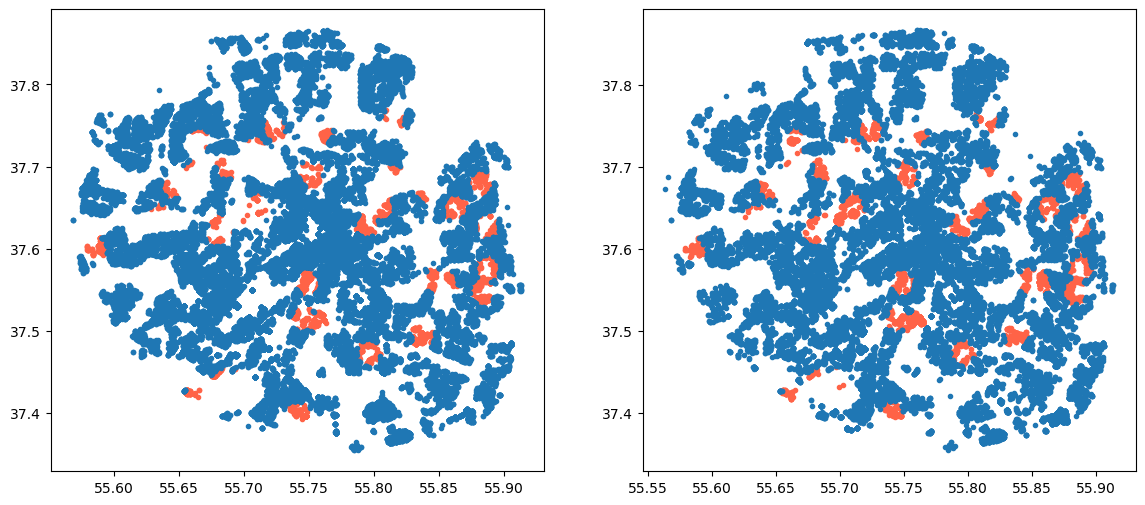

In [694]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[14, 6])

ax[0].scatter(df_2020[df_2020['in1km'] == 1000]['Lat'], df_2020[df_2020['in1km'] == 1000]['Lng'], marker='.', c='tomato')
ax[0].scatter(df_2020[df_2020['in1km'] != 1000]['Lat'], df_2020[df_2020['in1km'] != 1000]['Lng'], marker='.',)

ax[1].scatter(df_2024[df_2024['in1km'] == 1000]['Lat'], df_2024[df_2024['in1km'] == 1000]['Lng'], marker='.', c='tomato')
ax[1].scatter(df_2024[df_2024['in1km'] != 1000]['Lat'], df_2024[df_2024['in1km'] != 1000]['Lng'], marker='.',)

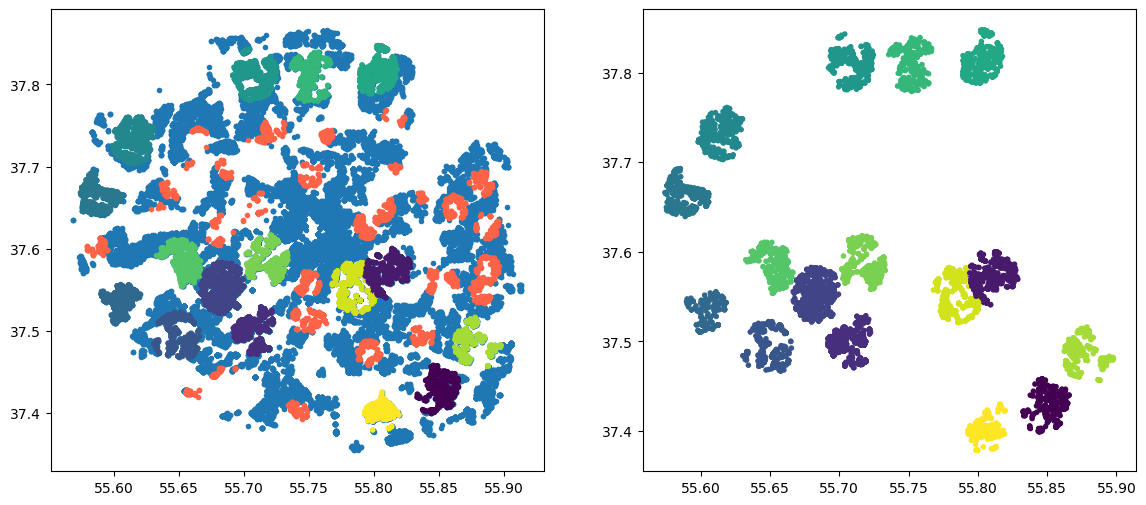

In [695]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[14, 6])

ax[0].scatter(df_2020[df_2020['in1km'] != 1000]['Lat'], df_2020[df_2020['in1km'] != 1000]['Lng'], marker='.',)

ax[0].scatter(df_2020['Lat'], df_2020['Lng'], marker='.', c=df_2020['fid_2'])
ax[0].scatter(df_2020[df_2020['in1km'] == 1000]['Lat'], df_2020[df_2020['in1km'] == 1000]['Lng'], marker='.', c='tomato')

ax[1].scatter(df_2024['Lat'], df_2024['Lng'], marker='.', c=df_2024['fid_2'])

# in 2 km 2020 vs 2024

In [696]:
print(df_2020[df_2020['in2km'] == 2000].shape[0], df_2024[df_2024['in2km'] == 2000].shape[0])

12381 11424


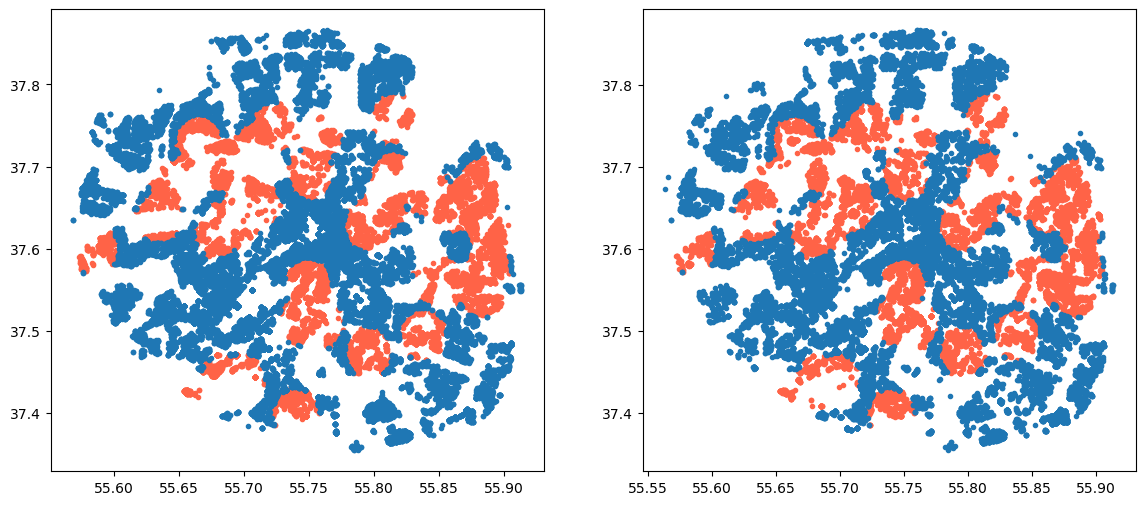

In [697]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[14, 6])

ax[0].scatter(df_2020[df_2020['in2km'] == 2000]['Lat'], df_2020[df_2020['in2km'] == 2000]['Lng'], marker='.', c='tomato')
ax[0].scatter(df_2020[df_2020['in2km'] != 2000]['Lat'], df_2020[df_2020['in2km'] != 2000]['Lng'], marker='.',)

ax[1].scatter(df_2024[df_2024['in2km'] == 2000]['Lat'], df_2024[df_2024['in2km'] == 2000]['Lng'], marker='.', c='tomato')
ax[1].scatter(df_2024[df_2024['in2km'] != 2000]['Lat'], df_2024[df_2024['in2km'] != 2000]['Lng'], marker='.',)

# Finding distance to the center

In [698]:
!pip install geopy

from geopy.distance import geodesic as GD

def find_Kremlin_distance(lat, long):
    Kremlin = (55.751716, 37.619053)
    my_place = (lat, long)
    
    return GD(Kremlin, my_place).km

In [699]:
lat = df_2020['Lat'].values
lng = df_2020['Lng'].values


distance_2020 = []

for i in range(len(lat)):
    distance_2020.append(find_Kremlin_distance(lat[i], lng[i]))


df_2020['distance_to_center'] = distance_2020

In [700]:
lat = df_2024['Lat'].values
lng = df_2024['Lng'].values


distance_2024 = []

for i in range(len(lat)):
    distance_2024.append(find_Kremlin_distance(lat[i], lng[i]))


df_2024['distance_to_center'] = distance_2024

In [701]:
df_2020.head()

Lat        Lng  Комнатность Этаж/этажность  Площадь      Цена  \
0  55.7911  37.634102            4            6/7    150.0  41500000   
1  55.7911  37.634102            4            2/9    100.0  24900000   
2  55.7911  37.634102            4            2/9    130.0  33890000   
3  55.7911  37.634102            4            6/7    144.0  41500000   
4  55.7911  37.634102            4            6/7    150.0  41500000   

  Год постройки   Тип дома Материал перекрытий    Отопление  ...  \
0     1000-1950  Кирпичный           Смешанные  Центральное  ...   
1     1000-1950  Кирпичный           Смешанные  Центральное  ...   
2     1000-1950  Кирпичный           Смешанные  Центральное  ...   
3     1000-1950  Кирпичный           Смешанные  Центральное  ...   
4     1000-1950  Кирпичный           Смешанные  Центральное  ...   

    Цена за кв.м   in1km   in2km  fid_2  id_redevelopment  \
0  276666.666667  1000.0  2000.0    NaN               1.0   
1  249000.000000  1000.0  2000.0    NaN               1.0   
2  260692.307692  1000.0  2000.0    NaN               1.0   
3  288194.444444  1000.0  2000.0    NaN               1.0   
4  276666.666667  1000.0  2000.0    NaN               1.0   

   Совмещенный санузел  Раздельный санузел  Этаж  Этажность  \
0                    1                   1     6          7   
1                    0                   2     2          9   
2                    0                   2     2          9   
3                    1                   1     6          7   
4                    2                   0     6          7   

   distance_to_center  
0            4.485436  
1            4.485436  
2            4.485436  
3            4.485436  
4            4.485436  

[5 rows x 25 columns]

In [702]:
df_2024.head()

Lat        Lng  Комнатность Этаж/этажность  Площадь      Цена  \
0  55.797048  37.623609          2.0           1/12     45.5  16900000   
1  55.805558  37.629727          4.0            1/5     93.0  25500000   
2  55.803626  37.630248          2.0            6/8     42.9  12990000   
3  55.803626  37.630248          3.0            4/8     53.6  19900000   
4  55.804531  37.632826          2.0            3/7     54.0  16000000   

  Год постройки    Тип дома Материал перекрытий    Отопление  ...  \
0     1970-1980  Монолитный      Железобетонные  Центральное  ...   
1     1950-1960   Кирпичный           Смешанные  Центральное  ...   
2     1960-1970   Кирпичный      Железобетонные  Центральное  ...   
3     1960-1970   Кирпичный      Железобетонные  Центральное  ...   
4     1950-1960   Кирпичный      Железобетонные  Центральное  ...   

    Цена за кв.м   in2km   in1km  fid_2  id_redevelopment  \
0  371428.571429  2000.0  1000.0    NaN               1.0   
1  274193.548387  2000.0     NaN    NaN               1.0   
2  302797.202797  2000.0     NaN    NaN               1.0   
3  371268.656716  2000.0     NaN    NaN               1.0   
4  296296.296296  2000.0     NaN    NaN               1.0   

   Совмещенный санузел  Раздельный санузел  Этаж  Этажность  \
0                    0                   1     1         12   
1                    0                   1     1          5   
2                    1                   0     6          8   
3                    0                   1     4          8   
4                    0                   1     3          7   

   distance_to_center  
0            5.055253  
1            6.031951  
2            5.822081  
3            5.822081  
4            5.943477  

[5 rows x 25 columns]

In [703]:
pd.get_dummies(df_2020["Тип дома"])

Блочный  Деревянный  Иные типы стен  Кирпичный  Монолитно-кирпичный  \
0        False       False           False       True                False   
1        False       False           False       True                False   
2        False       False           False       True                False   
3        False       False           False       True                False   
4        False       False           False       True                False   
...        ...         ...             ...        ...                  ...   
54439    False       False           False      False                False   
54440    False       False           False      False                False   
54441    False       False           False      False                False   
54442    False       False           False      False                False   
54443    False       False           False      False                False   

       Монолитный  Панельный  
0           False      False  
1           False      False  
2           False      False  
3           False      False  
4           False      False  
...           ...        ...  
54439       False       True  
54440       False       True  
54441       False       True  
54442       False       True  
54443       False       True  

[41524 rows x 7 columns]

In [704]:
categorical_cols = ['Год постройки', 'Тип дома', 'Материал перекрытий', 'Отопление', 'Отделка'] # 'Тип ОН'

In [705]:
df_2020_too_bad = df_2020.copy()

for cat_col in categorical_cols:
    if cat_col in ['Отопление', 'Тип ОН']:
        continue
    df_2020_too_bad = df_2020_too_bad[df_2020_too_bad[cat_col] != 'Не заполнено']
    print(df_2020_too_bad.shape, df_2024.shape)
    print(cat_col)

print(df_2020_too_bad.shape, df_2020.shape)

(41524, 25) (31725, 25)
Год постройки
(41524, 25) (31725, 25)
Тип дома
(41524, 25) (31725, 25)
Материал перекрытий
(37438, 25) (31725, 25)
Отделка
(37438, 25) (41524, 25)


In [706]:
df_2024_too_bad = df_2024.copy()

for cat_col in categorical_cols:
    if cat_col in ['Отопление', 'Тип ОН']:
        continue
    df_2024_too_bad = df_2024_too_bad[df_2024_too_bad[cat_col] != 'Не заполнено']
    print(df_2024_too_bad.shape, df_2024.shape)
    print(cat_col)

print(df_2024_too_bad.shape, df_2024.shape)

(31725, 25) (31725, 25)
Год постройки
(31725, 25) (31725, 25)
Тип дома
(31725, 25) (31725, 25)
Материал перекрытий
(30833, 25) (31725, 25)
Отделка
(30833, 25) (31725, 25)


In [707]:
df_2024_too_bad = df_2024_too_bad.drop(['Тип ОН'], axis=1)
df_2020_too_bad = df_2020_too_bad.drop(['Тип ОН'], axis=1)

In [708]:
df_2024 = df_2024_too_bad.copy()
df_2020 = df_2020_too_bad.copy()

In [709]:
for cat_col in categorical_cols:
    binary_data_2020 = pd.get_dummies(df_2020[cat_col])
    binary_data_2024 = pd.get_dummies(df_2024[cat_col])

    columns_2020 = binary_data_2020.columns
    columns_2024 = binary_data_2024.columns

    columns_2020 = columns_2020

    for col in set(list(columns_2020) + list(columns_2024)):
        if col == "Не заполнено":
            print(cat_col)
        if col not in columns_2020:
            binary_data_2020[col] = [False for i in range(binary_data_2020.shape[0])]
        
        if col not in columns_2024:
            binary_data_2024[col] = [False for i in range(binary_data_2024.shape[0])]

    if set(list(binary_data_2020.columns)) == set(list(binary_data_2024.columns)):
        binary_data_2024 = binary_data_2024[list(binary_data_2020.columns)]
    
    print(binary_data_2020.columns == binary_data_2024.columns)
    # print(list(binary_data_2020.columns), list(binary_data_2024.columns))

[ True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True]
[ True  True  True  True]
Отопление
[ True  True  True  True  True]
[ True  True  True  True]


In [710]:
[False for i in range(10)]

[False, False, False, False, False, False, False, False, False, False]

In [942]:
columns_to_drop = []

for cat_col in categorical_cols:
    binary_data_2020 = pd.get_dummies(df_2020[cat_col])
    binary_data_2024 = pd.get_dummies(df_2024[cat_col])

    columns_2020 = binary_data_2020.columns
    columns_2024 = binary_data_2024.columns

    # print(columns_2020, columns_2024)

    for col in set(list(columns_2020) + list(columns_2024)):
        
        if col not in list(columns_2020):
            print(col)
            binary_data_2020[col] = [False for i in range(binary_data_2020.shape[0])]
        
        if col not in list(columns_2024):
            binary_data_2024[col] = [False for i in range(binary_data_2024.shape[0])]

    if set(list(binary_data_2020.columns)) == set(list(binary_data_2024.columns)):
        binary_data_2024 = binary_data_2024[list(binary_data_2020.columns)]

    for col_0 in binary_data_2020.columns:
        df_2020[cat_col + '_' + col_0] = binary_data_2020[col_0]

    for col_0 in binary_data_2024.columns:
        df_2024[cat_col + '_' + col_0] = binary_data_2024[col_0]
    
    # df_2020 = pd.concat((df_2020, binary_data_2020), axis=1)
    # df_2024 = pd.concat((df_2024, binary_data_2024), axis=1)

    columns_to_drop.append(cat_col + '_' + binary_data_2020.columns[0])

2020-


In [955]:
data_together = pd.concat([df_2020, df_2024], axis=0)

In [956]:
data_together['in1km'] = data_together['in1km'].fillna(0)
data_together['in2km'] = data_together['in2km'].fillna(0)
data_together['in1km'] = data_together['in1km'] / 1000
data_together['in2km'] = data_together['in2km'] / 2000

In [957]:
data_together['redevelopment_1'] = data_together['2020_ds'] * data_together['in1km']
data_together['redevelopment_2'] = data_together['2020_ds'] * data_together['in2km']

In [962]:
import seaborn as sns

In [964]:
data_together.head()

Lat        Lng  Комнатность Этаж/этажность  Площадь      Цена  \
0  55.7911  37.634102          4.0            6/7    150.0  41500000   
1  55.7911  37.634102          4.0            2/9    100.0  24900000   
2  55.7911  37.634102          4.0            2/9    130.0  33890000   
3  55.7911  37.634102          4.0            6/7    144.0  41500000   
4  55.7911  37.634102          4.0            6/7    150.0  41500000   

  Год постройки   Тип дома Материал перекрытий    Отопление  ...  \
0     1000-1950  Кирпичный           Смешанные  Центральное  ...   
1     1000-1950  Кирпичный           Смешанные  Центральное  ...   
2     1000-1950  Кирпичный           Смешанные  Центральное  ...   
3     1000-1950  Кирпичный           Смешанные  Центральное  ...   
4     1000-1950  Кирпичный           Смешанные  Центральное  ...   

  Отопление_Нет  Отопление_Отсутствует  Отопление_Центральное  \
0         False                  False                   True   
1         False                  False                   True   
2         False                  False                   True   
3         False                  False                   True   
4         False                  False                   True   

   Отделка_Без ремонта  Отделка_Дизайнерский  Отделка_Евроремонт  \
0                False                 False                True   
1                False                 False                True   
2                False                  True               False   
3                False                 False                True   
4                False                  True               False   

   Отделка_Косметический  2020_ds  redevelopment_1  redevelopment_2  
0                  False     True              1.0              1.0  
1                  False     True              1.0              1.0  
2                  False     True              1.0              1.0  
3                  False     True              1.0              1.0  
4                  False     True              1.0              1.0  

[5 rows x 57 columns]

# modeling

In [965]:
import statsmodels.api as sm

In [1007]:
X_2020 = df_2020.copy()

X_2020 = X_2020.drop(columns_to_drop, axis=1)

In [1008]:
X_2024 = df_2024.copy()

X_2024 = X_2024.drop(columns_to_drop, axis=1)

In [1009]:
columns_to_drop

['Год постройки_-',
 'Тип дома_Блочный',
 'Материал перекрытий_Деревянные',
 'Отопление_Комбинированное',
 'Отделка_Без ремонта']

In [1010]:
X = data_together.copy()
X = X.drop(columns_to_drop, axis=1)
X = X[X['Площадь кухни'].notnull()]


y = list(X['Цена за кв.м'].values)
y = np.array(y) / 10000
X = X.drop(['Цена', 'Цена за кв.м'], axis=1)
X = X.drop(['Lat', 'Lng', 'Этаж/этажность', 'fid_2', 'Год постройки', 'Тип дома',
       'Материал перекрытий', 'Отопление', 'Отделка', 'Балкон'], axis=1)

In [1013]:

X = X.astype('float')

In [1014]:
for col in ['Комнатность', 'Площадь', 'Площадь кухни', 'Кол-во комнат (числом)',
       'in1km', 'in2km', 'Совмещенный санузел', 'Раздельный санузел', 'Этаж',
       'Этажность']:
    X[col] = (X[col] - X[col].mean()) / X[col].std()

In [1015]:
X.columns

Index(['Комнатность', 'Площадь', 'Площадь кухни', 'Кол-во комнат (числом)',
       'in1km', 'in2km', 'id_redevelopment', 'Совмещенный санузел',
       'Раздельный санузел', 'Этаж', 'Этажность', 'distance_to_center',
       'Год постройки_1000-1950', 'Год постройки_1950-1960',
       'Год постройки_1960-1970', 'Год постройки_1970-1980',
       'Год постройки_1980-1990', 'Год постройки_1990-2000',
       'Год постройки_2000-2010', 'Год постройки_2010-2020',
       'Год постройки_2020-', 'Тип дома_Деревянный', 'Тип дома_Иные типы стен',
       'Тип дома_Кирпичный', 'Тип дома_Монолитно-кирпичный',
       'Тип дома_Монолитный', 'Тип дома_Панельный',
       'Материал перекрытий_Железобетонные', 'Материал перекрытий_Иные',
       'Материал перекрытий_Смешанные', 'Отопление_Не заполнено',
       'Отопление_Нет', 'Отопление_Отсутствует', 'Отопление_Центральное',
       'Отделка_Дизайнерский', 'Отделка_Евроремонт', 'Отделка_Косметический',
       '2020_ds', 'redevelopment_1', 'redevelopment_2'],

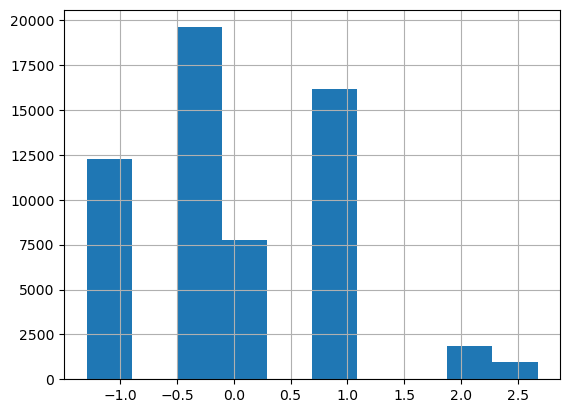

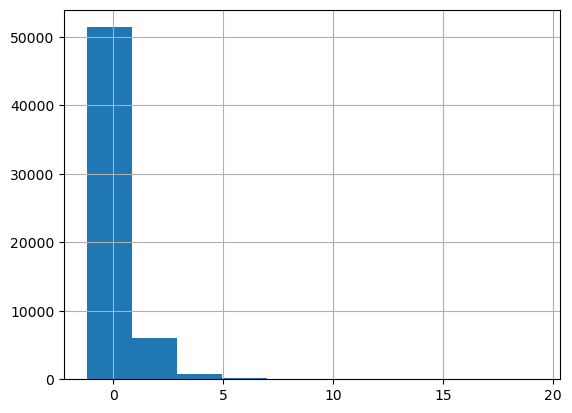

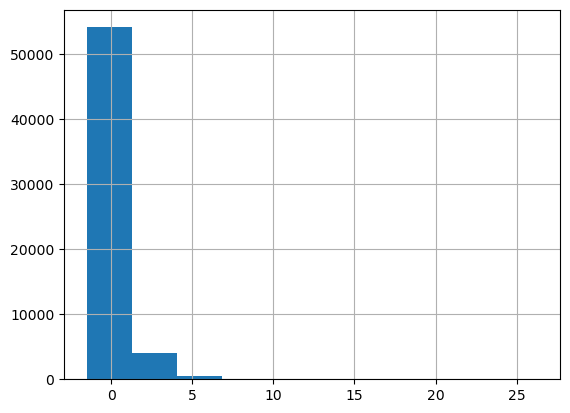

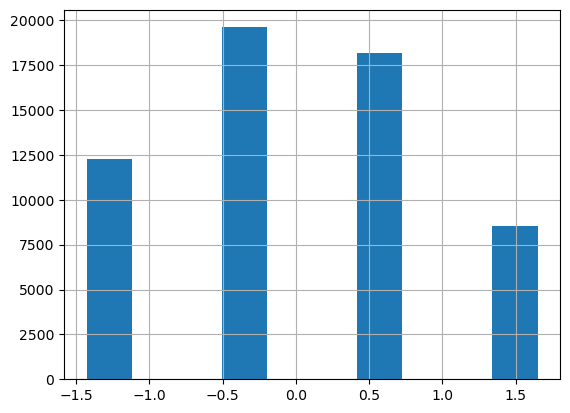

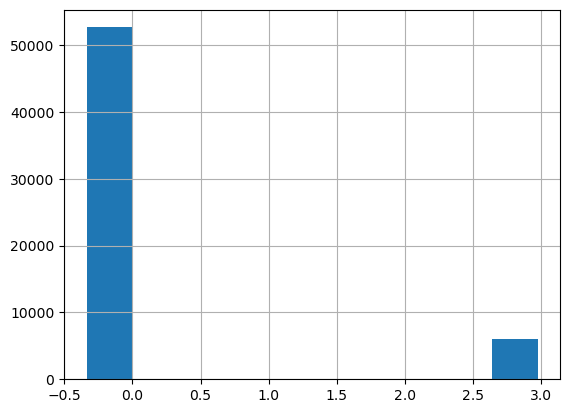

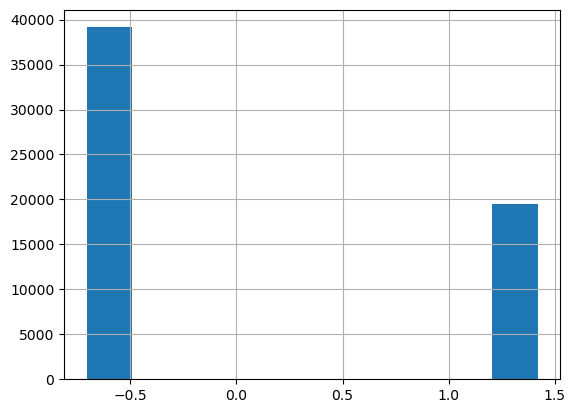

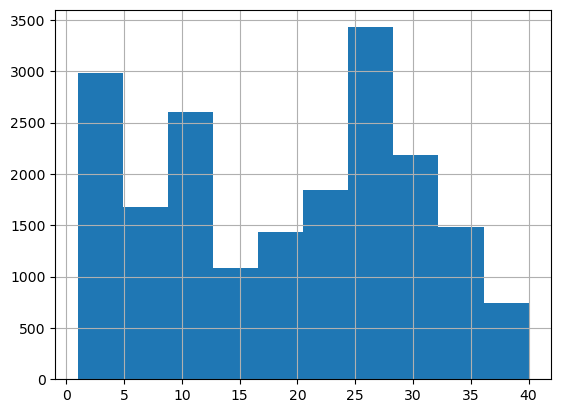

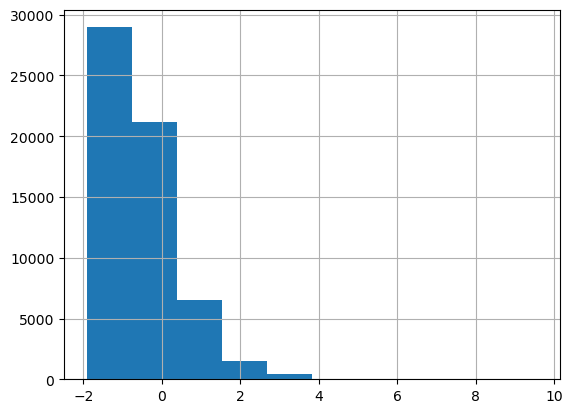

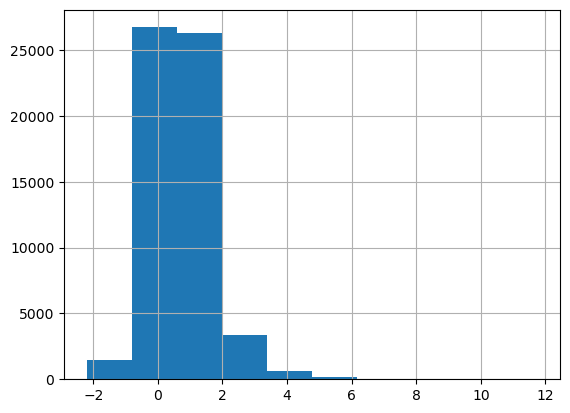

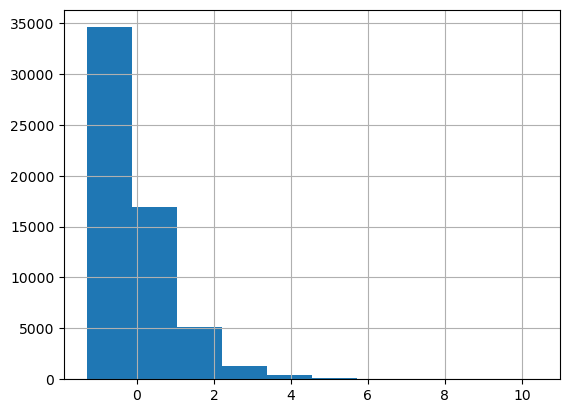

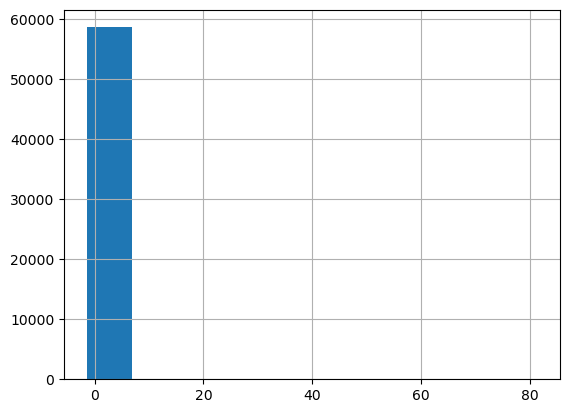

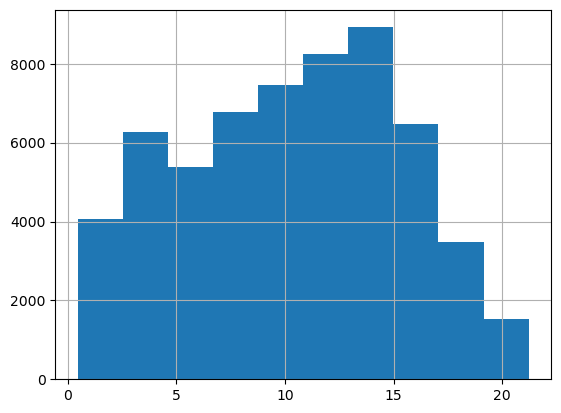

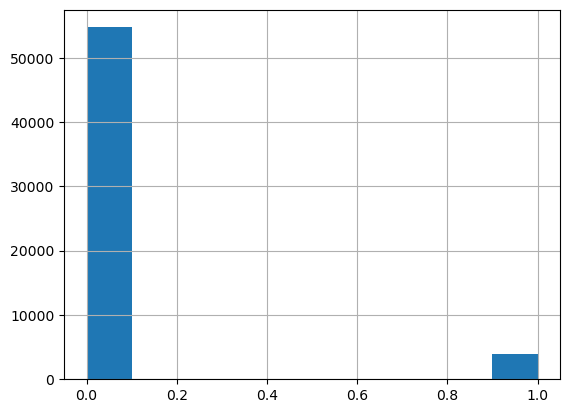

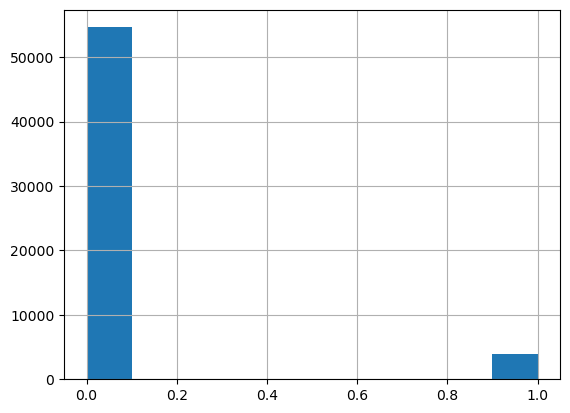

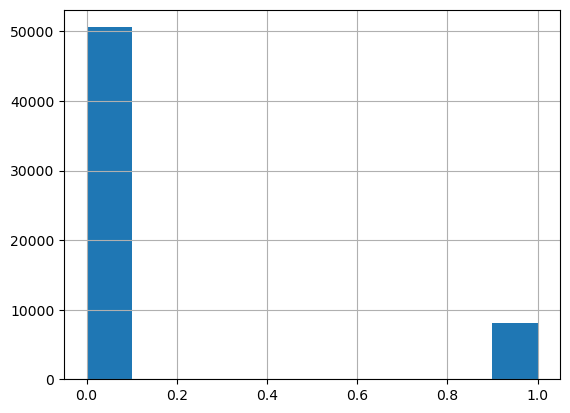

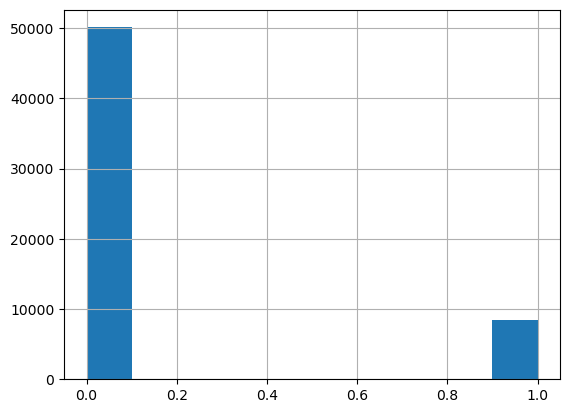

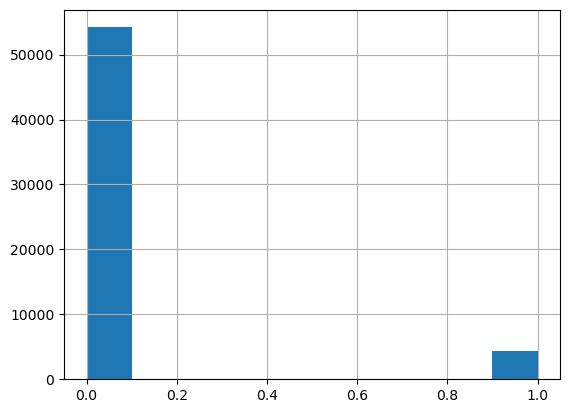

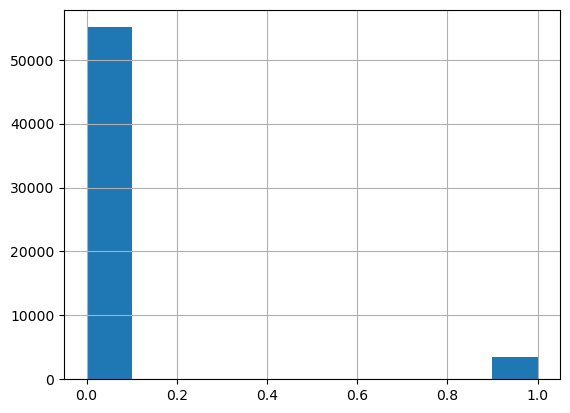

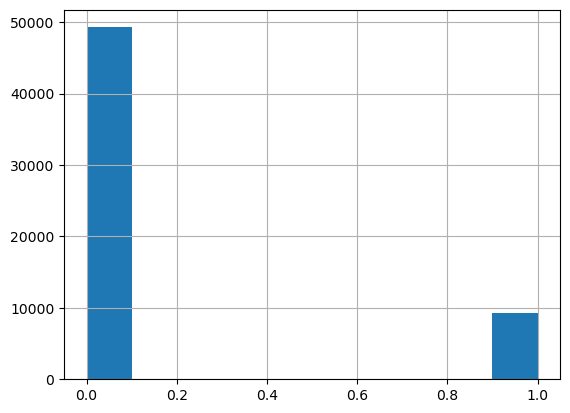

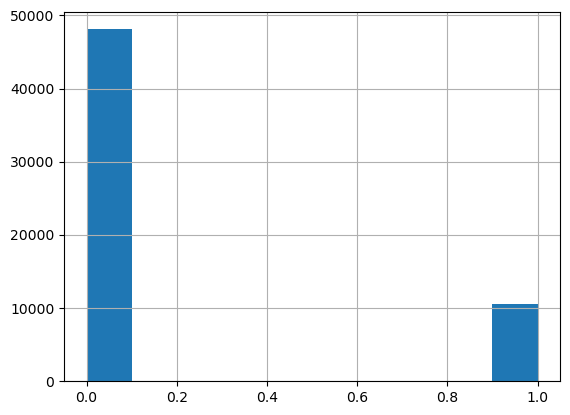

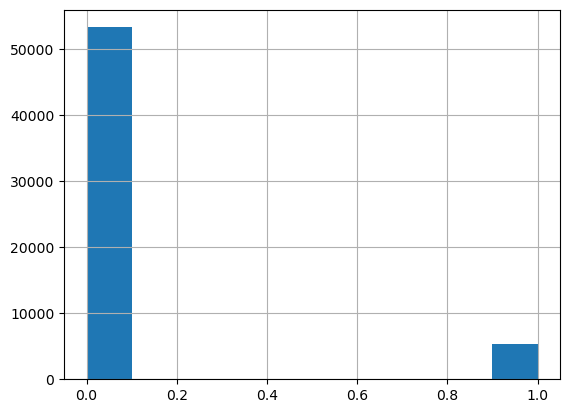

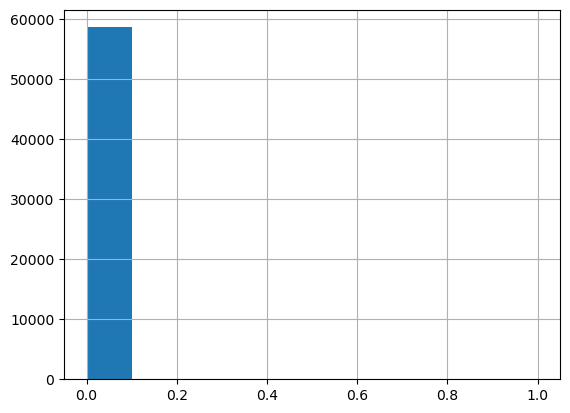

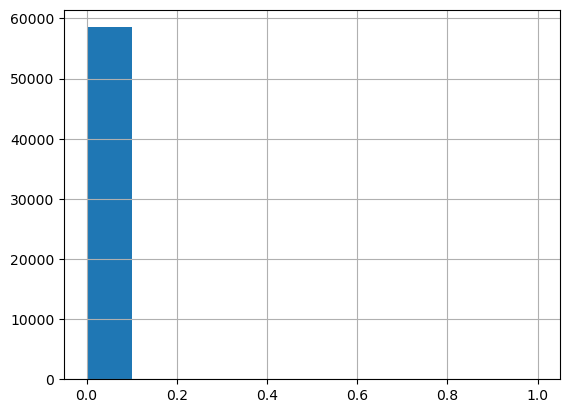

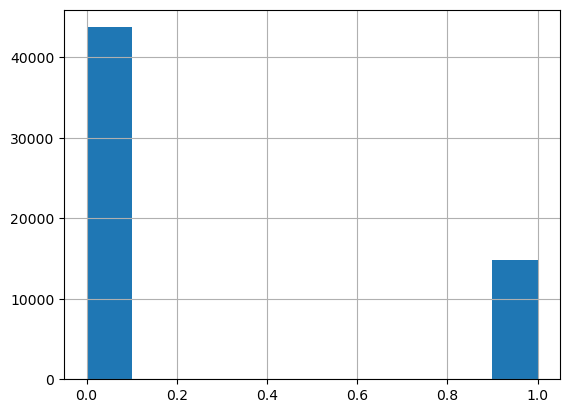

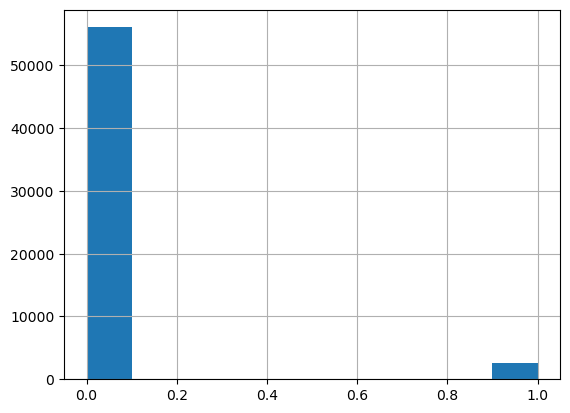

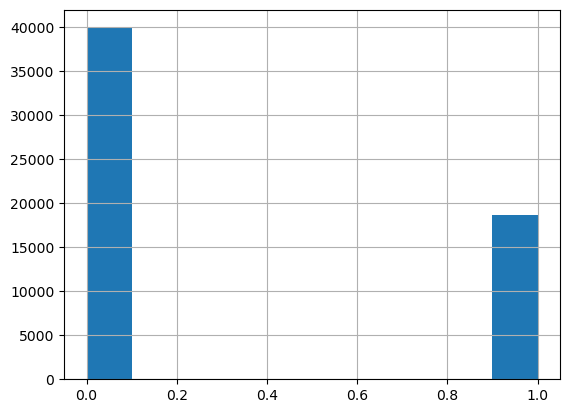

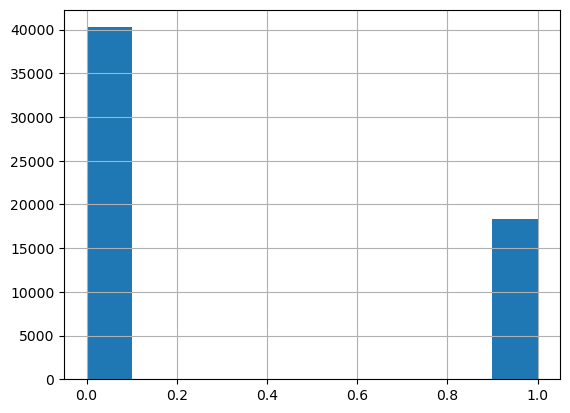

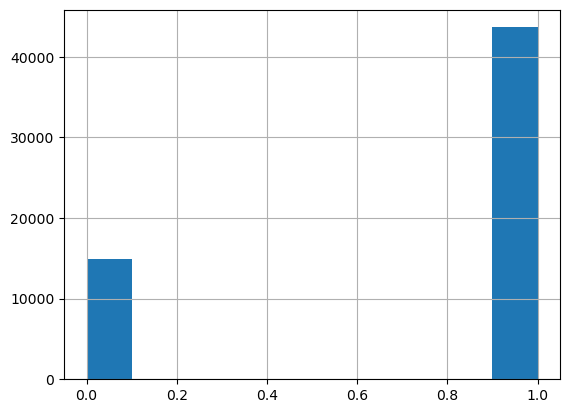

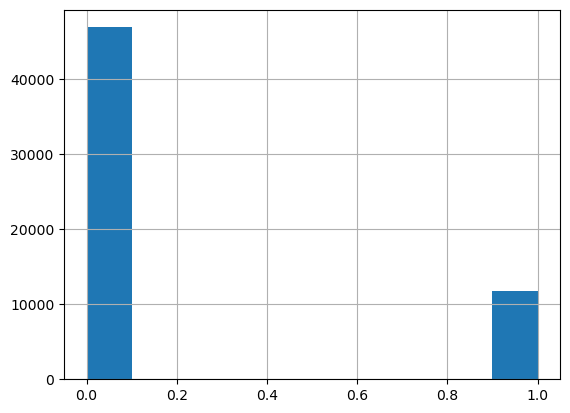

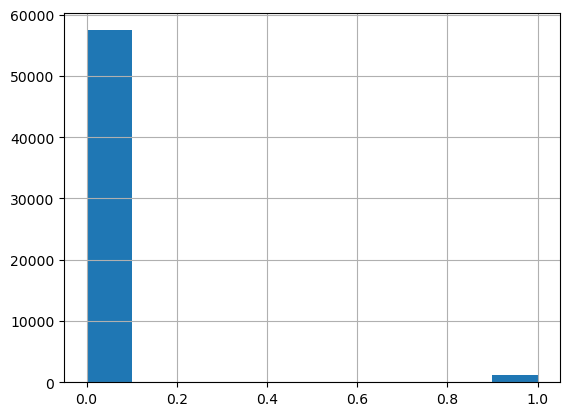

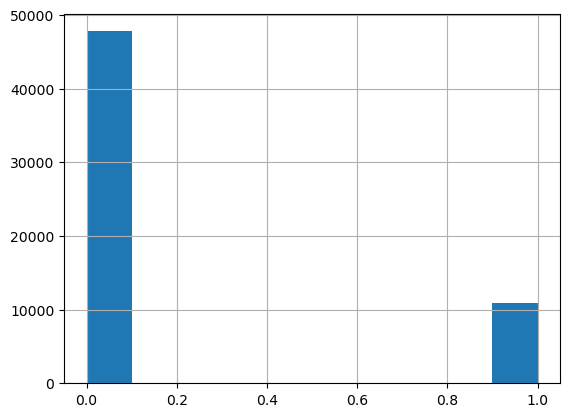

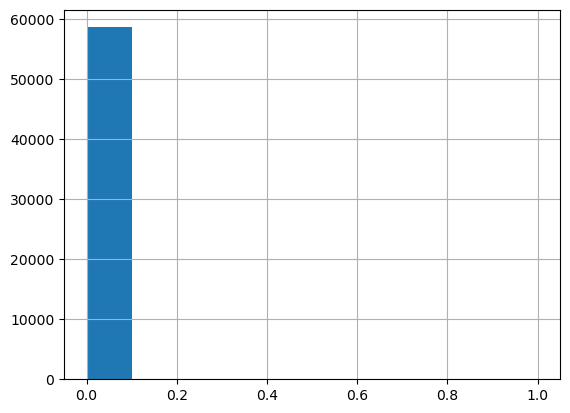

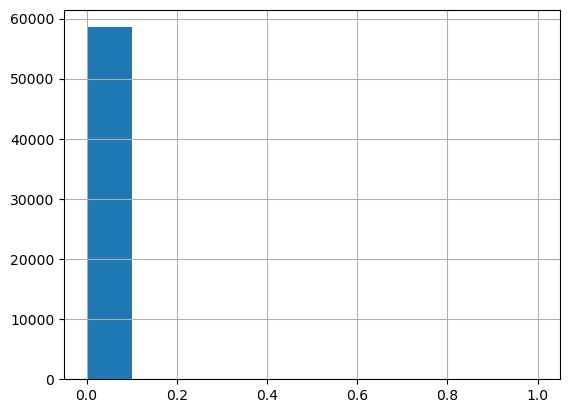

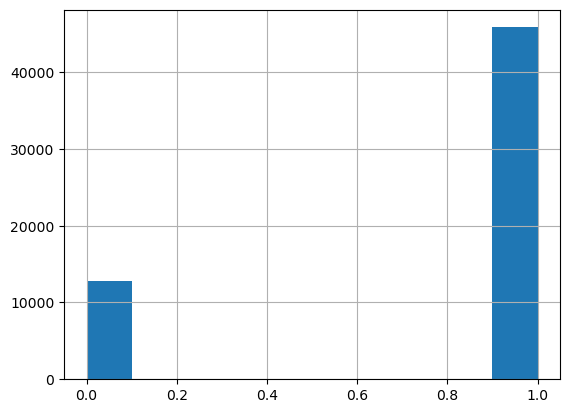

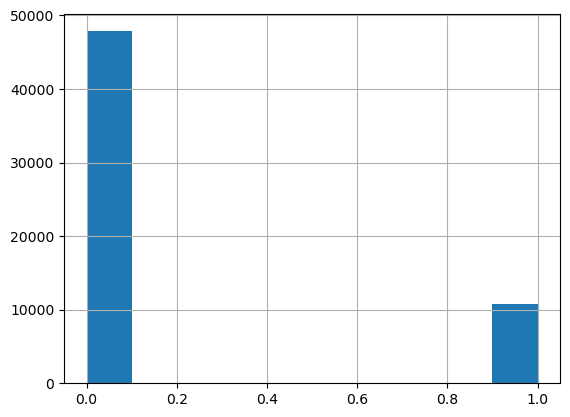

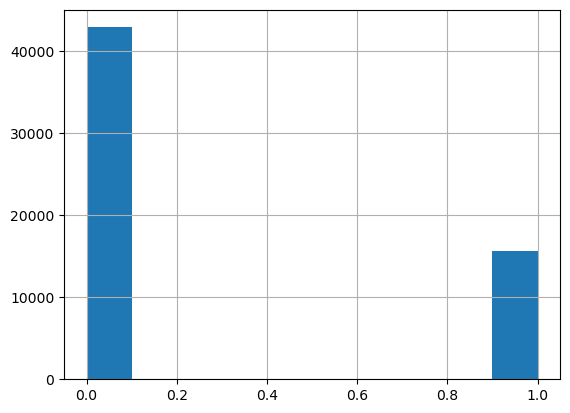

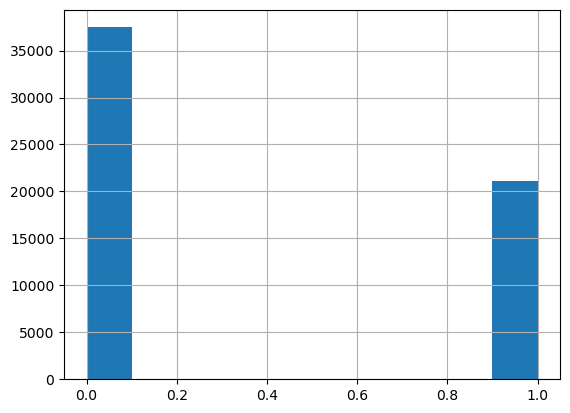

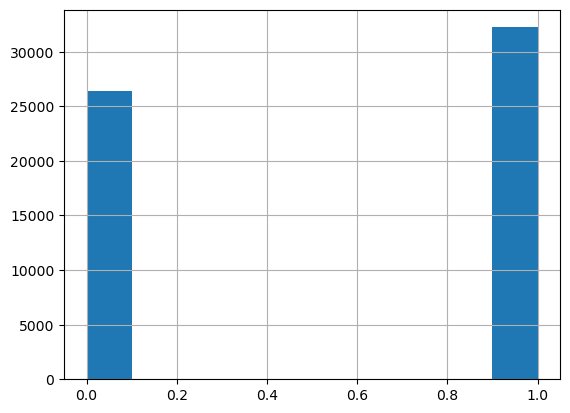

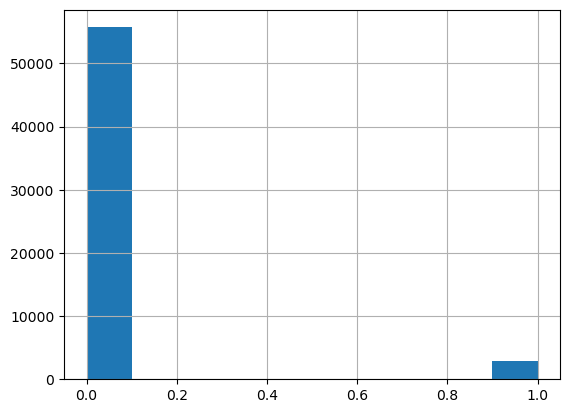

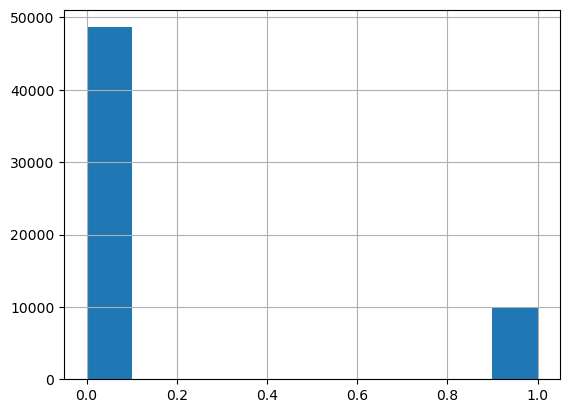

In [1016]:
for col in X.columns:
    X[col].hist()
    plt.show()

In [1017]:
abs(X['Площадь кухни'].isnull() - 1)

0        1
1        1
2        1
3        1
4        1
        ..
37074    1
37075    1
37076    1
37077    1
37078    1
Name: Площадь кухни, Length: 58612, dtype: int32

In [1018]:
# X['const'] = 1

In [1023]:
X = X[X['Площадь кухни'].notnull()]
X = X.drop(['id_redevelopment'], axis=1)

In [1024]:
pd.isnull(X).describe().T

count unique    top   freq
Комнатность                         58612      1  False  58612
Площадь                             58612      1  False  58612
Площадь кухни                       58612      1  False  58612
Кол-во комнат (числом)              58612      1  False  58612
in1km                               58612      1  False  58612
in2km                               58612      1  False  58612
Совмещенный санузел                 58612      1  False  58612
Раздельный санузел                  58612      1  False  58612
Этаж                                58612      1  False  58612
Этажность                           58612      1  False  58612
distance_to_center                  58612      1  False  58612
Год постройки_1000-1950             58612      1  False  58612
Год постройки_1950-1960             58612      1  False  58612
Год постройки_1960-1970             58612      1  False  58612
Год постройки_1970-1980             58612      1  False  58612
Год постройки_1980-1990             58612      1  False  58612
Год постройки_1990-2000             58612      1  False  58612
Год постройки_2000-2010             58612      1  False  58612
Год постройки_2010-2020             58612      1  False  58612
Год постройки_2020-                 58612      1  False  58612
Тип дома_Деревянный                 58612      1  False  58612
Тип дома_Иные типы стен             58612      1  False  58612
Тип дома_Кирпичный                  58612      1  False  58612
Тип дома_Монолитно-кирпичный        58612      1  False  58612
Тип дома_Монолитный                 58612      1  False  58612
Тип дома_Панельный                  58612      1  False  58612
Материал перекрытий_Железобетонные  58612      1  False  58612
Материал перекрытий_Иные            58612      1  False  58612
Материал перекрытий_Смешанные       58612      1  False  58612
Отопление_Не заполнено              58612      1  False  58612
Отопление_Нет                       58612      1  False  58612
Отопление_Отсутствует               58612      1  False  58612
Отопление_Центральное               58612      1  False  58612
Отделка_Дизайнерский                58612      1  False  58612
Отделка_Евроремонт                  58612      1  False  58612
Отделка_Косметический               58612      1  False  58612
2020_ds                             58612      1  False  58612
redevelopment_1                     58612      1  False  58612
redevelopment_2                     58612      1  False  58612
const                               58612      1  False  58612

In [1025]:
results = sm.OLS(y, X.astype(float)).fit()

In [1026]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     2103.
Date:                Sun, 16 Jun 2024   Prob (F-statistic):               0.00
Time:                        13:37:04   Log-Likelihood:            -2.3833e+05
No. Observations:               58612   AIC:                         4.767e+05
Df Residuals:                   58572   BIC:                         4.771e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Комнатность                           -2.2324      0.202    -11.040      0.000      -2.629      -1.836
Площадь                                5.4064      0.106     50.929      0.000       5.198       5.614
Площадь кухни                          0.9213      0.082     11.220      0.000       0.760       1.082
Кол-во комнат (числом)                 0.2594      0.191      1.356      0.175      -0.115       0.634
in1km                                 -1.0437      0.094    -11.095      0.000      -1.228      -0.859
in2km                                 -1.3888      0.099    -13.980      0.000      -1.584      -1.194
Совмещенный санузел                    1.8510      0.077     23.891      0.000       1.699       2.003
Раздельный санузел                     0.3479      0.070      4.969      0.000       0.211       0.485
Этаж                                   0.0106      0.076      0.139      0.890      -0.139       0.161
Этажность                             -1.4288      0.086    -16.542      0.000      -1.598      -1.260
distance_to_center                    -2.1793      0.015   -144.973      0.000      -2.209      -2.150
Год постройки_1000-1950               -5.2505      0.587     -8.946      0.000      -6.401      -4.100
Год постройки_1950-1960               -7.7692      0.546    -14.220      0.000      -8.840      -6.698
Год постройки_1960-1970               -4.6809      0.510     -9.182      0.000      -5.680      -3.682
Год постройки_1970-1980               -1.7159      0.503     -3.411      0.001      -2.702      -0.730
Год постройки_1980-1990               -1.3531      0.523     -2.587      0.010      -2.378      -0.328
Год постройки_1990-2000               -4.0297      0.530     -7.609      0.000      -5.068      -2.992
Год постройки_2000-2010               -2.0834      0.494     -4.221      0.000      -3.051      -1.116
Год постройки_2010-2020                1.4441      0.476      3.031      0.002       0.510       2.378
Год постройки_2020-                    2.8950      0.479      6.049      0.000       1.957       3.833
Тип дома_Деревянный                    4.3772      3.119      1.403      0.161      -1.737      10.491
Тип дома_Иные типы стен               -1.4388      1.509     -0.953      0.340      -4.397       1.519
Тип дома_Кирпичный                     0.4089      0.271      1.510      0.131      -0.122       0.940
Тип дома_Монолитно-кирпичный           9.3555      0.401     23.311      0.000       8.569      10.142
Тип дома_Монолитный                    3.1271      0.290     10.787      0.000       2.559       3.695
Тип дома_Панельный                     1.7296      0.254      6.805      0.000       1.231       2.228
Материал перекрытий_Железобетонные     3.1682      0.418      7.571      0.000       2.348      

In [612]:
ppp = pd.DataFrame(results.params, columns=['parameter'])
ppp['abs_par'] = abs(ppp['parameter'])
ppp.sort_values(['abs_par'], ascending=False).T.columns[:19]

Index(['Год постройки_1000-1950', 'Материал перекрытий_Иные',
       'Год постройки_2010-2020', 'Год постройки_2020-',
       'Год постройки_1970-1980', 'Год постройки_1980-1990',
       'Материал перекрытий_Железобетонные', 'Год постройки_2000-2010',
       'Тип дома_Деревянный', 'Тип дома_Монолитно-кирпичный',
       'Год постройки_1960-1970', 'Год постройки_1990-2000',
       'Год постройки_1950-1960', 'Отопление_Отсутствует',
       'Отопление_Не заполнено', 'Отопление_Центральное',
       'Материал перекрытий_Смешанные', 'Тип дома_Монолитный',
       'Отделка_Дизайнерский'],
      dtype='object')

In [611]:
ppp.sort_values(['abs_par'], ascending=False)

parameter   abs_par
Год постройки_1000-1950              2.377306  2.377306
Материал перекрытий_Иные             2.192673  2.192673
Год постройки_2010-2020              2.086554  2.086554
Год постройки_2020-                  1.990907  1.990907
Год постройки_1970-1980              1.920026  1.920026
Год постройки_1980-1990              1.915834  1.915834
Материал перекрытий_Железобетонные   1.853796  1.853796
Год постройки_2000-2010              1.779002  1.779002
Тип дома_Деревянный                  1.724078  1.724078
Тип дома_Монолитно-кирпичный         1.718512  1.718512
Год постройки_1960-1970              1.704015  1.704015
Год постройки_1990-2000              1.593645  1.593645
Год постройки_1950-1960              1.400893  1.400893
Отопление_Отсутствует                1.283860  1.283860
Отопление_Не заполнено               1.260231  1.260231
Отопление_Центральное                1.036623  1.036623
Материал перекрытий_Смешанные        1.030833  1.030833
Тип дома_Монолитный                  0.980135  0.980135
Отделка_Дизайнерский                 0.955183  0.955183
2020_ds                             -0.901636  0.901636
Тип дома_Иные типы стен              0.839794  0.839794
Тип дома_Панельный                   0.643997  0.643997
Тип дома_Кирпичный                   0.616571  0.616571
Площадь                              0.584151  0.584151
Отделка_Евроремонт                   0.350129  0.350129
Комнатность                         -0.294397  0.294397
redevelopment_1                      0.224992  0.224992
Совмещенный санузел                  0.198467  0.198467
Отделка_Косметический                0.193408  0.193408
distance_to_center                  -0.192943  0.192943
Этажность                           -0.138858  0.138858
in2km                               -0.116877  0.116877
in1km                               -0.100811  0.100811
Отопление_Нет                       -0.098646  0.098646
Площадь кухни                        0.096214  0.096214
Кол-во комнат (числом)               0.083902  0.083902
Раздельный санузел                   0.039338  0.039338
redevelopment_2                     -0.017509  0.017509
Этаж                                -0.001302  0.001302

# pairwise selection 2020 - 2024

In [438]:
from sklearn.decomposition import PCA

In [442]:
pca = PCA(n_components=10)

In [443]:
pca.fit(X)

PCA(n_components=10)

In [446]:
summ = 0

for i in range(10):
    summ += pca.explained_variance_ratio_[i]
    print(i, summ)

0 0.660870034465164
1 0.7401133072491393
2 0.793535637279655
3 0.833411559147244
4 0.8664906189454792
5 0.8857093587681619
6 0.9009362546315496
7 0.9152631714394331
8 0.9267259135166651
9 0.9365152495798822


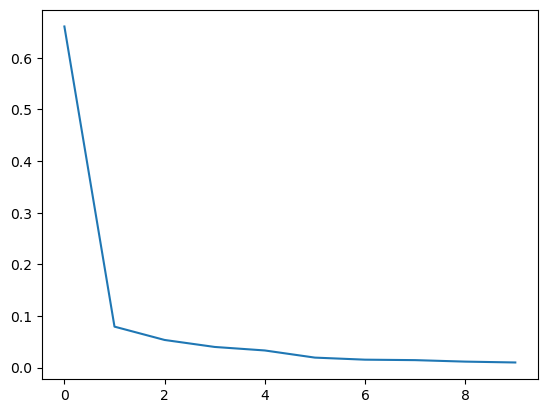

In [445]:
plt.plot(pca.explained_variance_ratio_)

In [447]:
pca_transformed = pca.transform(X)

In [450]:
pca_transformed = pd.DataFrame(pca_transformed, columns=['pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5', 'pca_6', 'pca_7', 'pca_8', 'pca_9', 'pca_10'])

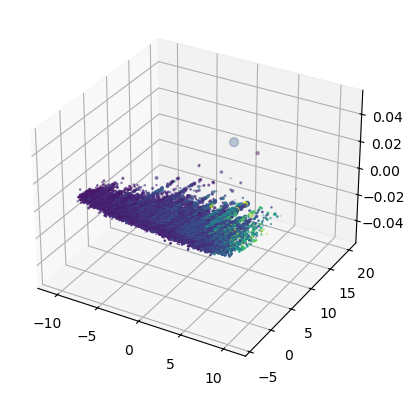

In [457]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

plt.scatter(pca_transformed['pca_1'], pca_transformed['pca_2'], pca_transformed['pca_3'], c=y/10)

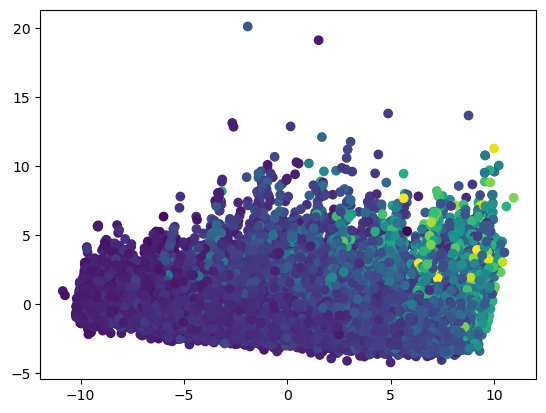

In [458]:
plt.scatter(pca_transformed['pca_1'], pca_transformed['pca_2'], c=y/10)

# pairwise difference approach

In [966]:
X = data_together.copy()
X = X.drop(columns_to_drop, axis=1)
X = X[X['Площадь кухни'].notnull()]

X = X.drop(['Lat', 'Lng', 'Этаж/этажность', 'Год постройки', 'Тип дома',
       'Материал перекрытий', 'Отопление', 'Отделка', 'Балкон'], axis=1)
X['Площадь кухни'] = X['Площадь кухни'] / X['Площадь']

X['id_redevelopment'] = X['id_redevelopment'].fillna(0)
X['fid_2'] = X['fid_2'].fillna(0)

X = X.astype('float')

for col in ['Комнатность', 'Площадь', 'Кол-во комнат (числом)',
        'Совмещенный санузел', 'Раздельный санузел', 'Этаж',
       'Этажность']:
    print(col)
    X[col] = (X[col] - X[col].mean()) / X[col].std()

X = X.reset_index(drop=True)

Комнатность
Площадь
Кол-во комнат (числом)
Совмещенный санузел
Раздельный санузел
Этаж
Этажность


In [967]:
y = list(X['Цена за кв.м'].values)
y = np.array(y) / 10000
X = X.drop(['Цена', 'Цена за кв.м'], axis=1)

In [968]:
X['id_redevelopment'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 14.,
       15., 16., 17., 18., 20., 21., 22., 23., 24., 25., 26., 28., 29.,
       30., 31., 32., 33., 35., 36., 37., 38., 39., 40.,  0.])

In [969]:
X['fid_2'] = X['fid_2'].fillna(0)

In [970]:
# X = X.drop(['redevelopment'], axis=1)
X = X.astype('float')

In [971]:
X = X.reset_index(drop=True)

In [972]:
# X = X[X['fid_2'] != 0]

In [973]:
sorted(X['fid_2'].unique())

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0]

In [974]:
X_1 = X[X['fid_2'] == 1]

X_1_2020 = X_1[X_1['2020_ds'] == 1]
X_1_2024 = X_1[X_1['2020_ds'] == 0]

X_1_2020_index = X_1_2020.index
X_1_2024_index = X_1_2024.index

X_1_2020 = X_1_2020.reset_index(drop=True)
X_1_2024 = X_1_2024.reset_index(drop=True)

In [763]:
X_1_2020 = X_1_2020.drop(['in1km', 'in2km', 'redevelopment_1', 'redevelopment_1'], axis=1)
X_1_2024 = X_1_2024.drop(['in1km', 'in2km', 'redevelopment_1', 'redevelopment_1'], axis=1)

In [764]:
X_1_2020

Комнатность   Площадь  Площадь кухни  Кол-во комнат (числом)  fid_2  \
0       1.086072 -0.103929       0.122222                0.623866    1.0   
1       1.086072 -0.139098       0.214286                0.623866    1.0   
2       1.086072 -0.332527       0.101695                0.623866    1.0   
3      -1.297515 -0.701802       0.168421               -1.429022    1.0   
4       1.086072 -0.068760       0.148649                0.623866    1.0   
..           ...       ...            ...                     ...    ...   
351     1.086072  0.300515       0.157895                0.623866    1.0   
352     1.086072 -0.314943       0.100000                0.623866    1.0   
353     1.086072 -0.314943       0.100000                0.623866    1.0   
354     1.086072 -0.314943       0.100000                0.623866    1.0   
355     1.086072  0.265346       0.107527                1.650310    1.0   

     id_redevelopment  Совмещенный санузел  Раздельный санузел      Этаж  \
0                 0.0            -0.768007            0.586310 -0.584713   
1                 0.0            -0.768007            0.586310 -0.873982   
2                 0.0            -0.768007            0.586310 -0.006174   
3                 0.0            -0.768007            0.586310 -0.873982   
4                 0.0             0.380643           -0.809725  0.283095   
..                ...                  ...                 ...       ...   
351               0.0             1.529293           -0.809725  1.295538   
352               0.0             0.380643           -0.809725 -0.295443   
353               0.0             0.380643           -0.809725 -0.295443   
354               0.0             0.380643           -0.809725 -0.295443   
355               0.0             0.380643            0.586310 -0.150809   

     Этажность  ...  Материал перекрытий_Смешанные  Отопление_Не заполнено  \
0    -1.103092  ...                            0.0                     0.0   
1    -0.323413  ...                            0.0                     0.0   
2    -0.615792  ...                            0.0                     0.0   
3    -0.615792  ...                            0.0                     0.0   
4     0.163887  ...                            0.0                     0.0   
..         ...  ...                            ...                     ...   
351   0.846107  ...                            0.0                     0.0   
352  -0.615792  ...                            0.0                     0.0   
353  -0.615792  ...                            0.0                     0.0   
354  -0.615792  ...                            0.0                     0.0   
355  -0.615792  ...                            0.0                     0.0   

     Отопление_Нет  Отопление_Отсутствует  Отопление_Центральное  \
0              0.0                    0.0                    1.0   
1              0.0                    0.0                    1.0   
2              0.0                    0.0                    1.0   
3              0.0                    0.0                    1.0   
4              0.0                    0.0                    1.0   
..             ...                    ...                    ...   
351            0.0                    0.0                    1.0   
352            0.0                    0.0                    1.0   
353            0.0                    0.0                    1.0   
354            0.0                    0.0                    1.0   
355            0.0                    0.0                    1.0   

     Отделка_Дизайнерский  Отделка_Евроремонт  Отделка_Косметический  2020_ds  \
0                     0.0                 0.0                    1.0      1.0   
1                     0.0                 0.0                    1.0      1.0   
2                     0.0                 0.0                    1.0      1.0   
3                     0.0                 0.0                    1.0      1.0   
4                   

1


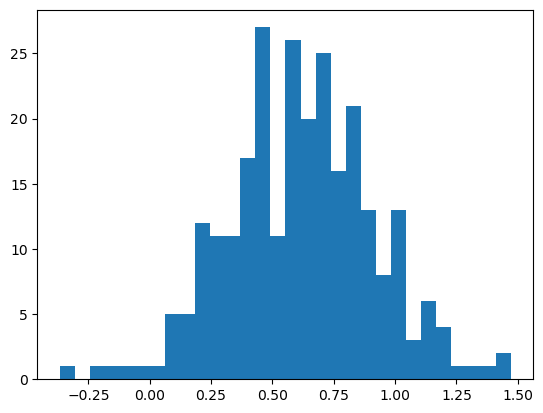

2


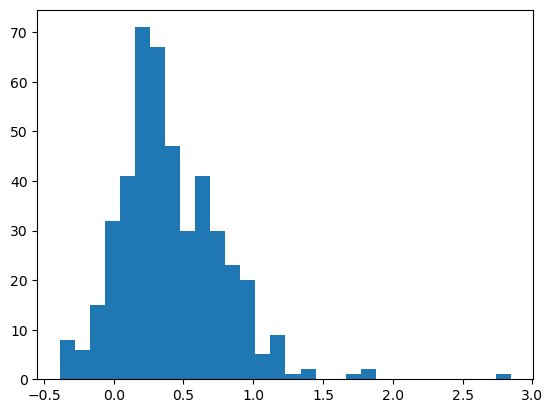

3


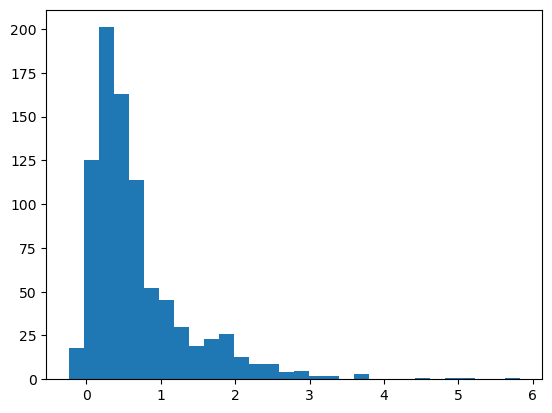

4


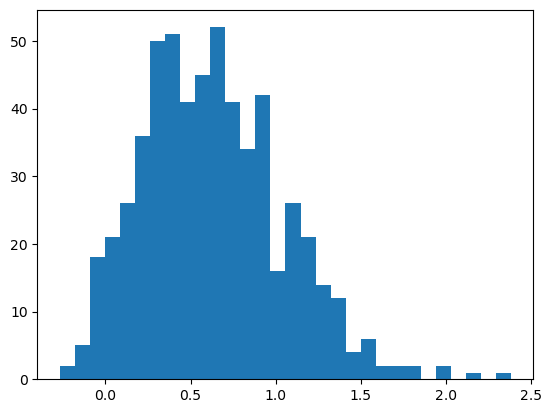

5


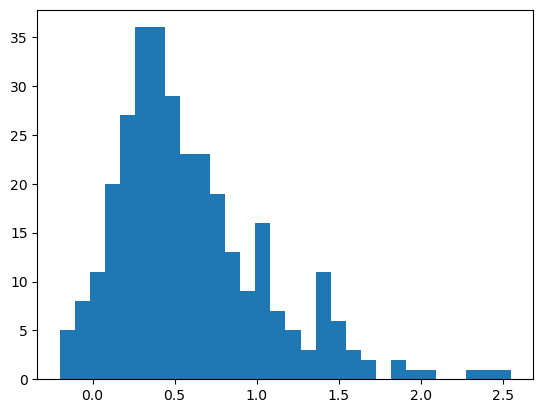

6


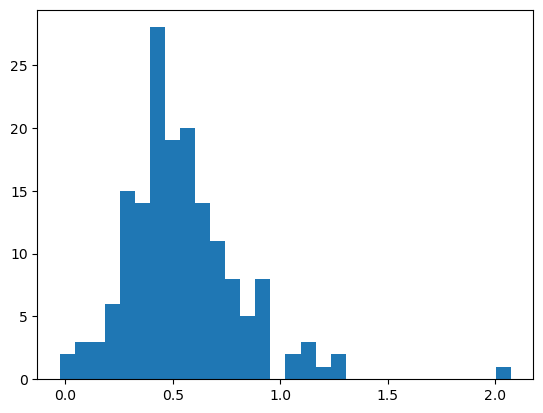

7


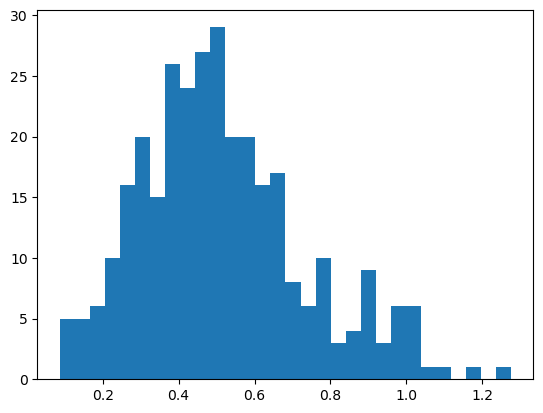

8


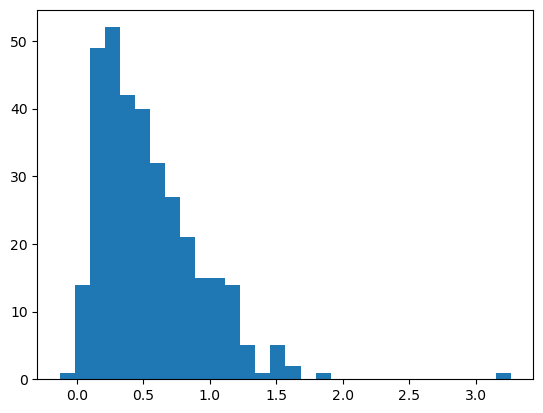

9


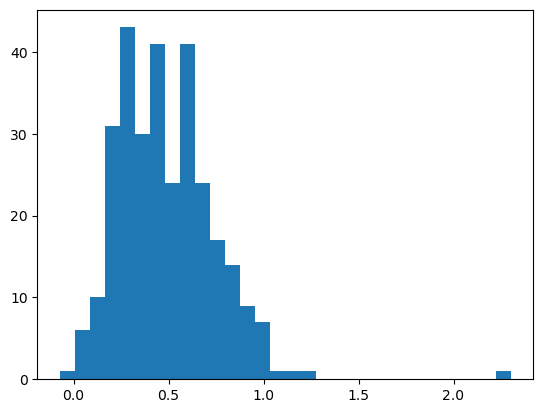

10


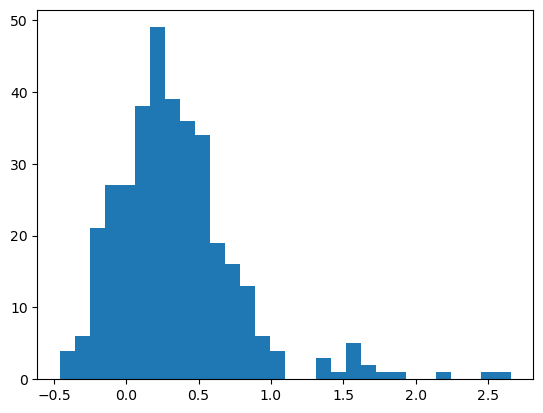

11


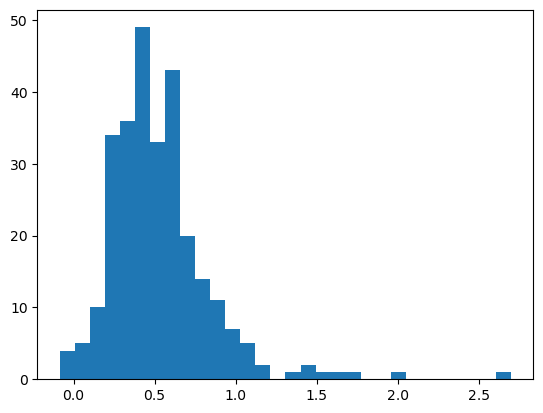

12


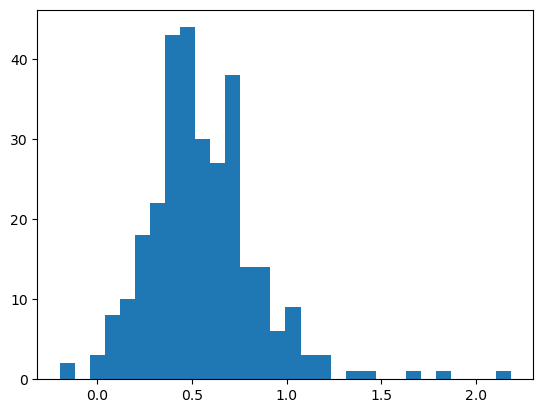

13


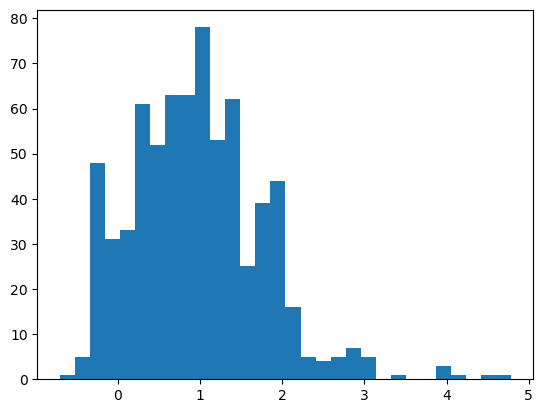

14


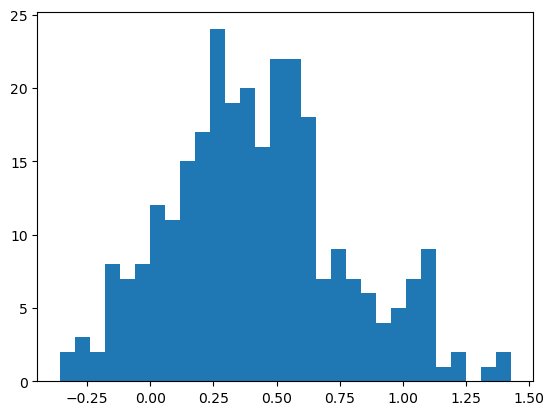

15


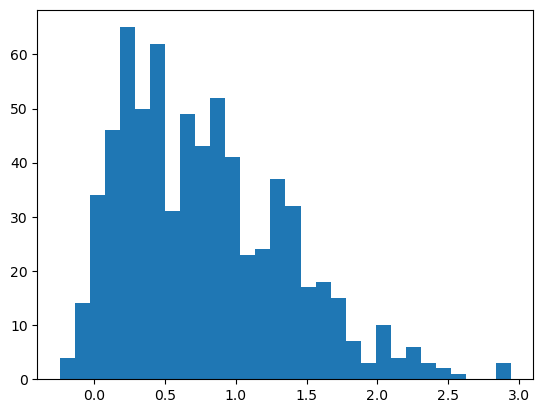

16


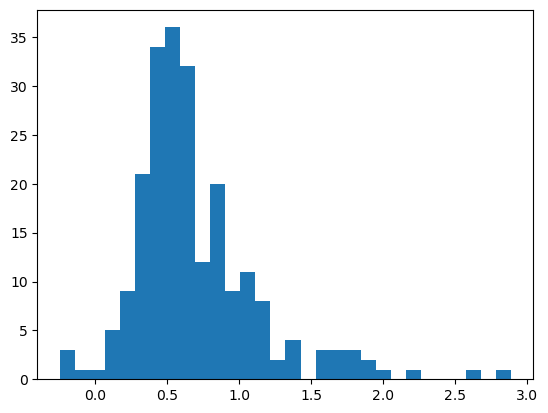

In [981]:
pairs = {}

X_2020 = X[X['2020_ds'] == 1]
X_2024 = X[X['2020_ds'] == 0]

X_2024_0 = X_2024[['Год постройки_1000-1950', 'Материал перекрытий_Иные',
       'Год постройки_2010-2020', 'Год постройки_2020-',
       'Год постройки_1970-1980', 'Год постройки_1980-1990',
       'Материал перекрытий_Железобетонные', 'Год постройки_2000-2010',
       'Тип дома_Деревянный', 'Тип дома_Монолитно-кирпичный',
       'Год постройки_1960-1970', 'Год постройки_1990-2000',
       'Год постройки_1950-1960', 'Отопление_Отсутствует',
       'Отопление_Не заполнено', 'Отопление_Центральное',
       'Материал перекрытий_Смешанные', 'Тип дома_Монолитный',
       'Отделка_Дизайнерский', 'fid_2']]

X_2020_0 = X_2020[['Год постройки_1000-1950', 'Материал перекрытий_Иные',
       'Год постройки_2010-2020', 'Год постройки_2020-',
       'Год постройки_1970-1980', 'Год постройки_1980-1990',
       'Материал перекрытий_Железобетонные', 'Год постройки_2000-2010',
       'Тип дома_Деревянный', 'Тип дома_Монолитно-кирпичный',
       'Год постройки_1960-1970', 'Год постройки_1990-2000',
       'Год постройки_1950-1960', 'Отопление_Отсутствует',
       'Отопление_Не заполнено', 'Отопление_Центральное',
       'Материал перекрытий_Смешанные', 'Тип дома_Монолитный',
       'Отделка_Дизайнерский', 'fid_2']]

mean_vals = []

for fid in range(1, 17):
    X_1 = X[X['fid_2'] == fid]

    pairs = []
    
    X_1_2020 = X_2020_0[X_2020_0['fid_2'] == fid]
    X_1_2024 = X_2024_0[X_2024_0['fid_2'] == fid]
    
    X_1_2020_index = X_1_2020.index
    X_1_2024_index = X_1_2024.index
    
    X_1_2020 = X_1_2020.reset_index(drop=True)
    X_1_2024 = X_1_2024.reset_index(drop=True)

    for i in range(X_1_2024.shape[0]):
        current_vec_2024 = X_1_2024.iloc[i].values
        distance = 10**8
        pairs.append(0)
        
        for j in range(X_1_2020.shape[0]):
            current_vec_2020 = X_1_2020.iloc[j].values
    
            new_dist = np.linalg.norm(current_vec_2024 - current_vec_2020)
            if new_dist < distance:
                # if j not in pairs:
                distance = new_dist
                pairs[-1] = j


    mean_difference = []

    for i in range(X_1_2024.shape[0]):
        y_20 = y[X_1_2020_index[pairs[i]]]
        y_24 = y[X_1_2024_index[i]]
        # print(y_24, y_20, (y_24 - y_20) / y_20)
        mean_difference.append((y_24 - y_20) / y_20)
    print(fid)
    plt.hist(mean_difference, bins=30)
    
    plt.show()

    mean_vals.append(mean_difference)

In [982]:
medians = []
for el in mean_vals:
    print(np.median(el))
    medians.append(np.median(el))

0.6211734693877552
0.35201439241127236
0.4867388250846905
0.5982241953385125
0.4925493354812725
0.5154598825831737
0.491800789553602
0.4603174603174601
0.4529911984222422
0.29230769230769005
0.48254130471810786
0.5173503843666941
0.9251336898395749
0.4013355592654395
0.6985716355207878
0.5943058091566926


(array([1., 1., 0., 1., 0., 2., 4., 2., 0., 2., 1., 0., 1., 0., 0., 0., 0.,
        0., 0., 1.]),
 array([0.29230769, 0.32394899, 0.35559029, 0.38723159, 0.41887289,
        0.45051419, 0.48215549, 0.51379679, 0.54543809, 0.57707939,
        0.60872069, 0.64036199, 0.67200329, 0.70364459, 0.73528589,
        0.76692719, 0.79856849, 0.83020979, 0.86185109, 0.89349239,
        0.92513369]),
 <BarContainer object of 20 artists>)

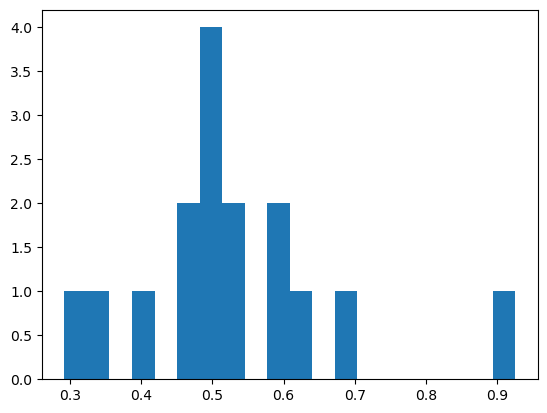

In [983]:
plt.hist(medians, bins=20)

In [984]:
from tqdm import trange

In [985]:
X['id_redevelopment'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 14.,
       15., 16., 17., 18., 20., 21., 22., 23., 24., 25., 26., 28., 29.,
       30., 31., 32., 33., 35., 36., 37., 38., 39., 40.,  0.])

  0%|          | 0/40 [00:00<?, ?it/s]

1


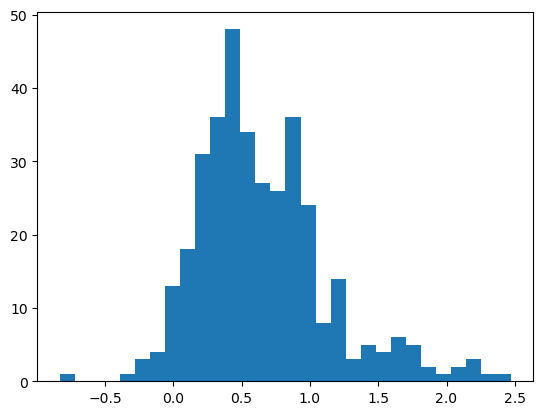

  2%|▎         | 1/40 [00:01<00:39,  1.02s/it]

2


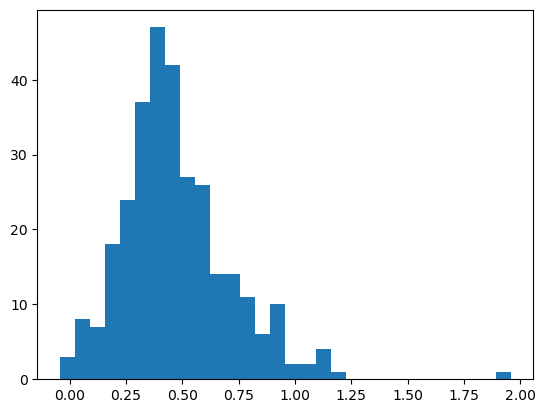

  5%|▌         | 2/40 [00:02<00:37,  1.00it/s]

3


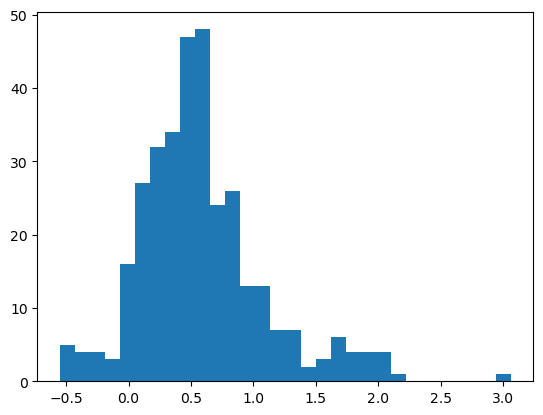

  8%|▊         | 3/40 [00:03<00:38,  1.03s/it]

4


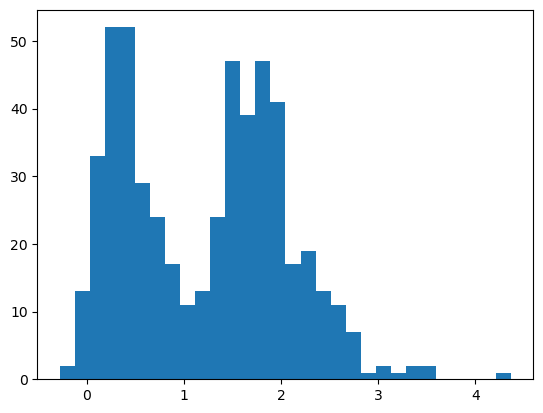

 10%|█         | 4/40 [00:04<00:39,  1.10s/it]

5


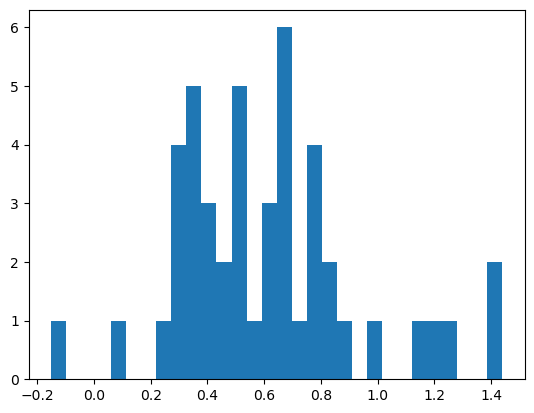

 12%|█▎        | 5/40 [00:04<00:26,  1.31it/s]

6


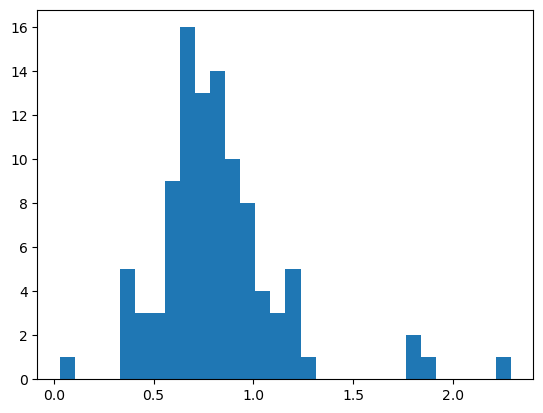

 15%|█▌        | 6/40 [00:05<00:24,  1.36it/s]

7


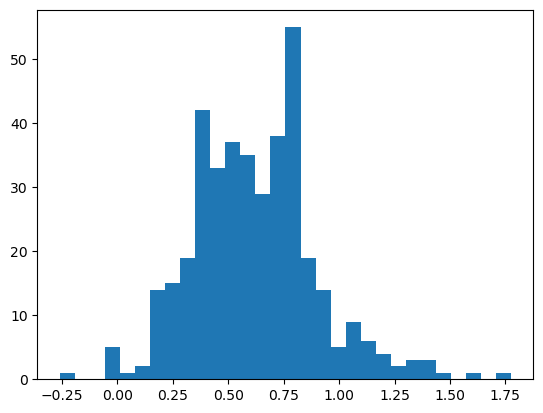

 18%|█▊        | 7/40 [00:06<00:27,  1.20it/s]

8


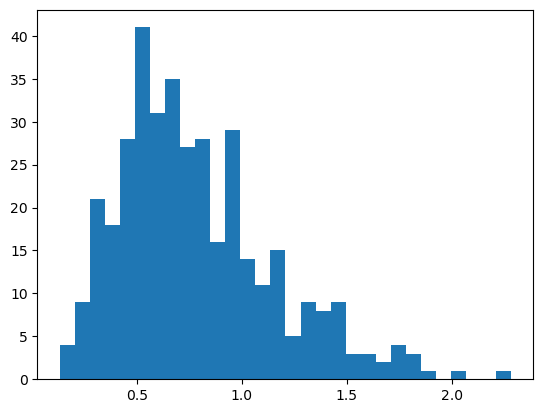

 20%|██        | 8/40 [00:07<00:27,  1.18it/s]

9


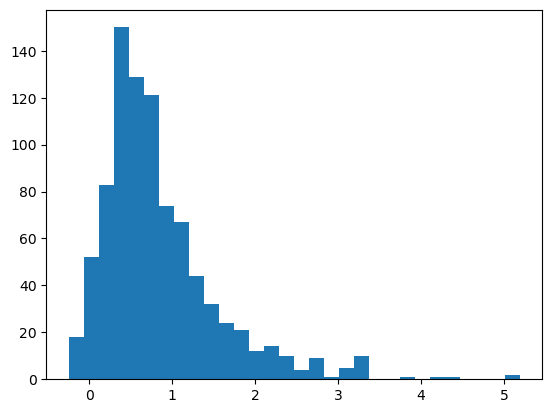

 22%|██▎       | 9/40 [00:10<00:55,  1.78s/it]

10


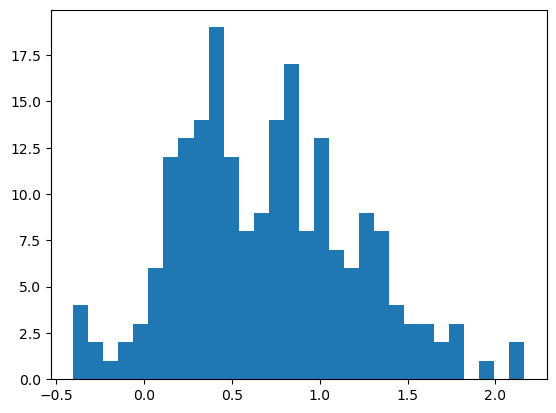

 25%|██▌       | 10/40 [00:11<00:39,  1.31s/it]

11


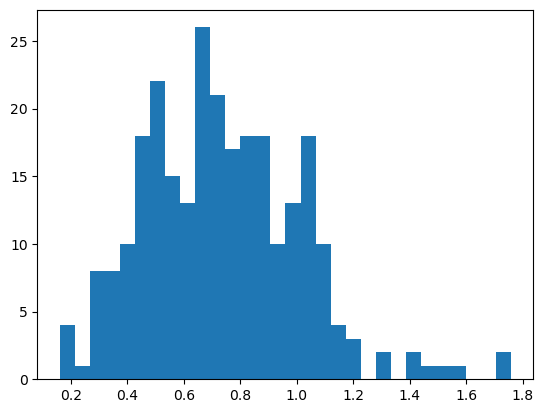

 28%|██▊       | 11/40 [00:11<00:30,  1.04s/it]

12


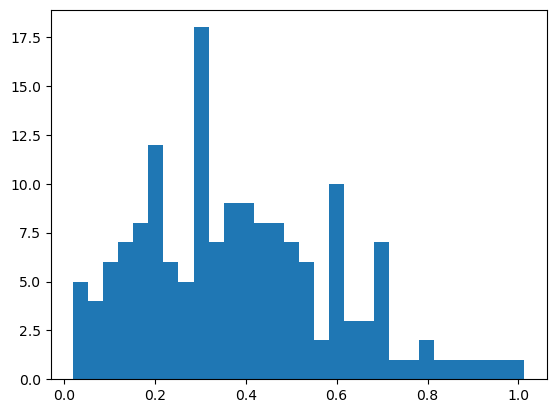

 30%|███       | 12/40 [00:11<00:23,  1.18it/s]

13


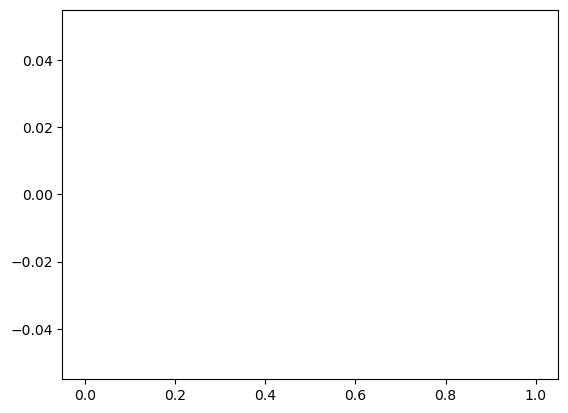

 32%|███▎      | 13/40 [00:12<00:16,  1.59it/s]

14


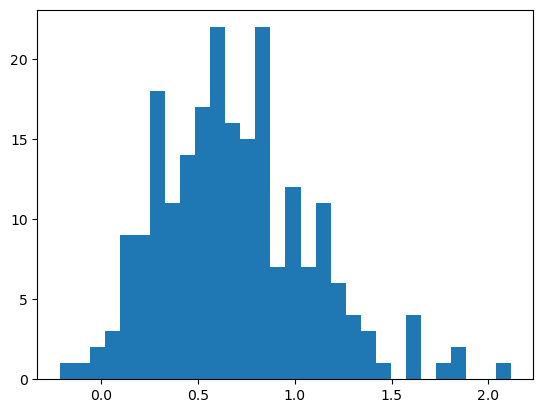

 35%|███▌      | 14/40 [00:12<00:16,  1.62it/s]

15


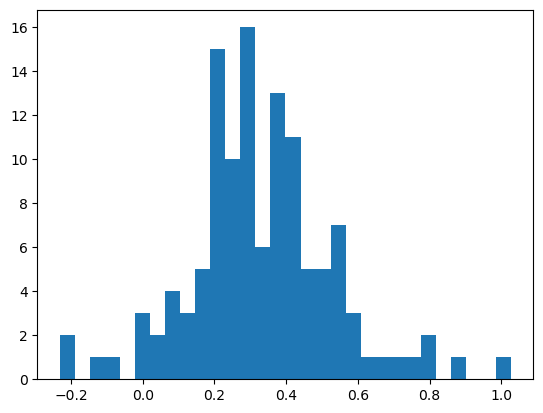

 38%|███▊      | 15/40 [00:12<00:12,  1.96it/s]

16


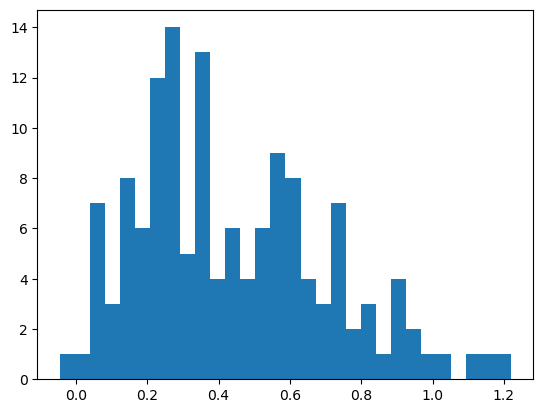

 40%|████      | 16/40 [00:13<00:10,  2.25it/s]

17


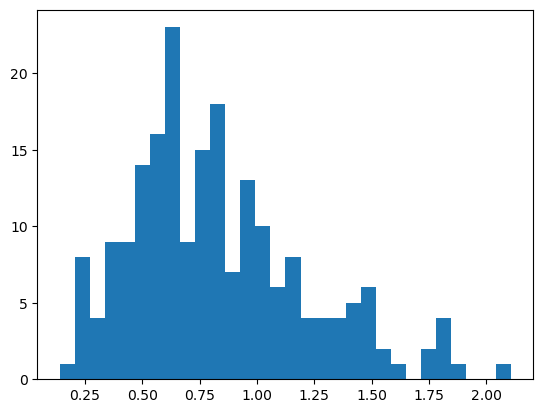

 42%|████▎     | 17/40 [00:13<00:10,  2.13it/s]

18


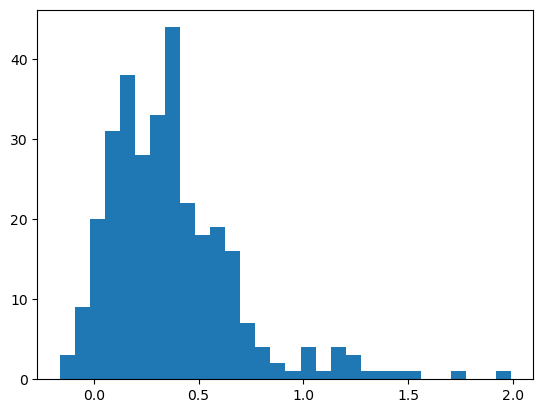

 45%|████▌     | 18/40 [00:14<00:15,  1.44it/s]

19


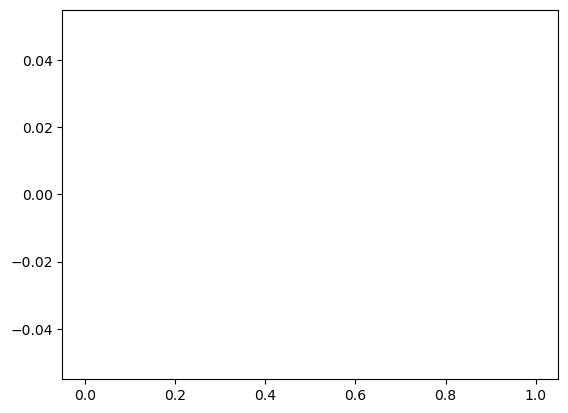

 48%|████▊     | 19/40 [00:15<00:11,  1.91it/s]

20


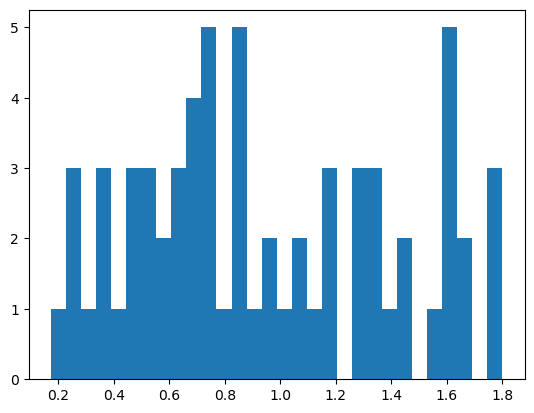

 50%|█████     | 20/40 [00:15<00:08,  2.36it/s]

21


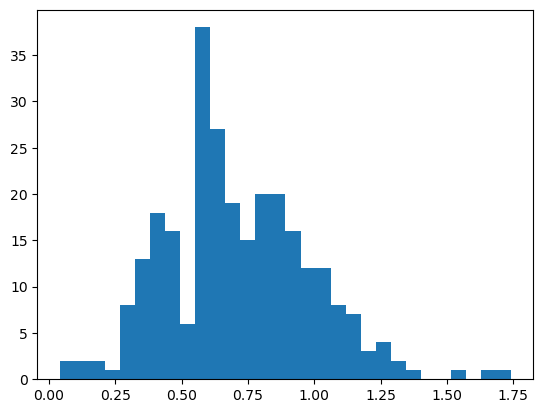

 52%|█████▎    | 21/40 [00:16<00:11,  1.70it/s]

22


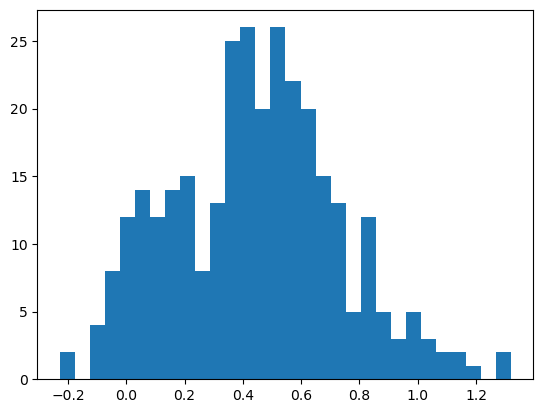

 55%|█████▌    | 22/40 [00:17<00:12,  1.39it/s]

23


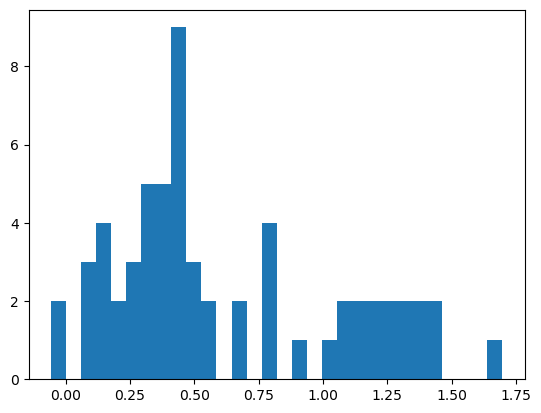

 57%|█████▊    | 23/40 [00:17<00:09,  1.80it/s]

24


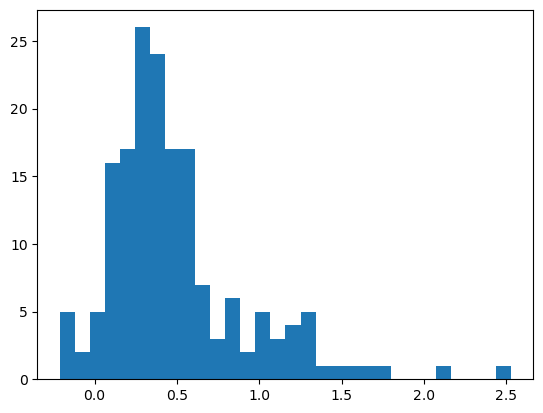

 60%|██████    | 24/40 [00:17<00:07,  2.09it/s]

25


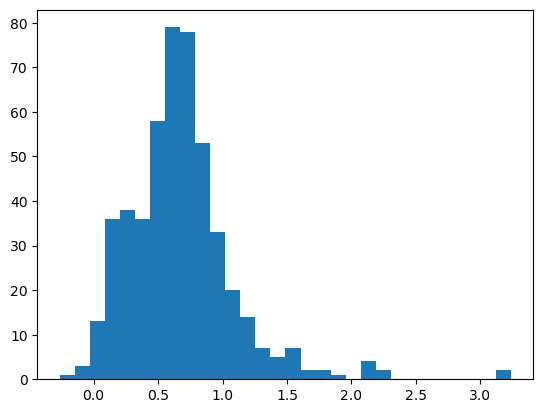

 62%|██████▎   | 25/40 [00:20<00:16,  1.10s/it]

26


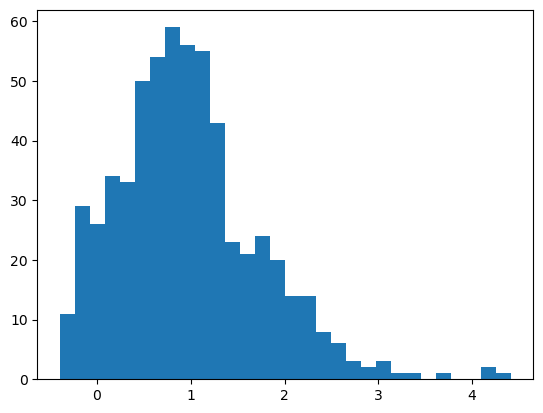

 65%|██████▌   | 26/40 [00:24<00:29,  2.11s/it]

27


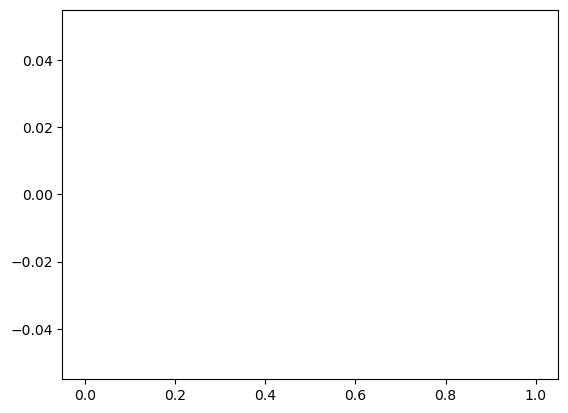

 68%|██████▊   | 27/40 [00:24<00:19,  1.51s/it]

28


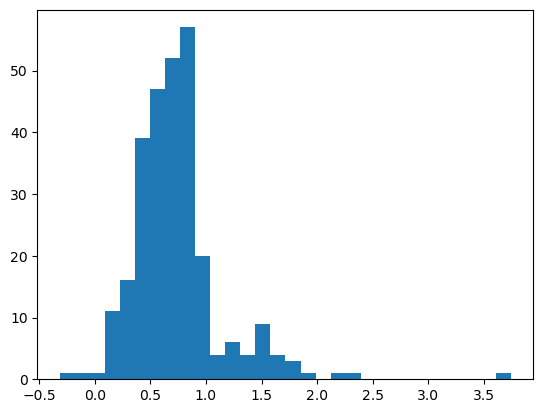

 70%|███████   | 28/40 [00:25<00:15,  1.30s/it]

29


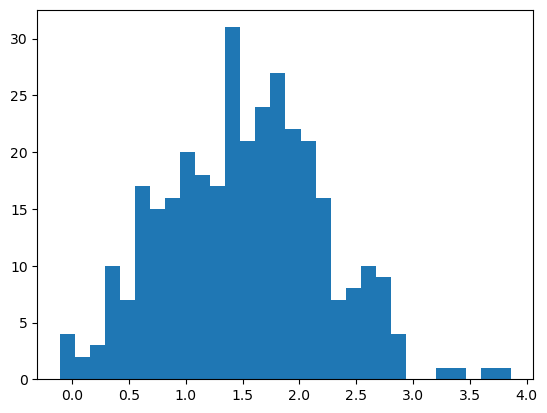

 72%|███████▎  | 29/40 [00:26<00:12,  1.10s/it]

30


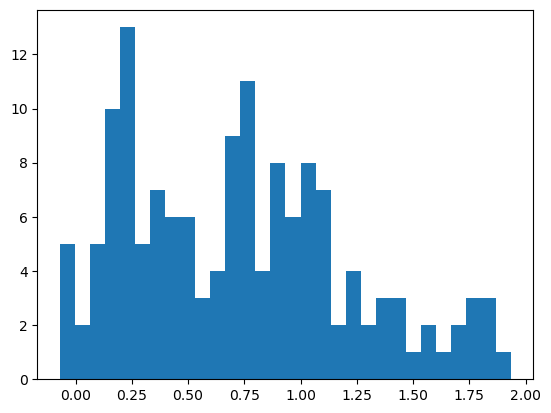

 75%|███████▌  | 30/40 [00:26<00:08,  1.15it/s]

31


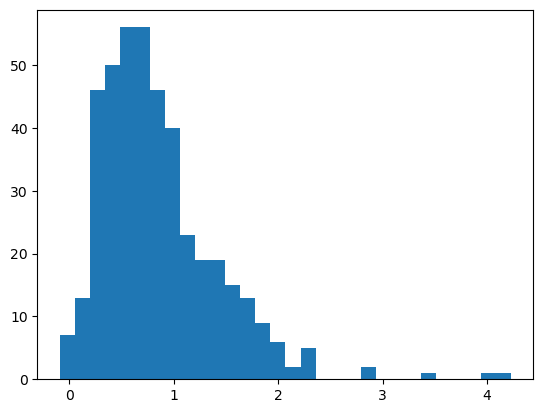

 78%|███████▊  | 31/40 [00:28<00:09,  1.02s/it]

32


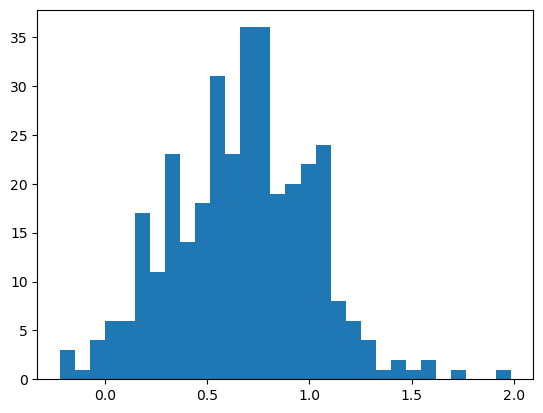

 80%|████████  | 32/40 [00:28<00:06,  1.17it/s]

33


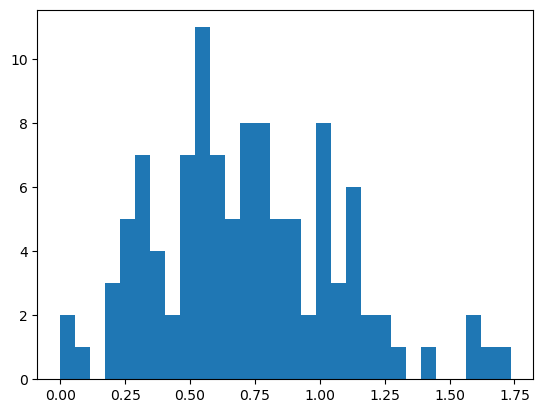

 82%|████████▎ | 33/40 [00:28<00:04,  1.49it/s]

34


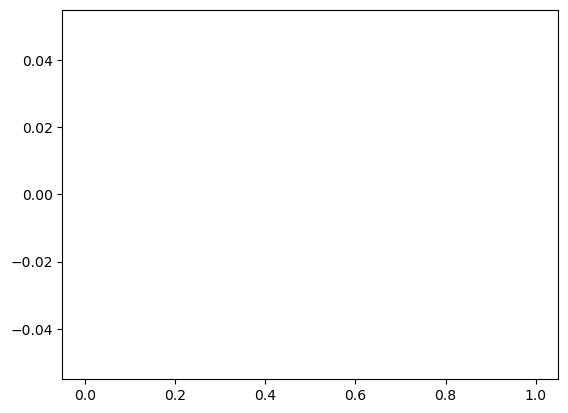

 85%|████████▌ | 34/40 [00:28<00:03,  1.97it/s]

35


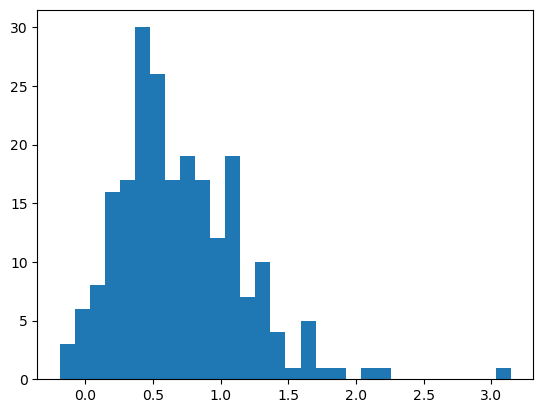

 88%|████████▊ | 35/40 [00:29<00:02,  1.93it/s]

36


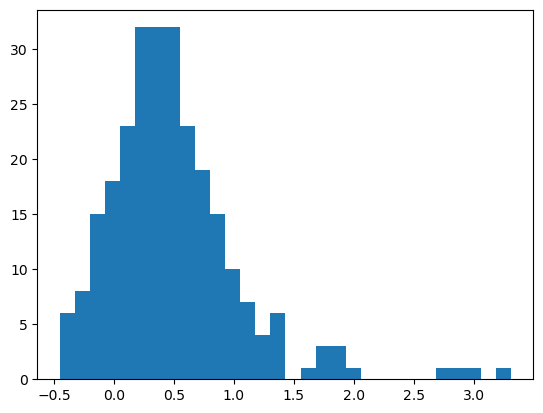

 90%|█████████ | 36/40 [00:30<00:02,  1.53it/s]

37


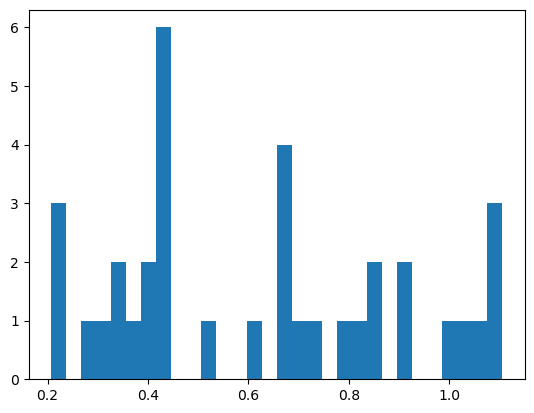

 92%|█████████▎| 37/40 [00:30<00:01,  1.99it/s]

38


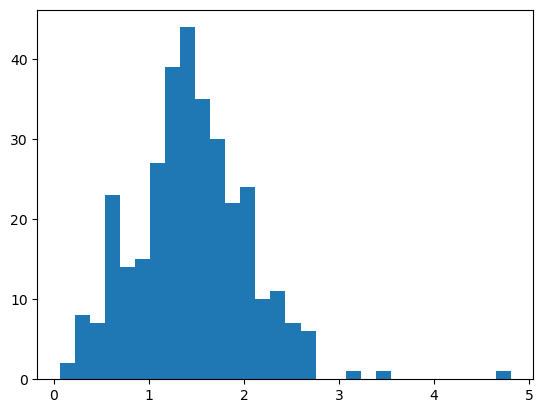

 95%|█████████▌| 38/40 [00:30<00:00,  2.27it/s]

39


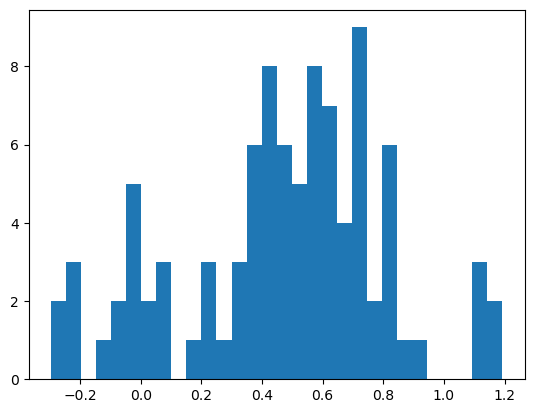

 98%|█████████▊| 39/40 [00:31<00:00,  2.62it/s]

40


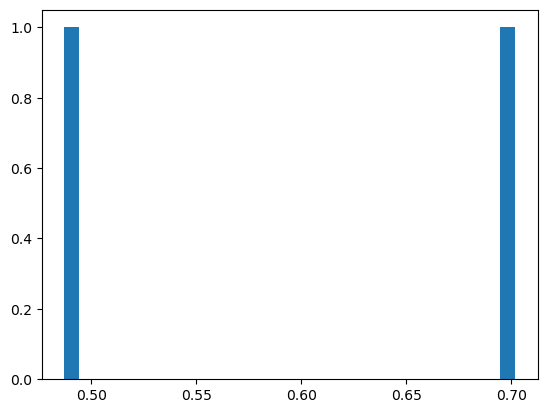

100%|██████████| 40/40 [00:31<00:00,  1.28it/s]


In [986]:
pairs = {}

X_2020 = X[X['2020_ds'] == 1]
X_2024 = X[X['2020_ds'] == 0]

X_2024_0 = X_2024[['Год постройки_1000-1950', 'Материал перекрытий_Иные',
       'Год постройки_2010-2020', 'Год постройки_2020-',
       'Год постройки_1970-1980', 'Год постройки_1980-1990',
       'Материал перекрытий_Железобетонные', 'Год постройки_2000-2010',
       'Тип дома_Деревянный', 'Тип дома_Монолитно-кирпичный',
       'Год постройки_1960-1970', 'Год постройки_1990-2000',
       'Год постройки_1950-1960', 'Отопление_Отсутствует',
       'Отопление_Не заполнено', 'Отопление_Центральное',
       'Материал перекрытий_Смешанные', 'Тип дома_Монолитный',
       'Отделка_Дизайнерский', 'in2km', 'id_redevelopment']]

X_2020_0 = X_2020[['Год постройки_1000-1950', 'Материал перекрытий_Иные',
       'Год постройки_2010-2020', 'Год постройки_2020-',
       'Год постройки_1970-1980', 'Год постройки_1980-1990',
       'Материал перекрытий_Железобетонные', 'Год постройки_2000-2010',
       'Тип дома_Деревянный', 'Тип дома_Монолитно-кирпичный',
       'Год постройки_1960-1970', 'Год постройки_1990-2000',
       'Год постройки_1950-1960', 'Отопление_Отсутствует',
       'Отопление_Не заполнено', 'Отопление_Центральное',
       'Материал перекрытий_Смешанные', 'Тип дома_Монолитный',
       'Отделка_Дизайнерский', 'in2km', 'id_redevelopment']]

mean_vals_red = []

for fid in trange(1, 41):

    pairs = []
    
    X_1_2020 = X_2020_0[X_2020_0['in2km'] == 1]
    X_1_2024 = X_2024_0[X_2024_0['in2km'] == 1]

    X_1_2020 = X_1_2020[X_1_2020['id_redevelopment'] == fid]
    X_1_2024 = X_1_2024[X_1_2024['id_redevelopment'] == fid]
    
    X_1_2020_index = X_1_2020.index
    X_1_2024_index = X_1_2024.index
    
    X_1_2020 = X_1_2020.reset_index(drop=True)
    X_1_2024 = X_1_2024.reset_index(drop=True)

    for i in range(X_1_2024.shape[0]):
        current_vec_2024 = X_1_2024.iloc[i].values
        distance = 10**8
        pairs.append(0)
        
        for j in range(X_1_2020.shape[0]//5):
            current_vec_2020 = X_1_2020.iloc[j].values
    
            new_dist = np.linalg.norm(current_vec_2024 - current_vec_2020)
            if new_dist < distance:
                # if j not in pairs:
                distance = new_dist
                pairs[-1] = j


    mean_difference = []

    for i in range(X_1_2024.shape[0]):
        y_20 = y[X_1_2020_index[pairs[i]]]
        y_24 = y[X_1_2024_index[i]]
        # print(y_24, y_20, (y_24 - y_20) / y_20)
        mean_difference.append((y_24 - y_20) / y_20)
    print(fid)
    plt.hist(mean_difference, bins=30)
    plt.show()

    mean_vals_red.append(mean_difference)

In [987]:
medians_1 = []
lens_1 = []

for el in mean_vals_red:
    # print(np.median(el))
    # if len(el) > 20:
    lens_1.append(len(el))
    medians_1.append(np.median(el))

C:\WORKING_APPS\Anaconda_v2\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\WORKING_APPS\Anaconda_v2\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


(array([1., 1., 0., 1., 0., 2., 4., 2., 0., 2., 1., 0., 1., 0., 0., 0., 0.,
        0., 0., 1.]),
 array([0.29230769, 0.32394899, 0.35559029, 0.38723159, 0.41887289,
        0.45051419, 0.48215549, 0.51379679, 0.54543809, 0.57707939,
        0.60872069, 0.64036199, 0.67200329, 0.70364459, 0.73528589,
        0.76692719, 0.79856849, 0.83020979, 0.86185109, 0.89349239,
        0.92513369]),
 <BarContainer object of 20 artists>)

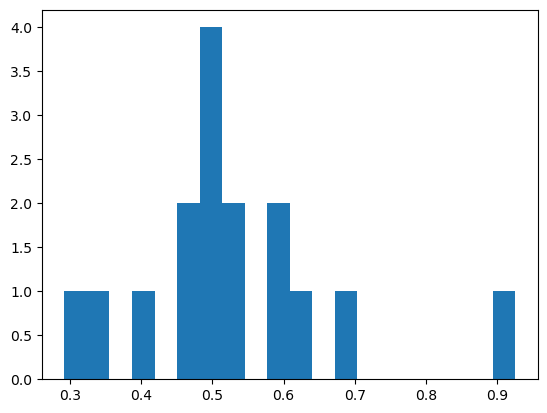

In [988]:
plt.hist(medians, bins=20)

(array([4., 2., 3., 2., 4., 5., 8., 3., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
        0., 1., 1.]),
 array([0.30995299, 0.371122  , 0.43229102, 0.49346004, 0.55462906,
        0.61579807, 0.67696709, 0.73813611, 0.79930513, 0.86047414,
        0.92164316, 0.98281218, 1.0439812 , 1.10515021, 1.16631923,
        1.22748825, 1.28865726, 1.34982628, 1.4109953 , 1.47216432,
        1.53333333]),
 <BarContainer object of 20 artists>)

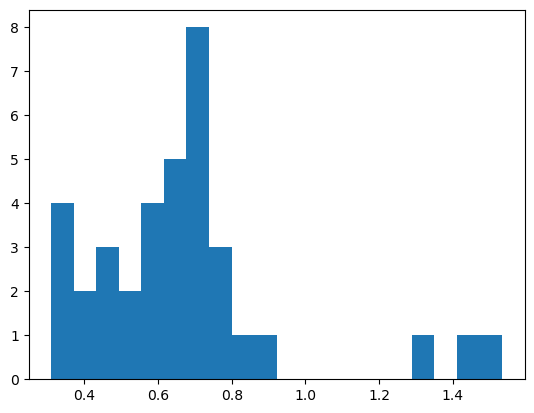

In [989]:
plt.hist(medians_1, bins=20)

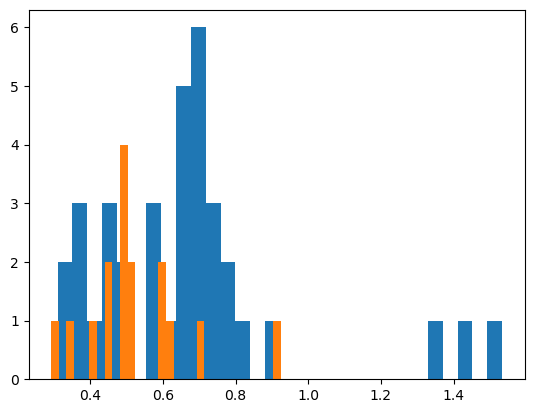

In [990]:
fig, ax = plt.subplots(1)

ax.hist(medians_1, bins=30)
ax.hist(medians, bins=30)

plt.show()

In [1180]:
import seaborn as sns

In [1222]:
np.array(medians_1) * 100

array([ 57.2815534 ,  43.27981192,  50.89527454, 133.82897674,
        58.1146318 ,  78.20206842,  61.32697335,  70.93150781,
        67.39834667,  68.6746988 ,  71.00905816,  35.93805665,
                nan,  65.51724138,  30.99529876,  36.94610268,
        78.47518829,  32.81045752,          nan,  83.        ,
        69.39393939,  44.3829623 ,  44.16017798,  38.73469388,
        65.52683044,  89.31600988,          nan,  71.07997266,
       153.33333333,  72.26513274,  74.17174654,  68.43816172,
        71.82662539,          nan,  63.98957195,  41.7011068 ,
        63.84957778, 143.17862166,  50.27615083,  59.45359477])

C:\Users\aksen\AppData\Local\Temp\ipykernel_6924\1049292310.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.array(medians_1) * 100, bins=20, label = 'Районы вблизи редевелопмента', hist=False)
C:\WORKING_APPS\Anaconda_v2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aksen\AppData\Local\Temp\ipykernel_6924\1049292310.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt

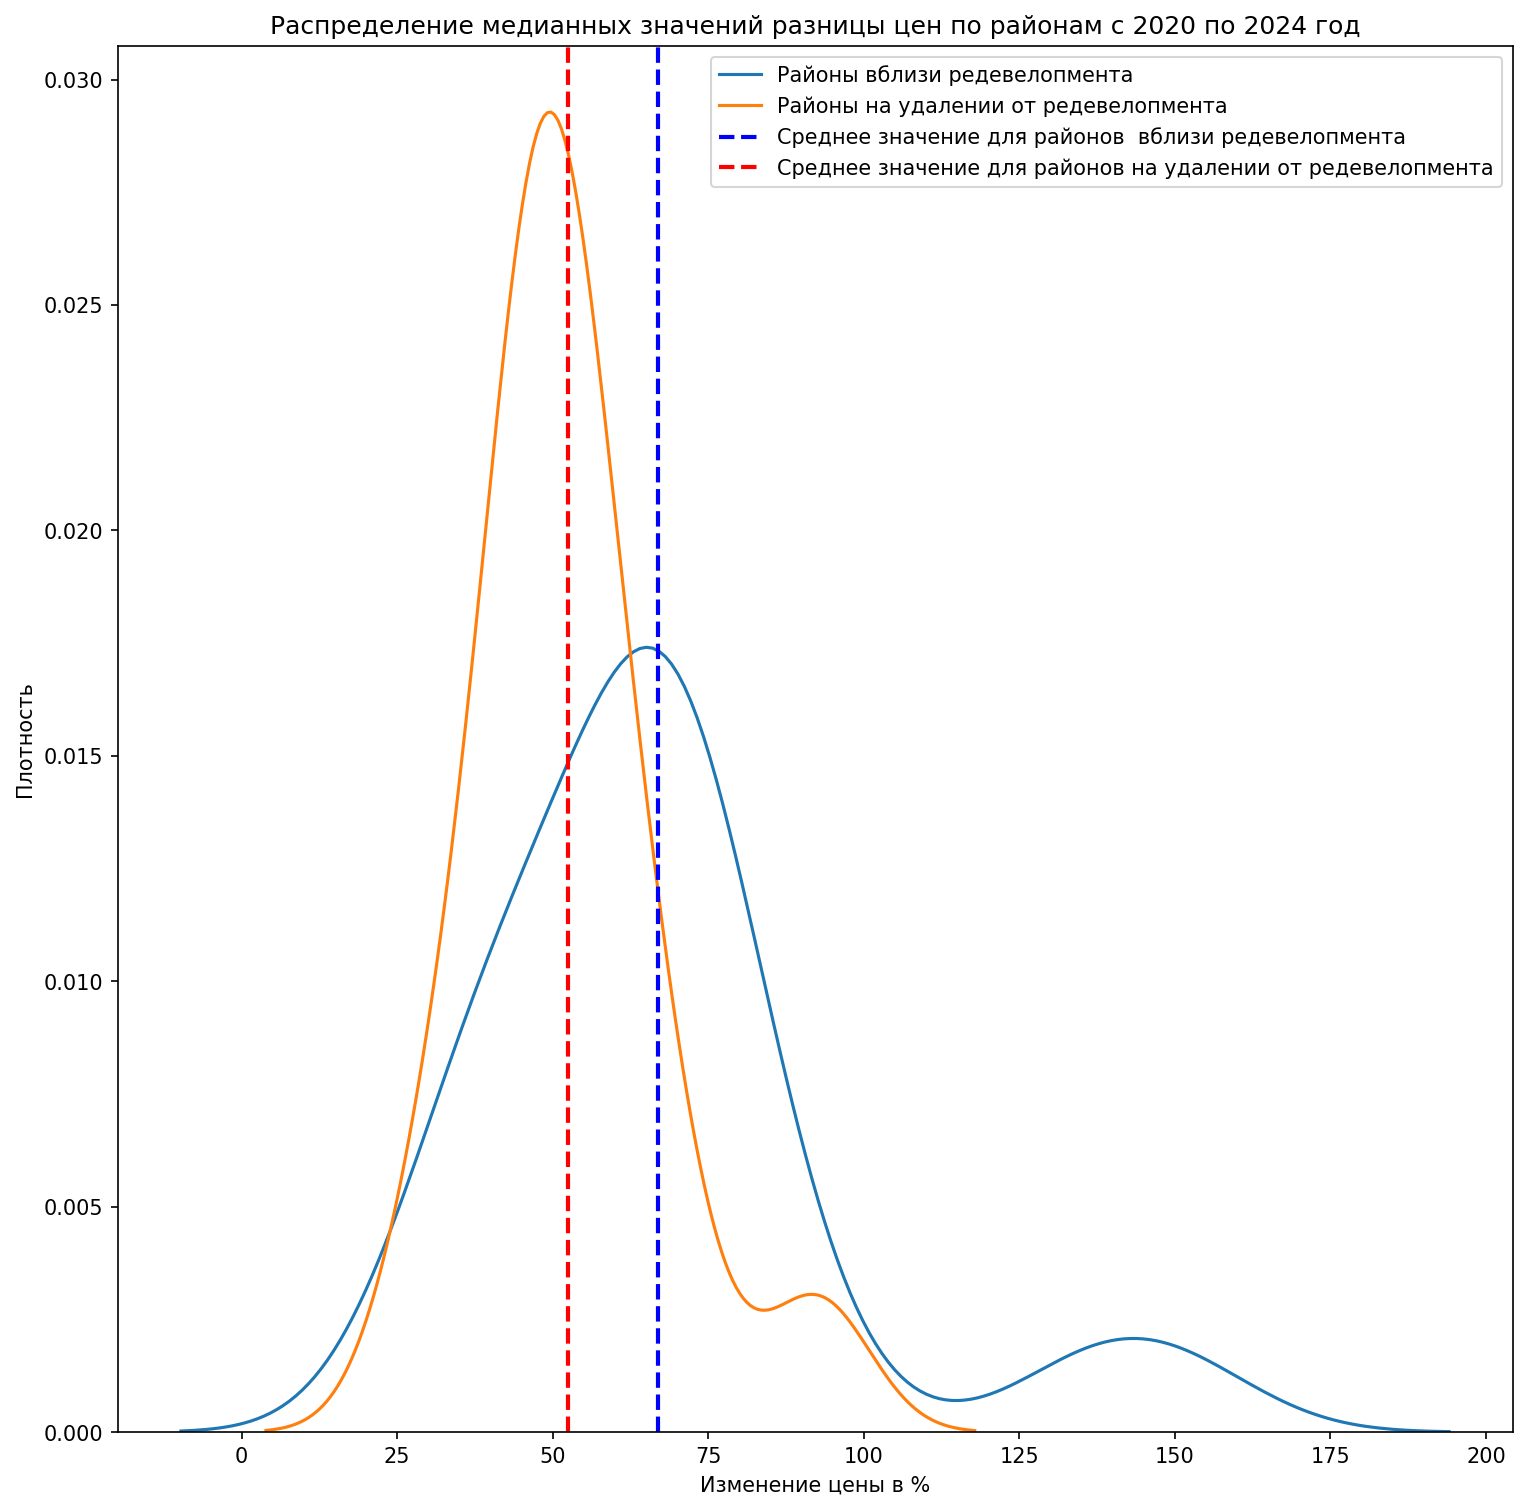

In [1232]:
fig, ax = plt.subplots(figsize=[12, 12], dpi=150)

sns.distplot(np.array(medians_1) * 100, bins=20, label = 'Районы вблизи редевелопмента', hist=False)
sns.distplot(np.array(medians) * 100, bins=20, label = 'Районы на удалении от редевелопмента', hist=False)

plt.title('Распределение медианных значений разницы цен по районам с 2020 по 2024 год')
plt.ylabel('Плотность')
plt.xlabel('Изменение цены в %')

plt.axvline(np.mean(np.array(medians_1_no_nan) * 100), color='b', lw=2, ls='--', label = 'Среднее значение для районов  вблизи редевелопмента',)
plt.axvline(np.mean(np.array(medians) * 100), color='r', ls='--', lw=2, label = 'Среднее значение для районов на удалении от редевелопмента',)
# plt.axvline(np.mean(medians), color='g', ls='--', lw=2)

plt.legend()

In [1228]:
import statsmodels

In [1229]:
statsmodels.stats.weightstats.ztest(medians_1_no_nan, medians)

(1.9653867873655497, 0.04936948755475461)

In [1205]:
medians_1_no_nan = []
for el in medians_1:
    if np.isnan(el):
        continue
    medians_1_no_nan.append(el)

In [991]:
X['id_redevelopment'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 14.,
       15., 16., 17., 18., 20., 21., 22., 23., 24., 25., 26., 28., 29.,
       30., 31., 32., 33., 35., 36., 37., 38., 39., 40.,  0.])

In [992]:
len(medians_1)

40

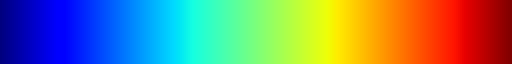

In [993]:
matplotlib.colormaps['autumn']
matplotlib.colormaps['jet']

C:\Users\aksen\AppData\Local\Temp\ipykernel_6924\2972152079.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(-1 * cur_x['Lat'], cur_x['Lng'], c=matplotlib.cm.get_cmap('jet')(value), marker='*')
C:\Users\aksen\AppData\Local\Temp\ipykernel_6924\2972152079.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(-1 * cur_x['Lat'], cur_x['Lng'], c=matplotlib.cm.get_cmap('jet')(value), marker='*')
C:\Users\aksen\AppData\Local\Temp\ipykernel_6924\2972152079.py:13: MatplotlibDeprecationWarning: The get_cmap function was 

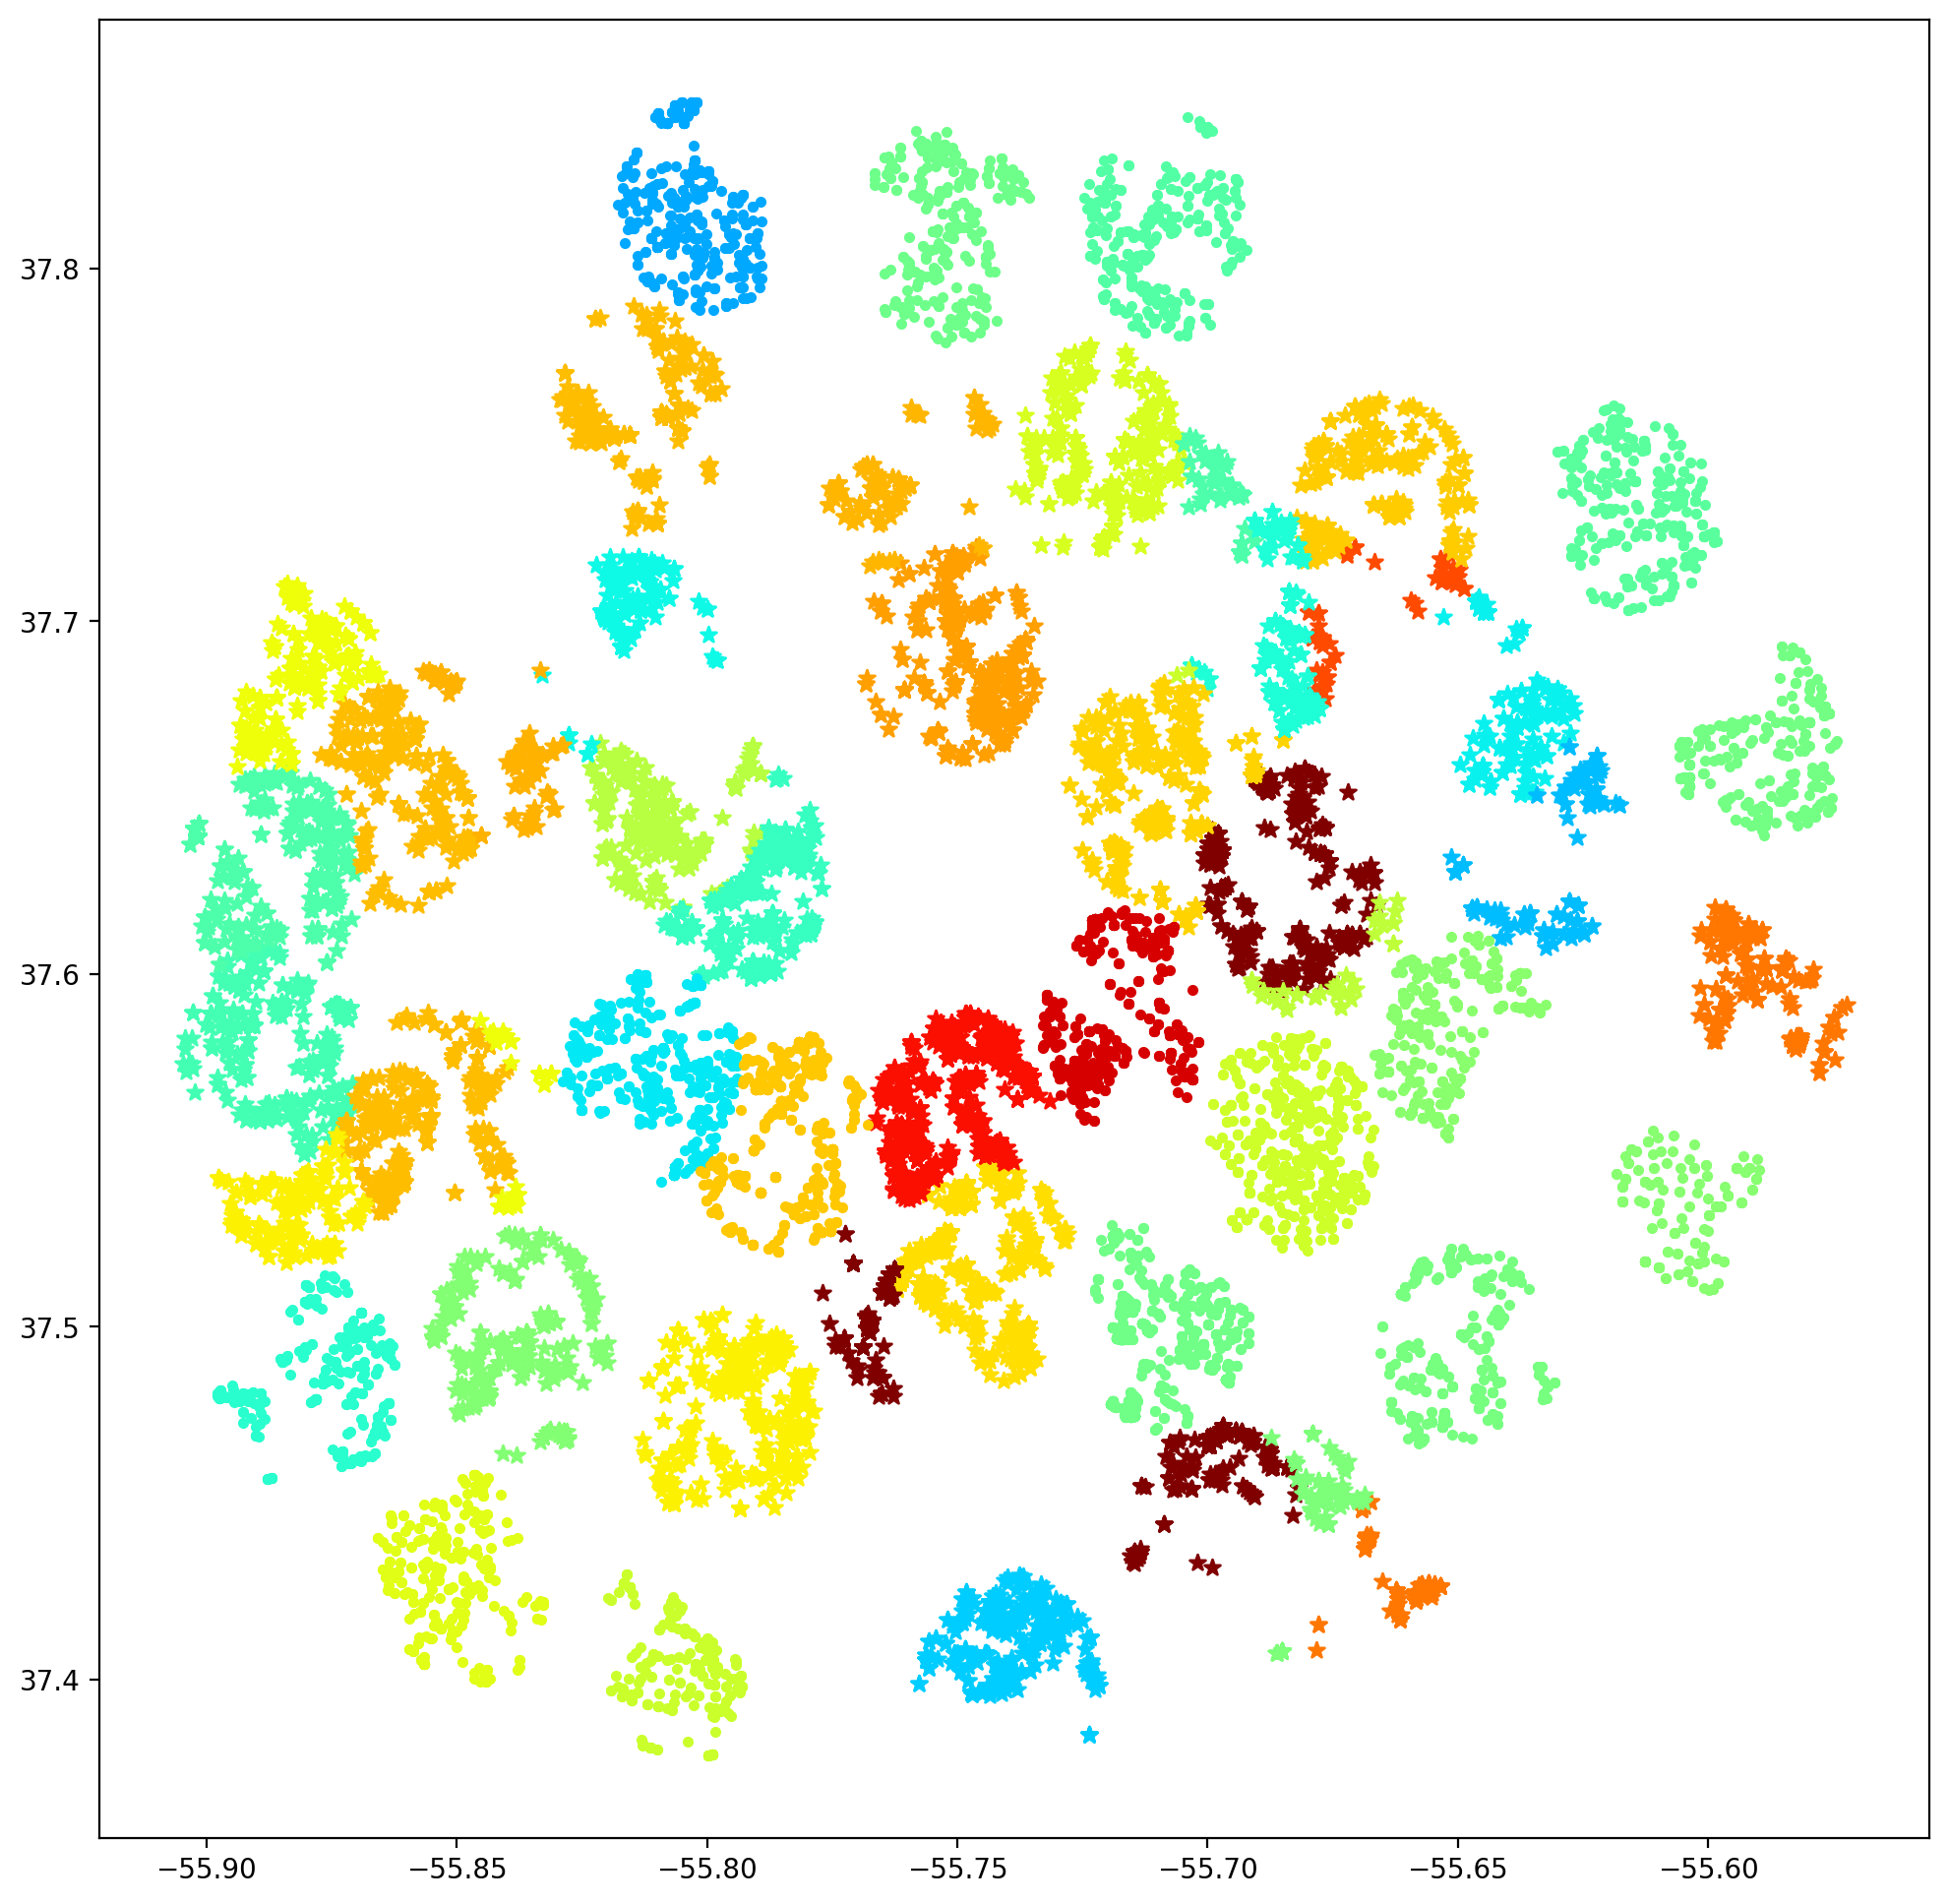

In [1002]:
plt.subplots(figsize=[12, 12], dpi=200)

for i in range(1, 41):
    cur_x = df_2024[df_2024['id_redevelopment'] == i]
    cur_x = cur_x[cur_x['in2km'] == 2000]
    value = medians_1[i-1]
    plt.scatter(-1 * cur_x['Lat'], cur_x['Lng'], c=matplotlib.cm.get_cmap('jet')(value), marker='*')

for fid in range(1, 17):
    cur_x = df_2024[df_2024['fid_2'] == fid]
    # cur_x = cur_x[cur_x['in1km'] == 1000]
    value = medians[fid-1]
    plt.scatter(-1 * cur_x['Lat'], cur_x['Lng'], c=matplotlib.cm.get_cmap('jet')(value), marker='.')

In [995]:
resulting_df_1 = pd.DataFrame()

resulting_df_1['fid_2'] = [i + 1 for i in range(16)]
resulting_df_1['median_change'] = medians

resulting_df_2 = pd.DataFrame()

resulting_df_2['redevelopment_id'] = [i + 1 for i in range(40)]
resulting_df_2['median_change'] = medians_1
resulting_df_2['number_of_observations'] = lens_1

In [996]:
resulting_df_1.to_csv('data/reulting_df_RAYONI_2.csv')
resulting_df_2.to_csv('data/reulting_df_REDEVELOPMENT_2.csv')

In [812]:
import matplotlib

matplotlib.cm.get_cmap('autumn')(1)

C:\Users\aksen\AppData\Local\Temp\ipykernel_6924\3056698050.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  matplotlib.cm.get_cmap('autumn')(1)


(1.0, 0.00392156862745098, 0.0, 1.0)

In [1005]:
np.mean(resulting_df_1['median_change'])

0.5239259764846855

In [1004]:
np.mean(resulting_df_2['median_change'])

0.6693620713621172

In [ ]:
resulting_df_01.to_csv('data/reulting_df_RAYONI.csv')
resulting_df_02.to_csv('data/reulting_df_REDEVELOPMENT_2.csv')

# DIFF in DIFF

In [1286]:
df_2020_no_promka = df_2020[df_2020['in1km'].isnull()]
df_2020_promka = df_2020[df_2020['in1km'] == 1000]

In [1287]:
df_2024_no_promka = df_2024[df_2024['in1km'].isnull()]
df_2024_promka = df_2024[df_2024['in1km'] == 1000]

In [1288]:
mean_2020_nop = df_2020_no_promka['Цена за кв.м'].mean()
mean_2020_p = df_2020_promka['Цена за кв.м'].mean()
mean_2024_nop = df_2024_no_promka['Цена за кв.м'].mean()
mean_2024_p = df_2024_promka['Цена за кв.м'].mean()

In [1289]:
mean_2024_nop

438662.36408582964

In [1290]:
(mean_2024_nop - mean_2020_nop) / mean_2020_nop

0.4083525654437472

In [1291]:
(mean_2024_p - mean_2020_p) / mean_2020_p

0.6434418165506322

In [1292]:
(mean_2024_p - mean_2020_p) - (mean_2024_nop - mean_2020_nop)

29251.43411492408

In [1293]:
((mean_2024_p - mean_2020_p) / mean_2020_p) - ((mean_2024_nop - mean_2020_nop) / mean_2020_nop)

0.23508925110688494

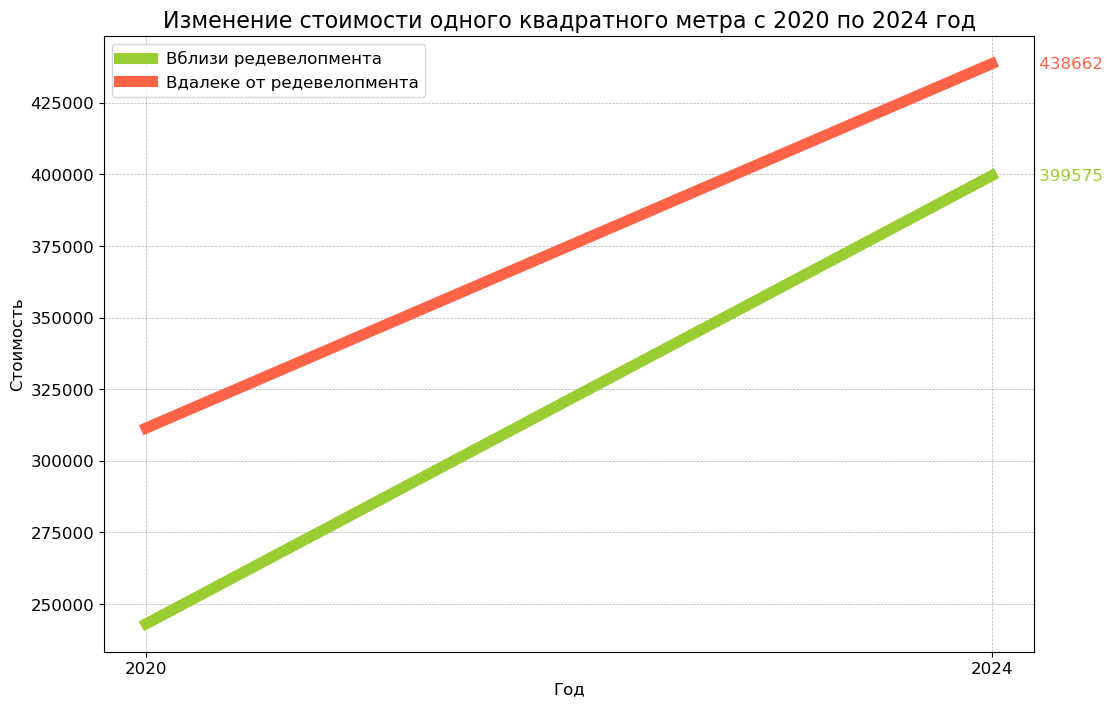

In [1304]:
fig, ax = plt.subplots(figsize=(12, 8))

# Линии
ax.plot([2020, 2024], [mean_2020_p, mean_2024_p], linewidth=8, color='yellowgreen', label="Вблизи редевелопмента")
ax.plot([2020, 2024], [mean_2020_nop, mean_2024_nop], linewidth=8, color='tomato', label="Вдалеке от редевелопмента")

# Аннотации
ax.text(2024, mean_2024_p, f'         {round(mean_2024_p)}', fontsize=12, color='yellowgreen', ha='left', va='center')
ax.text(2024, mean_2024_nop, f'         {round(mean_2024_nop)}', fontsize=12, color='tomato', ha='left', va='center')

# Легенда
ax.legend(fontsize=12)

# Оси
plt.xticks([2020, 2024], fontsize=12)
plt.yticks(fontsize=12)
ax.set_ylabel('Стоимость', fontsize=12)
ax.set_xlabel('Год', fontsize=12)

# Сетка
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Заголовок
plt.title("Изменение стоимости одного квадратного метра с 2020 по 2024 год", fontsize=16)

plt.show()

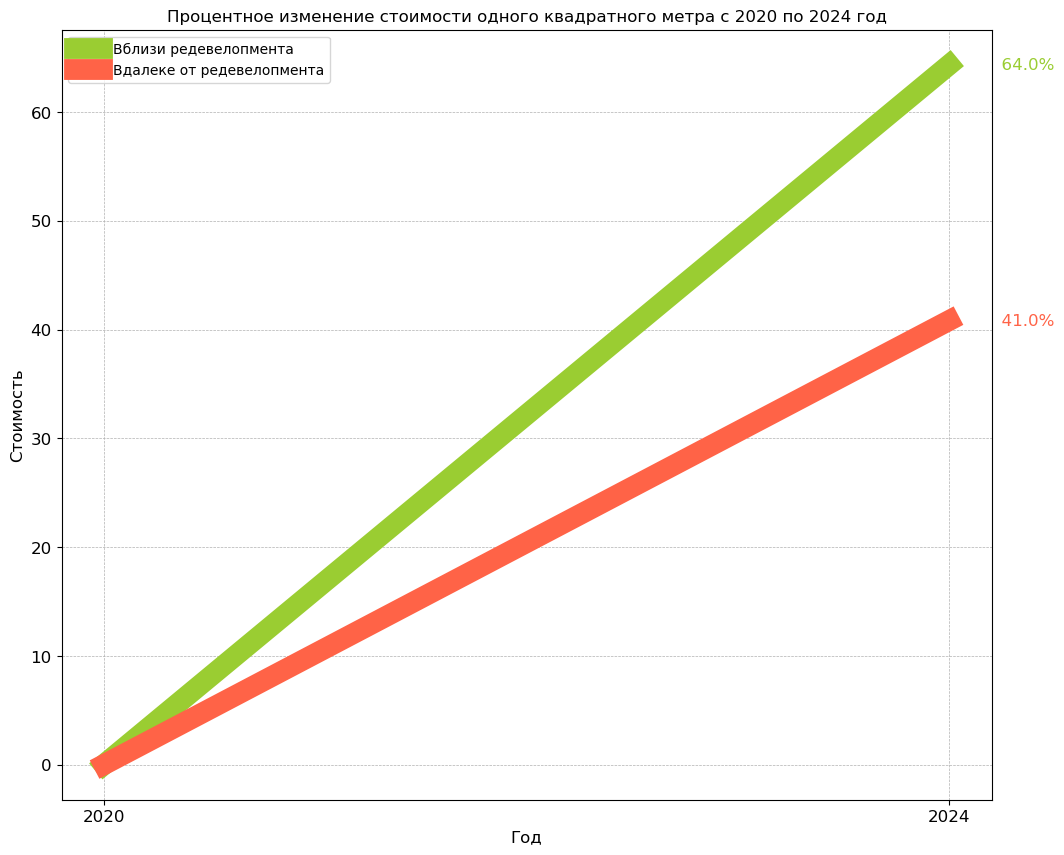

In [1338]:
fig, ax = plt.subplots(figsize=(12, 10))

diff_p = ((mean_2024_p - mean_2020_p)/mean_2020_p) 
diff_nop = ((mean_2024_nop - mean_2020_nop)/mean_2020_nop) 

plt.title("Процентное изменение стоимости одного квадратного метра с 2020 по 2024 год")

ax.plot([2020, 2024], [0, diff_p * 100], linewidth=15, color='yellowgreen', label="Вблизи редевелопмента")
ax.plot([2020, 2024], [0, diff_nop * 100], linewidth=15, color='tomato', label="Вдалеке от редевелопмента")

ax.text(2024, diff_p * 100, f'          {round(diff_p , 2)* 100}%', fontsize=12, color='yellowgreen', ha='left', va='center')

ax.text(2024, diff_nop * 100, f'          {round(diff_nop, 2) * 100}%', fontsize=12, color='tomato', ha='left', va='center')

# Сетка
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Оси
plt.xticks([2020, 2024], fontsize=12)
plt.yticks(fontsize=12)
ax.set_ylabel('Стоимость', fontsize=12)
ax.set_xlabel('Год', fontsize=12)

ax.legend()

plt.xticks([2020, 2024])

plt.show()

In [ ]:



fig, ax = plt.subplots(figsize=(12, 8))

# Заголовок
plt.title("Процентное изменение стоимости одного квадратного метра с 2020 по 2024 год", fontsize=16)

# Линии
ax.plot([2020, 2024], [100, 100 + diff_p * 100], linewidth=8, color='yellowgreen', label="Вблизи реновации")
ax.plot([2020, 2024], [100, 100 + diff_nop * 100], linewidth=8, color='tomato', label="Вдалеке от реновации")

# Аннотации
ax.text(2024, 100 + diff_p * 100, f'           {100 + diff_p * 100:.1f}%', fontsize=12, color='yellowgreen', ha='left', va='center')
ax.text(2024, 100 + diff_nop * 100, f'         {100 + diff_nop * 100:.1f}%', fontsize=12, color='tomato', ha='left', va='center')

# Легенда
ax.legend(fontsize=12)

# Оси
plt.xticks([2020, 2024], fontsize=12)
plt.yticks(fontsize=12)
ax.set_ylabel('Индекс стоимости', fontsize=12)
ax.set_xlabel('Год', fontsize=12)

# Сетка
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

In [ ]:
diff_p = ((mean_2024_p - mean_2020_p) / mean_2020_p)
diff_nop = ((mean_2024_nop - mean_2020_nop) / mean_2020_nop)

In [ ]:
diff_nop

In [ ]:
м

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

# Заголовок
plt.title("Процентное изменение стоимости одного квадратного метра с 2020 по 2024 год", fontsize=16)

# Столбцы
bars = ax.bar(x=['Районы вблизи реновации', 'Остальные районы'], height=[diff_p * 100, diff_nop * 100], width=0.5, color=['yellowgreen', 'tomato'])

# Аннотации
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=12)

# Подписи осей
ax.set_ylabel('Процентное изменение (%)', fontsize=14)
ax.set_xlabel('Районы', fontsize=14)

# Сетка
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')

plt.show()

# Difference regression

## EDA

In [1233]:
df_2020_clusters  = pd.read_csv(r"data/2020_clusters.csv")
df_2024_clusters  = pd.read_csv(r"data/2024_clusters.csv")

In [1234]:
df_2020_clusters.head()

fid  Дата среза        Lat        Lng  Комнатность Этаж/этажность  \
0  45097  2020/02/01  55.817600  37.364799  2-комн. кв.          14/17   
1  45323  2020/02/01  55.819199  37.365501  2-комн. кв.          11/22   
2  45324  2020/02/01  55.819199  37.365501  2-комн. кв.          11/22   
3  45325  2020/02/01  55.819199  37.365501  2-комн. кв.          11/22   
4  45326  2020/02/01  55.819199  37.365501  2-комн. кв.          11/22   

   Площадь      Цена                 Ссылка на объявление Кол-во фотографий  \
0     51.0   7990000  https://cian.ru/sale/flat/218057804            8 фото   
1     71.0  11200000  https://cian.ru/sale/flat/222781806           20 фото   
2     71.0  11222222  https://cian.ru/sale/flat/222631452           22 фото   
3     71.0  11288000  https://cian.ru/sale/flat/222788798           16 фото   
4     71.0  12100000  https://cian.ru/sale/flat/223027831           20 фото   

   ...    Метро 3 расстояние  Тип объявления Кол-во комнат (числом)  \
0  ...  4 мин. на транспорте            Sale                    2.0   
1  ...                   NaN            Sale                    2.0   
2  ...  9 мин. на транспорте            Sale                    2.0   
3  ...                   NaN            Sale                    2.0   
4  ...                   NaN            Sale                    2.0   

  Источник данных  Локация   Цена за кв.м in1km in2km fid_2    id  
0            Cian      MSK  156666.666667   NaN   NaN   NaN  1195  
1            Cian      MSK  157746.478873   NaN   NaN   NaN  1195  
2            Cian      MSK  158059.464789   NaN   NaN   NaN  1195  
3            Cian      MSK  158985.915493   NaN   NaN   NaN  1195  
4            Cian      MSK  170422.535211   NaN   NaN   NaN  1195  

[5 rows x 47 columns]

In [1235]:
LAT = df_2020_clusters['Lat'].values
LONG = df_2020_clusters['Lng'].values

distance = []

for i in range(len(LAT)):
    distance.append(find_Kremlin_distance(LAT[i], LONG[i]))
    
df_2020_clusters['center_distance'] = distance

In [1236]:
LAT = df_2024_clusters['Lat'].values
LONG = df_2024_clusters['Lng'].values

distance = []

for i in range(len(LAT)):
    distance.append(find_Kremlin_distance(LAT[i], LONG[i]))
    
df_2024_clusters['center_distance'] = distance

In [1237]:
df_2024_clusters.head()

fid  Дата среза        Lat        Lng  Комнатность Этаж/этажность  \
0   7909  2024/01/01  55.819155  37.365469          1.0           2/22   
1  12384  2024/01/01  55.819155  37.365469          2.0           9/22   
2  12697  2024/01/01  55.819155  37.365469          3.0           3/22   
3   1820  2024/01/01  55.819155  37.365469          3.0           4/22   
4   6553  2024/01/01  55.819155  37.365469          3.0          12/22   

   Площадь      Цена                     Ссылка на объявление  \
0     22.2   6500000  https://www.cian.ru/sale/flat/295280794   
1     74.6  12999999  https://www.cian.ru/sale/flat/294506632   
2    100.0  17000000  https://www.cian.ru/sale/flat/296082869   
3     97.9  15300000  https://www.cian.ru/sale/flat/292283808   
4     74.6  14450000  https://www.cian.ru/sale/flat/296708652   

   Кол-во фотографий  ...  Тип объявления  Кол-во комнат (числом)  \
0                NaN  ...            Sale                     1.0   
1                NaN  ...            Sale                     2.0   
2                NaN  ...            Sale                     3.0   
3                NaN  ...            Sale                     3.0   
4                NaN  ...            Sale                     3.0   

  Источник данных Локация   Цена за кв.м  in2km in1km  fid_2    id  \
0            Cian     MSK  292792.792793    NaN   NaN    NaN  1195   
1            Cian     MSK  174262.721180    NaN   NaN    NaN  1195   
2            Cian     MSK  170000.000000    NaN   NaN    NaN  1195   
3            Cian     MSK  156281.920327    NaN   NaN    NaN  1195   
4            Cian     MSK  193699.731903    NaN   NaN    NaN  1195   

  center_distance  
0       17.592182  
1       17.592182  
2       17.592182  
3       17.592182  
4       17.592182  

[5 rows x 48 columns]

In [1238]:
df_all = pd.read_csv(r"data/all.csv")

In [1239]:
df_all.head(10)

id         left           top          right        bottom  Площадь_mean  \
0   1  380884.0184  6.211605e+06  382038.718938  6.210605e+06           NaN   
1   2  380884.0184  6.210605e+06  382038.718938  6.209605e+06           NaN   
2   3  380884.0184  6.209605e+06  382038.718938  6.208605e+06           NaN   
3   4  380884.0184  6.208605e+06  382038.718938  6.207605e+06           NaN   
4   5  380884.0184  6.207605e+06  382038.718938  6.206605e+06           NaN   
5   6  380884.0184  6.206605e+06  382038.718938  6.205605e+06           NaN   
6   7  380884.0184  6.205605e+06  382038.718938  6.204605e+06           NaN   
7   8  380884.0184  6.204605e+06  382038.718938  6.203605e+06           NaN   
8   9  380884.0184  6.203605e+06  382038.718938  6.202605e+06           NaN   
9  10  380884.0184  6.202605e+06  382038.718938  6.201605e+06           NaN   

   Площадь_median  Цена_mean  Цена_median  Кол-во комнат (числом)_mean  ...  \
0             NaN        NaN          NaN                          NaN  ...   
1             NaN        NaN          NaN                          NaN  ...   
2             NaN        NaN          NaN                          NaN  ...   
3             NaN        NaN          NaN                          NaN  ...   
4             NaN        NaN          NaN                          NaN  ...   
5             NaN        NaN          NaN                          NaN  ...   
6             NaN        NaN          NaN                          NaN  ...   
7             NaN        NaN          NaN                          NaN  ...   
8             NaN        NaN          NaN                          NaN  ...   
9             NaN        NaN          NaN                          NaN  ...   

   Цена за кв.м_mean  Цена за кв.м_median  ID объявления_count  \
0                NaN                  NaN                  NaN   
1                NaN                  NaN                  NaN   
2                NaN                  NaN                  NaN   
3                NaN                  NaN                  NaN   
4                NaN                  NaN                  NaN   
5                NaN                  NaN                  NaN   
6                NaN                  NaN                  NaN   
7                NaN                  NaN                  NaN   
8                NaN                  NaN                  NaN   
9                NaN                  NaN                  NaN   

   Площадь_mean_2  Площадь_median_2  Цена_mean_2  Цена_median_2  \
0             NaN               NaN          NaN            NaN   
1             NaN               NaN          NaN            NaN   
2             NaN               NaN          NaN            NaN   
3             NaN               NaN          NaN            NaN   
4             NaN               NaN          NaN            NaN   
5             NaN               NaN          NaN            NaN   
6             NaN               NaN          NaN            NaN   
7             NaN               NaN          NaN            NaN   
8             NaN               NaN          NaN            NaN   
9             NaN               NaN          NaN            NaN   

   Цена за кв.м_mean_2  Цена за кв.м_median_2  ID объявления_count_2  
0                  NaN                    NaN                    NaN  
1                  NaN                    NaN                    NaN  
2                  NaN                    NaN                    NaN  
3                  NaN                    NaN                    NaN  
4                  NaN                    NaN                    NaN  
5                  NaN                    NaN                    NaN  
6                  NaN                    NaN                    NaN  
7                  NaN                    NaN                    NaN  
8                  NaN                    NaN                    NaN  
9                  NaN                    NaN                    NaN  

[10 rows x 21 co

In [1240]:
import seaborn as sns

In [ ]:
df_krt.head(100)

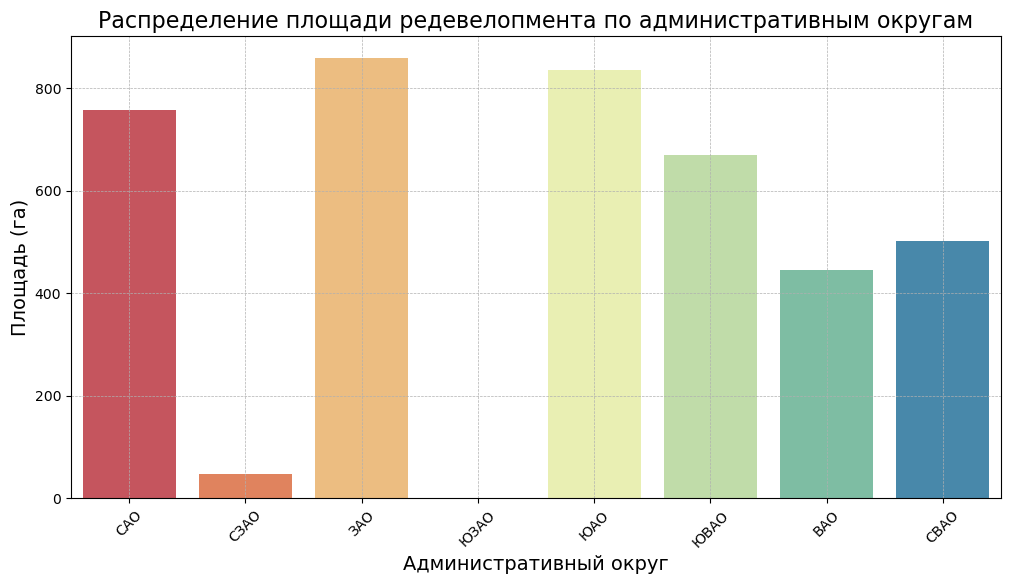

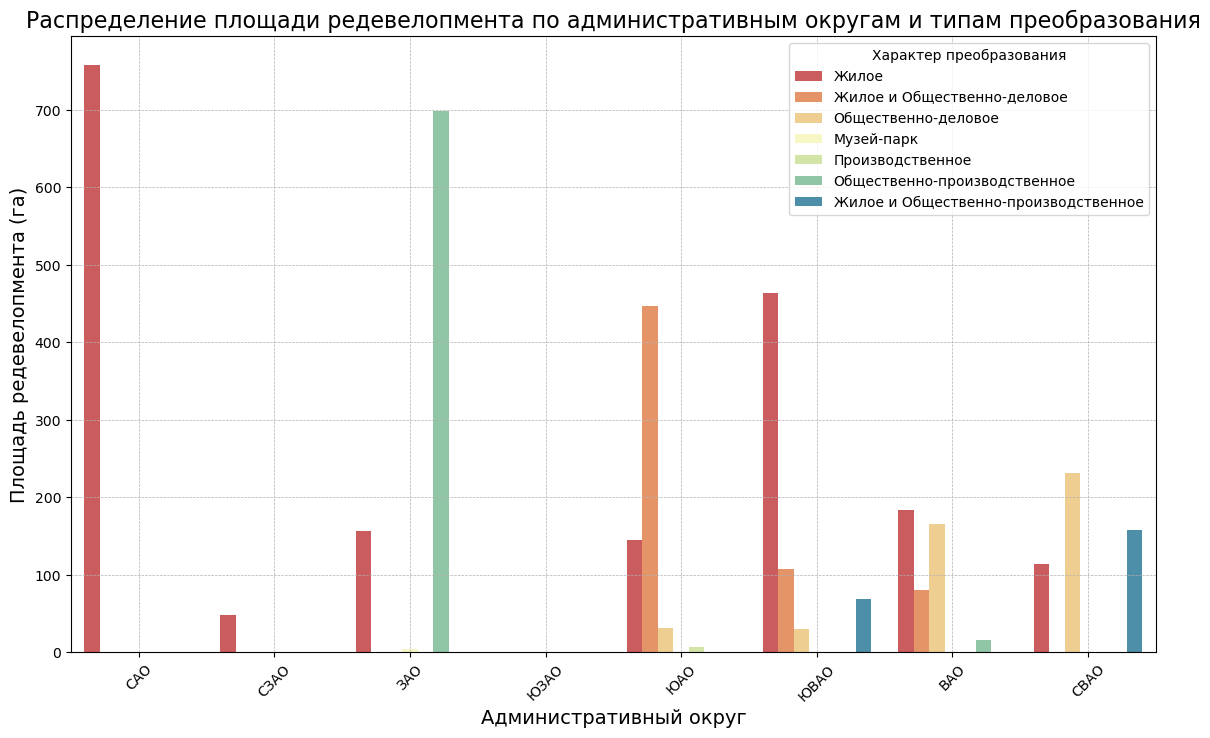

NameError: name 'path_effects' is not defined

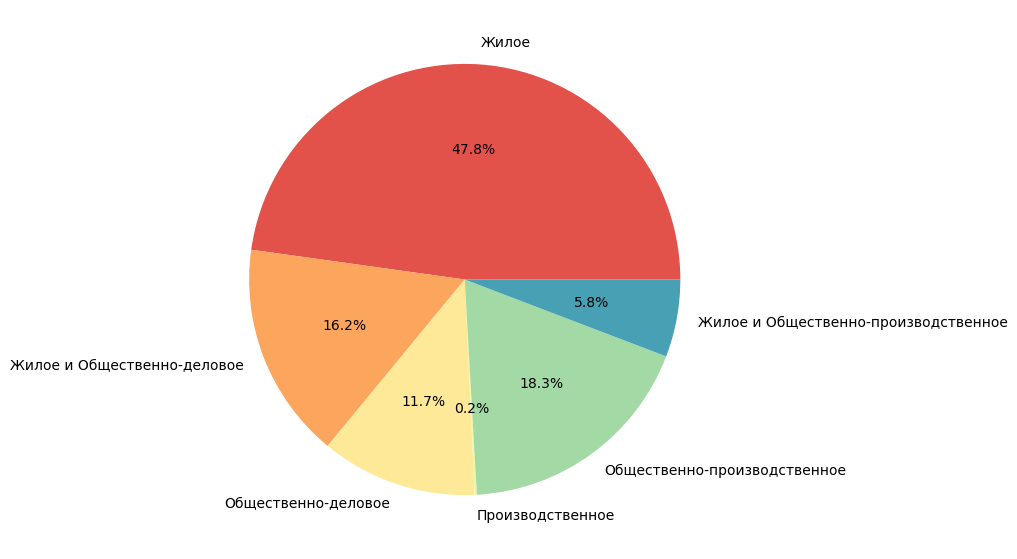

In [1243]:
# Данные для анализа
krt = pd.read_csv(r"data/krt.csv")
# Создадим DataFrame
df_krt = pd.DataFrame(krt)

df_krt['Территория редевелопмента (га)'] = df_krt['Территория редевелопмента (га)'].apply(lambda x: x.replace(',', '.'))
df_krt['Территория редевелопмента (га)'] = pd.to_numeric(df_krt['Территория редевелопмента (га)'], errors='coerce')





# График 1: Распределение проектов редевелопмента по административным округам
# plt.figure(figsize=(12, 6))
# sns.countplot(data=df_krt, x='Адм. округ', order=df_krt['Адм. округ'].value_counts().index)
# plt.title('Распределение проектов редевелопмента по административным округам')
# plt.xlabel('Административный округ')
# plt.ylabel('Количество проектов')
## plt.grid(True)
# plt.show()


order = ['САО', 'СЗАО', 'ЗАО', 'ЮЗАО', 'ЮАО', 'ЮВАО', 'ВАО', 'СВАО']
order2 = ['Жилое', 'Жилое и Общественно-деловое', 'Общественно-деловое','Музей-парк','Производственное' , 'Общественно-производственное', 'Жилое и Общественно-производственное']

grouped_data = df_krt.groupby('Адм. округ')['Территория редевелопмента (га)'].sum().reset_index()

# Построение графика по площади проектов
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x='Адм. округ', y='Территория редевелопмента (га)', palette='Spectral', order=order)
plt.title('Распределение площади редевелопмента по административным округам', fontsize=16)
plt.xlabel('Административный округ', fontsize=14)
plt.ylabel('Площадь (га)', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.show()

# График 2: Тип преобразования в различных административных округах
# plt.figure(figsize=(14, 8))
# sns.countplot(data=df_krt, x='Адм. округ', hue='Характер преобразования', order=df_krt['Адм. округ'].value_counts().index)
# plt.title('Тип преобразования в различных административных округах')
# plt.xlabel('Административный округ')
# plt.ylabel('Количество проектов')
# plt.legend(title='Характер преобразования')
# plt.grid(True)
# plt.show()
grouped_data = df_krt.groupby(['Адм. округ', 'Характер преобразования'])['Территория редевелопмента (га)'].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(data=grouped_data, x='Адм. округ', y='Территория редевелопмента (га)', order=order, hue='Характер преобразования', hue_order=order2,  palette='Spectral')
plt.title('Распределение площади редевелопмента по административным округам и типам преобразования', fontsize=16)
plt.xlabel('Административный округ', fontsize=14)
plt.ylabel('Площадь редевелопмента (га)', fontsize=14)
plt.legend(title='Характер преобразования', fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.show()

# Группируем данные по характеру преобразования и суммируем площади
transformation_area = df_krt.groupby('Характер преобразования')['Территория редевелопмента (га)'].sum()

# Определим порядок для круговой диаграммы
order2 = ['Жилое', 'Жилое и Общественно-деловое', 'Общественно-деловое',  'Производственное', 'Общественно-производственное', 'Жилое и Общественно-производственное']

# Переставим данные согласно новому порядку
transformation_area = transformation_area.reindex(order2)

# Построение круговой диаграммы с использованием паттернов
fig, ax = plt.subplots(figsize=(10, 7))
wedges, texts, autotexts = ax.pie(
    transformation_area,
    labels=transformation_area.index,
    autopct='%1.1f%%',
    colors=sns.color_palette("Spectral", len(transformation_area)),
    textprops={'fontsize': 10, 'color': 'black'}  # Увеличение шрифта и установка цвета
)

# Обводка текста
for autotext in autotexts:
    autotext.set_path_effects([path_effects.Stroke(linewidth=4, foreground='white'), path_effects.Normal()])

plt.title('Распределение площади редевелопмента по характеру преобразования', fontsize=16)
plt.show()

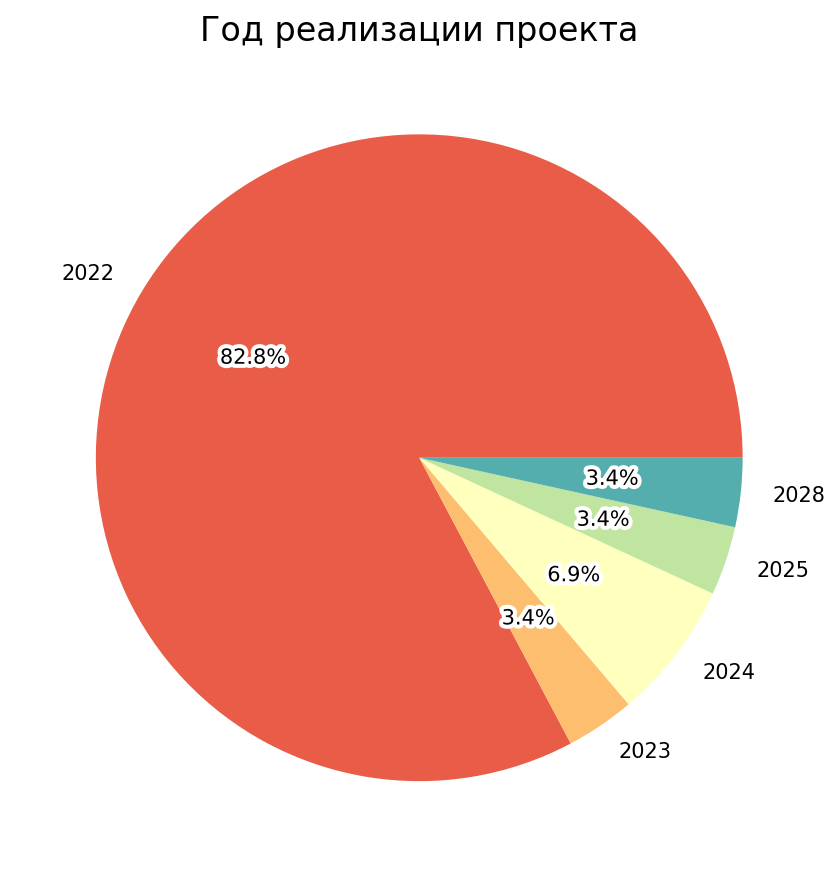

In [1272]:
# Группируем данные по характеру преобразования и суммируем площади

transformation_area = df_krt.groupby('Год преобразования')['Состояние'].count()

# Определим порядок для круговой диаграммы
# order2 = ['Жилое', 'Жилое и Общественно-деловое', 'Общественно-деловое',  'Производственное', 'Общественно-производственное', 'Жилое и Общественно-производственное']

# Переставим данные согласно новому порядку
# transformation_area = transformation_area.reindex(order2)

fig, ax = plt.subplots(figsize=(10, 7), dpi=150)
wedges, texts, autotexts = ax.pie(
    transformation_area,
    labels=[int(x) for x in transformation_area.index],
    autopct='%1.1f%%',
    colors=sns.color_palette("Spectral", len(transformation_area)),
    textprops={'fontsize': 10, 'color': 'black'}  # Увеличение шрифта и установка цвета
)

# Обводка текста
for autotext in autotexts:
    autotext.set_path_effects([path_effects.Stroke(linewidth=4, foreground='white'), path_effects.Normal()])

plt.title('Год реализации проекта', fontsize=16)
plt.show()

In [1269]:
transformation_area = df_krt.groupby('Год преобразования')['Состояние'].count()

In [1261]:
df_krt.groupby('Год преобразования')[].count().head()

Террито-рия (га)  Территория редевелопмента (га)  \
Год преобразования                                                     
2022.0                            23                              24   
2023.0                             0                               1   
2024.0                             0                               2   
2025.0                             1                               1   
2028.0                             0                               1   

                    Адм. округ  Наименование, произв.зоны  Широта  Долгота  \
Год преобразования                                                           
2022.0                      24                         24      24       24   
2023.0                       1                          1       1        1   
2024.0                       2                          2       2        2   
2025.0                       1                          1       1        1   
2028.0                       1                          1       1        1   

                    Адрес  Состояние  Этап редеволпмента  \
Год преобразования                                         
2022.0                  9         24                  24   
2023.0                  1          1                   1   
2024.0                  1          2                   2   
2025.0                  0          1                   1   
2028.0                  0          1                   1   

                    Характер преобразования  Примечание  
Год преобразования                                       
2022.0                                   23           7  
2023.0                                    1           0  
2024.0                                    2           0  
2025.0                                    1           1  
2028.0                                    1           1

In [1263]:
df_krt.groupby('Год преобразования').head()

Террито-рия (га)  Территория редевелопмента (га) Адм. округ  \
0                11                           11.00       СВАО   
1             95,35                           26.50       СВАО   
2             202,7                          202.70        САО   
3             150,5                           28.13        ЮАО   
5              34,4                           34.40        ЗАО   
9               NaN                          392.00        ЮАО   
25              NaN                            4.00        ЗАО   
30               58                           58.00        ВАО   
31              NaN                          124.50        ЮАО   
39              NaN                          107.65       ЮВАО   

              Наименование, произв.зоны     Широта    Долгота  \
0                    Алексеевские улицы  55.806271  37.650347   
1                          Бескудниково  55.887224  37.576319   
2                              Братцево  55.837325  37.495113   
3                      Варшавское шоссе  55.683461  37.627132   
5                            Востряково  55.663177  37.419778   
9                                   ЗИЛ  55.695923  37.641674   
25  Реорганизация Бадаевского пивзавода  55.748873  37.557304   
30                         Серп и Молот  55.751155  37.690767   
31               Симоновской набережной  55.710325  37.652586   
39                           Южный порт  55.700311  37.704786   

                          Адрес      Состояние Этап редеволпмента  \
0                           NaN  Редевелопмент      Строительство   
1                           NaN  Редевелопмент     Проектирование   
2        Головинское шоссе, 10Г  Редевелопмент      Строительство   
3                           NaN  Редевелопмент     Проектирование   
5          улица Матросова, 7к3  Редевелопмент      Строительство   
9                           NaN  Редевелопмент      Строительство   
25     Кутузовский проспект, 12    Реставрация       Документация   
30                          NaN  Редевелопмент     Проектирование   
31                          NaN  Редевелопмент      Строительство   
39  Проектируемый проезд № 1423  Редевелопмент     Проектирование   

        Характер преобразования  Год преобразования  \
0                         Жилое              2022.0   
1                         Жилое              2022.0   
2                         Жилое              2022.0   
3           Общественно-деловое              2022.0   
5                         Жилое              2022.0   
9   Жилое и Общественно-деловое              2028.0   
25                   Музей-парк              2023.0   
30                        Жилое              2025.0   
31                        Жилое              2024.0   
39  Жилое и Общественно-деловое              2024.0   

                                           Примечание  
0                                   серебряный фонтан  
1                                                 NaN  
2   Основной объем работ по реконструкции  уже вып...  
3                             офисно-деловой комплекс  
5                                                 NaN  
9   В 2023 году на территории бывшей промзоны было...  
25                                                NaN  
30  В августе 2019 года там открылся парк «Зеленая...  
31                                                NaN  
39                                                NaN

In [1244]:
from matplotlib.patches import Patch, PathPatch
from matplotlib.path import Path
import matplotlib.patheffects as path_effects

TypeError: Axes.pie() missing 1 required positional argument: 'x'

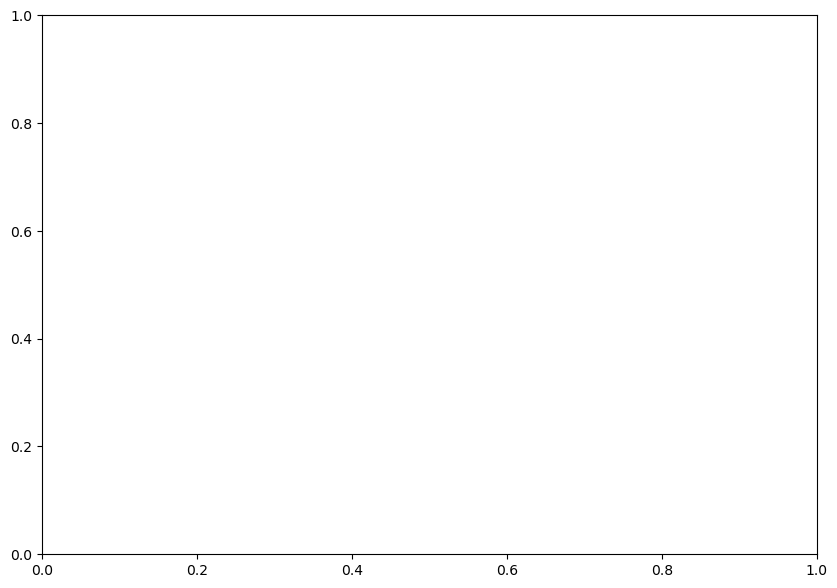

In [1251]:
# Переставим данные согласно новому порядку
# transformation_counts = transformation_counts.reindex(order)

color_mapping = {
    'Жилое': {'color': 'orangered', 'hatch': ''},
    'Жилое и Общественно-деловое': {'color': 'orangered',  'hatch': 'xxx'},
    'Общественно-деловое': {'color': 'gold', 'hatch': ''},
    'Жилое и Общественно-производственное': {'color': 'darkseagreen', 'hatch': 'xxx'},
    'Общественно-производственное': {'color': 'darkseagreen', 'hatch': ''},
    'Музей-парк': {'color': [1, 1, 0.4, 0.7], 'hatch': ''},
    'Производственное': {'color': [0.6, 0.8, 0.6, 0.7], 'hatch': ''}
}

# Назначим цвета и штриховку для категорий
colors = [color_mapping[cat]['color'] if cat in color_mapping else 'white' for cat in order]
hatches = [color_mapping[cat]['hatch'] if cat in color_mapping else '' for cat in order]

# Построение круговой диаграммы с использованием паттернов
fig, ax = plt.subplots(figsize=(10, 7))
wedges, texts, autotexts = ax.pie(
    transformation_counts,
    labels=transformation_counts.index,
    autopct='%1.1f%%',
    colors=colors,
    textprops={'fontsize': 10, 'color': 'black'},  # Увеличение шрифта и установка цвета
)

# Применение штриховки
for wedge, hatch in zip(wedges, hatches):
    wedge.set_hatch(hatch)

# Обводка текста
for autotext in autotexts:
    autotext.set_path_effects([path_effects.Stroke(linewidth=4, foreground='white'), path_effects.Normal()])

plt.title('Распределение проектов по характеру преобразования', fontsize=16)
plt.show()

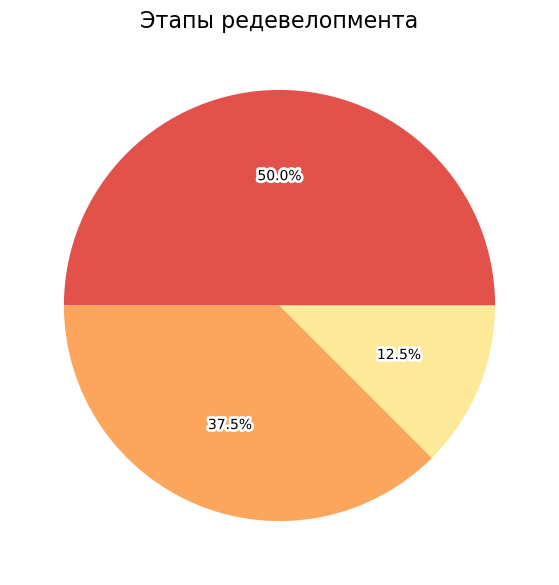

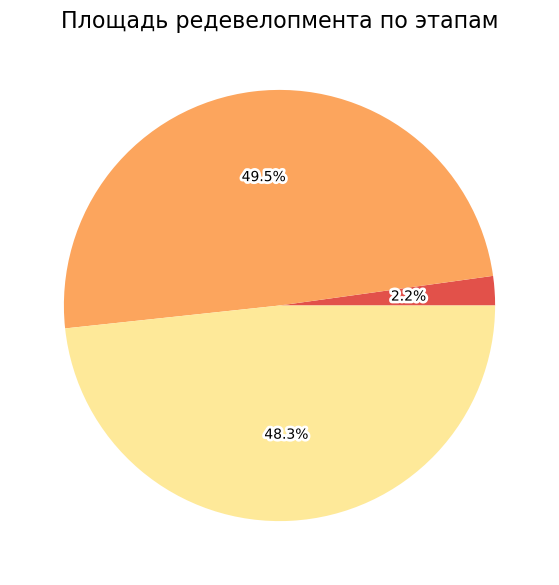

In [1254]:
stage_counts = df_krt['Этап редеволпмента'].value_counts()
order = ['Проектирование', 'Строительство', 'Документация']
# transformation_counts = transformation_counts.reindex(order)


fig, ax = plt.subplots(figsize=(10, 7))
wedges, texts, autotexts = ax.pie(
    stage_counts, 
    # labels=transformation_counts.index,
    autopct='%1.1f%%',
    colors=sns.color_palette("Spectral"),
    textprops={'fontsize': 10, 'color': 'black'}
)



for autotext in autotexts:
    autotext.set_path_effects([path_effects.Stroke(linewidth=4, foreground='white'), path_effects.Normal()])
plt.title('Этапы редевелопмента', fontsize=16)
plt.show()



stage_area = df_krt.groupby('Этап редеволпмента')['Территория редевелопмента (га)'].sum()
transformation_area = transformation_area.reindex(order)

# Построение круговой диаграммы
fig, ax = plt.subplots(figsize=(10, 7))
wedges, texts, autotexts = ax.pie(
    stage_area,
    # labels=transformation_counts.index,
    autopct='%1.1f%%',
    colors=sns.color_palette("Spectral"),
    textprops={'fontsize': 10, 'color': 'black'}
)


# Обводка текста
for autotext in autotexts:
    autotext.set_path_effects([path_effects.Stroke(linewidth=4, foreground='white'), path_effects.Normal()])

plt.title('Площадь редевелопмента по этапам', fontsize=16)
plt.show()


In [1247]:
# Посмотрим на данные
df_krt.head()

Террито-рия (га)  Территория редевелопмента (га) Адм. округ  \
0               11                           11.00       СВАО   
1            95,35                           26.50       СВАО   
2            202,7                          202.70        САО   
3            150,5                           28.13        ЮАО   
4            122,6                           21.36        ЮАО   

  Наименование, произв.зоны     Широта    Долгота  \
0        Алексеевские улицы  55.806271  37.650347   
1              Бескудниково  55.887224  37.576319   
2                  Братцево  55.837325  37.495113   
3          Варшавское шоссе  55.683461  37.627132   
4             Верхние Котлы  55.679406  37.619905   

                         Адрес      Состояние Этап редеволпмента  \
0                          NaN  Редевелопмент      Строительство   
1                          NaN  Редевелопмент     Проектирование   
2       Головинское шоссе, 10Г  Редевелопмент      Строительство   
3                          NaN  Редевелопмент     Проектирование   
4  Проектируемый проезд № 1819  Редевелопмент     Проектирование   

       Характер преобразования  Год преобразования  \
0                        Жилое              2022.0   
1                        Жилое              2022.0   
2                        Жилое              2022.0   
3          Общественно-деловое              2022.0   
4  Жилое и Общественно-деловое                 NaN   

                                          Примечание  
0                                  серебряный фонтан  
1                                                NaN  
2  Основной объем работ по реконструкции  уже вып...  
3                            офисно-деловой комплекс  
4                                                NaN

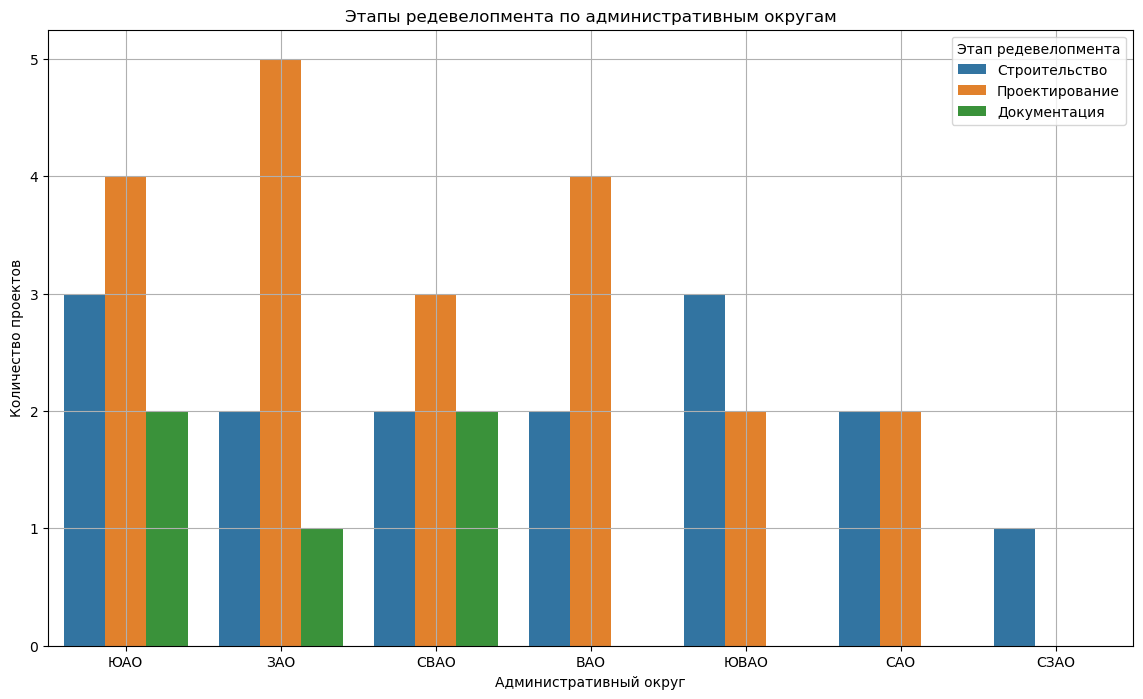

C:\WORKING_APPS\Anaconda_v2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\WORKING_APPS\Anaconda_v2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


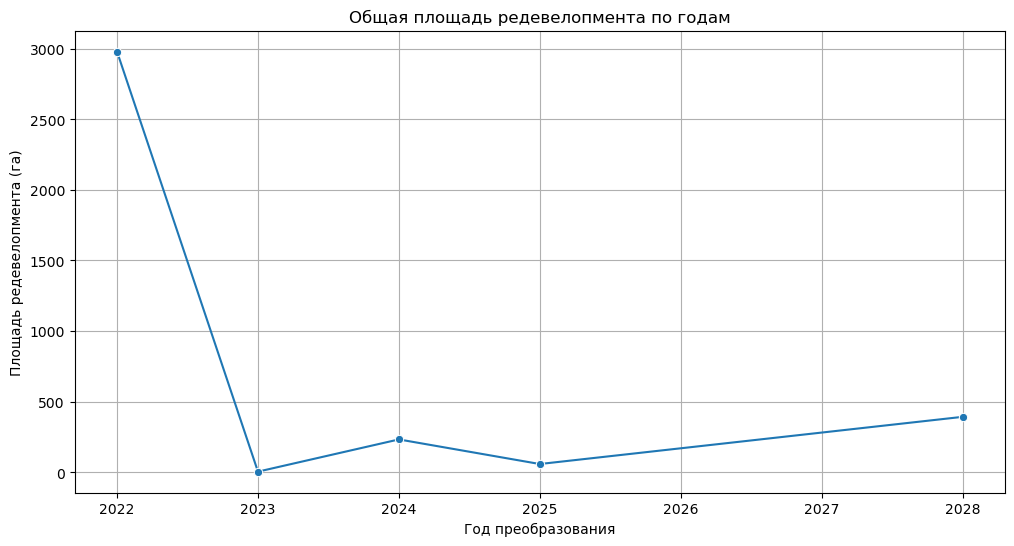

In [1248]:
# График 3: Этапы редевелопмента по административным округам
plt.figure(figsize=(14, 8))
sns.countplot(data=df_krt, x='Адм. округ', hue='Этап редеволпмента', order=df_krt['Адм. округ'].value_counts().index)
plt.title('Этапы редевелопмента по административным округам')
plt.xlabel('Административный округ')
plt.ylabel('Количество проектов')
plt.legend(title='Этап редевелопмента')
plt.grid(True)
plt.show()

# График 4: Общая площадь редевелопмента по годам
df_grouped = df_krt.groupby('Год преобразования')['Территория редевелопмента (га)'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped, x='Год преобразования', y='Территория редевелопмента (га)', marker='o')
plt.title('Общая площадь редевелопмента по годам')
plt.xlabel('Год преобразования')
plt.ylabel('Площадь редевелопмента (га)')
plt.grid(True)
plt.show()

# ДАННЫЕ

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
df_2020  = pd.read_csv(r"data/2020.csv")
df_2024  = pd.read_csv(r"data/2024.csv")

# df_2020_clusters  = pd.read_csv(r"data/2020_clusters.csv")
# df_2024_clusters  = pd.read_csv(r"data/2024_clusters.csv")

# df_all = pd.read_csv(r"data/all.csv")

In [ ]:
df_2020 = df_2020.drop(['Аварийность', 'Тип объявления', 'Адрес', 'Метро 2', 'Метро 3', 'Метро 2 расстояние', 'Метро 3 расстояние', 'Источник данных', 'Локация'], axis=1)

In [ ]:
df_2020 = df_2020.drop(['fid', 'Дата среза', 'Ссылка на объявление', 'Кол-во фотографий', 'ID объявления', 'Площадь комнат', 'Жилая площадь', 'Тест объявления', 'Продавец'], axis=1)

In [ ]:
df_2020 = df_2020.drop(['Метро 1'], axis=1)

In [ ]:
import math

In [ ]:
def remake_ploshad_k(data):
    if str(data) == 'nan':
        return data
    
    data = data.split(' ')[0]
    data = data.replace(',', '.')
    return float(data)

def remake_rasstoyaniye(data):
    
    if str(data) == 'nan' or data.find('&lt;1') > -1:
        return float('nan')
    
#     print(data.split(' ')[0])
    
    if data.find('пешком') > -1:
        data = data.split(' ')[0]
        data = float(data) * (5 / 60)

    elif data.find('трансп') > -1:
        data = data.split(' ')[0]
        data = float(data) * (60 / 60)

    else: 
        data = -1
    
    return data

def remake_year(data):
    if data < 1000:
        return '-'
    
    if data < 1950:
        return '1000-1950'
    
    if data < 1960:
        return '1950-1960'
    
    if data < 1970:
        return '1960-1970'
    
    if data < 1980:
        return '1970-1980'
    
    if data < 1990:
        return '1980-1990'
    
    if data < 2000:
        return '1990-2000'
    
    if data < 2010:
        return '2000-2010'
    
    if data < 2020:
        return '2010-2020'
    
    return '2020-'

In [ ]:
df_2020['Метро 1 расстояние'] = df_2020['Метро 1 расстояние'].apply(remake_rasstoyaniye)
df_2020['Площадь кухни'] = df_2020['Площадь кухни'].apply(remake_ploshad_k)

In [ ]:
df_2020['Год постройки'] = df_2020['Год постройки'].fillna(0)
df_2020['Год постройки'] = df_2020['Год постройки'].apply(remake_year)

In [ ]:
for el in df_2020['Этаж/этажность'].unique():
    try:
        el.split('/')[0]
    except:
        print(el)

In [ ]:
df_2020['Площадь'] = df_2020['Площадь'].fillna(0)
df_2020['Тип дома'] = df_2020['Тип дома'].fillna('Неопределен')

In [ ]:
for i in df_2020.columns:
    print(i)
    print(df_2020[i].unique())

In [ ]:
def refactor_data(data):
    data = data.copy()
    data['in1km'] = data['in1km'].apply(lambda x: 1 if x == 1000 else 0)
    data['in2km'] = data['in2km'].apply(lambda x: 1 if x == 2000 else 0)

    data['комнатность'] = data['Комнатность'].apply(lambda x: int(x.split('-')[0]))
    data['этаж'] = data['Этаж/этажность'].apply(lambda x: int(x.split('//')[0]))
    data['этажность'] = data['Этаж/этажность'].apply(lambda x: int(x.split('//')[1]))
    

In [ ]:
df_2020['in1km'] = df_2020['in1km'].apply(lambda x: 1 if x == 1000 else 0)
df_2024['in1km'] = df_2024['in1km'].apply(lambda x: 1 if x == 1000 else 0)

df_2020['in2km'] = df_2020['in2km'].apply(lambda x: 1 if x == 2000 else 0)
df_2024['in2km'] = df_2024['in2km'].apply(lambda x: 1 if x == 2000 else 0)

In [ ]:
# Создание новых столбцов
df_2020['квартира'] = df_2020['Комнатность'].apply(lambda x: int(x.split('-')[0]) if 'кв.' in x and '-' in x else None)
df_2020['апартаменты'] = df_2020['Комнатность'].apply(lambda x: int(x.split('-')[0]) if 'апарт.' in x and '-' in x else None)
df_2020['студия'] = df_2020['Комнатность'].apply(lambda x: 1 if 'студия' in x else 0)
df_2020['комната'] = df_2020['Комнатность'].apply(lambda x: 1 if x == 'комната' else 0)

# Заполнение пустых значений из столбца 'Кол-во комнат (числом)'
df_2020['квартира'] = df_2020.apply(lambda row: row['Кол-во комнат (числом)'] if pd.isnull(row['квартира']) and 'кв.' 
                          in row['Комнатность'] else row['квартира'], axis=1)
df_2020['апартаменты'] = df_2020.apply(lambda row: row['Кол-во комнат (числом)'] if pd.isnull(row['апартаменты']) and 'апарт.' 
                             in row['Комнатность'] else row['апартаменты'], axis=1)

In [ ]:
df_2020 = df_2020.drop(['Комнатность', 'Этаж/этажность'], axis=1)

In [ ]:
for i in df_2020.columns:
    print(i)
    print(df_2020[i].unique())

In [ ]:
df = pd.get_dummies(df_2020, columns=['Год постройки'])

In [ ]:
df = pd.get_dummies(df, columns=['Тип дома', 'Материал перекрытий', 'Отопление', 'Парковка', 'Вид из окон', 'Планировка'])

In [ ]:
df = pd.get_dummies(df_2020, columns=['Отделка'])

In [ ]:
for i in df.columns:
    print(i)
    print(df[i].unique())

In [ ]:
def extract_lifts(lift_info):
    if pd.isna(lift_info) or lift_info == 'Нет':
        return pd.Series([0, 0], index=['легковой лифт', 'грузовой лифт'])
    else:
        lift_parts = lift_info.split(', ')
        passenger_lifts = sum([int(part.split(' ')[0]) for part in lift_parts if 'пассажир' in part])
        cargo_lifts = sum([int(part.split(' ')[0]) for part in lift_parts if 'груз' in part])
        return pd.Series([passenger_lifts, cargo_lifts], index=['легковой лифт', 'грузовой лифт'])

# Применение функции к столбцу 'Лифт'
df[['легковой лифт', 'грузовой лифт']] = df['Лифт'].apply(extract_lifts)


In [ ]:
df = df.drop(['Лифт'], axis=1)

In [ ]:
def sanuzl(sanuz):
    if pd.isna(sanuz) or sanuz == 'Нет':
        return pd.Series([0, 0], index=['совмещенный', 'раздельный'])
    else:
        sanuz_parts = sanuz.split(', ')
        sov = sum([int(part.split(' ')[0]) for part in sanuz_parts if 'совмещ' in part])
        raz = sum([int(part.split(' ')[0]) for part in sanuz_parts if 'раздел' in part])
        return pd.Series([sov, raz], index=['совмещенный', 'раздельный'])

# Применение функции к столбцу 'Лифт'
df[['совмещенный санузел', 'раздельный санузел']] = df['Санузел'].apply(sanuzl)


In [ ]:
df = df.drop(['Санузел'], axis=1)

In [ ]:
df = df.drop(['Тип дома', 'Материал перекрытий', 'Отопление', 'Парковка', 'Вид из окон', 'Планировка','Год постройки'], axis=1)

In [ ]:
for i in df.columns:
    print(i)
    print(df[i].unique())

In [ ]:
def balkon(balk):
    if pd.isna(balk) or balk == 'Нет':
        return pd.Series([0, 0], index=['балкон', 'лоджия'])
    else:
        balkon_parts = balk.split(', ')
        b = sum([int(part.split(' ')[0]) for part in balkon_parts if 'балк' in part])
        l = sum([int(part.split(' ')[0]) for part in balkon_parts if 'лодж' in part])
        return pd.Series([b, l], index=['балкон', 'лоджия'])

# Применение функции к столбцу 'Лифт'
df[['балкон', 'лоджия']] = df['Балкон'].apply(balkon)

In [ ]:
df = df.drop(['Балкон'], axis=1)

In [ ]:
# Функция для очистки и преобразования значений высоты потолков
def clean_height(height):
    if isinstance(height, str):
        # Удаление пробелов и слова 'метра'
        height = height.replace('м', '').replace(',', '.').replace(' ', '').strip()
    height = float(height)
    if height < 1 or height > 5:
        return 2.5
    else:
        return height

# Применение функции к столбцу 'Высота потолков'
df['Высота потолков'] = df['Высота потолков'].apply(clean_height)

In [ ]:
df.head(200)

In [ ]:
df.shape

In [ ]:
for col in df.columns:
    print(col)
    print(df[col].unique())

In [ ]:
df['Высота потолков'] = df['Высота потолков'].apply(lambda x: 2.5 if x == 'ошибка' else x)

In [ ]:
import seaborn as sns

In [ ]:
plt.subplots(figsize=[20, 20])

sns.heatmap(df.drop(['Тип ОН', 'Lat', 'Lng', 'in2km', 'in1km'], axis=1).corr(), annot=True)

In [ ]:
df.replace_nan()

In [ ]:
df.fillna(df.mean())